Group number: Group 13
Group Members: Shehroz Sohail, Amitabh Singh Virk, Ajna A Rivera

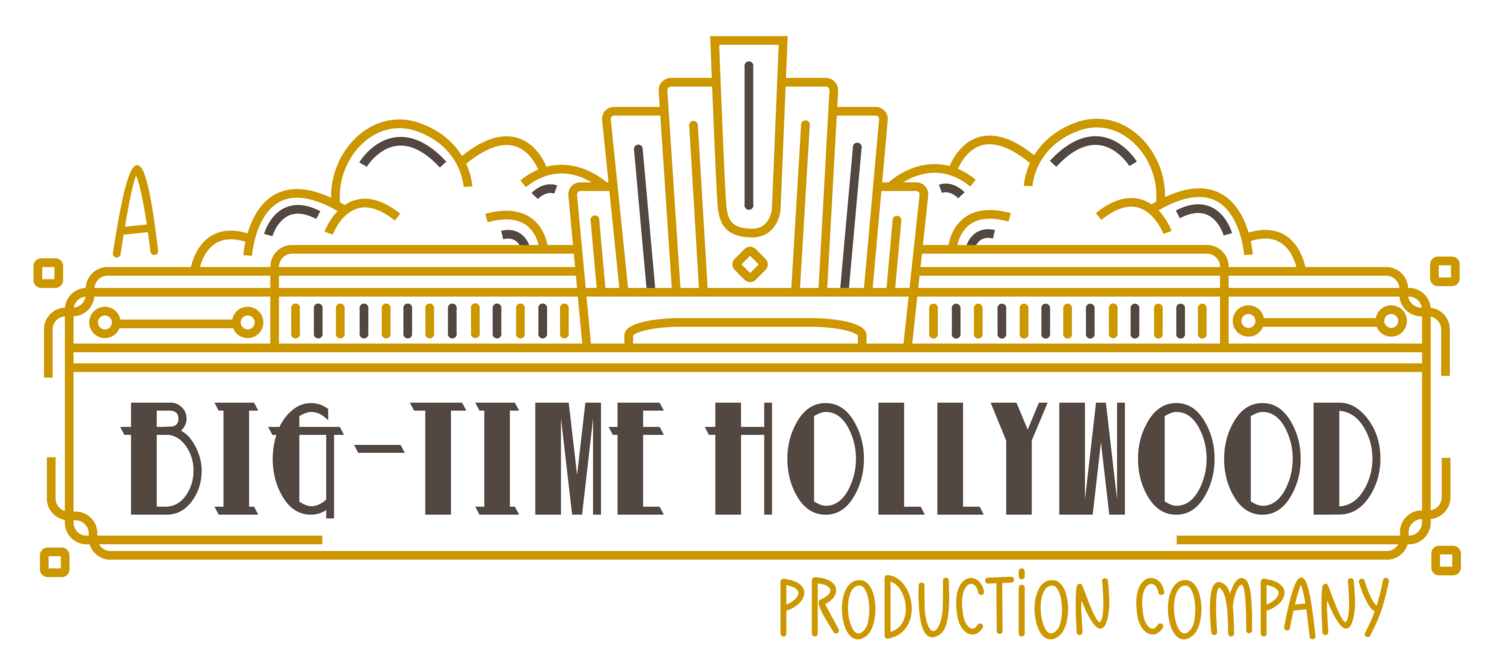

## **Context:**
In the last few years, the rise in the internet has increased the globalisation in every market be it e-commerce or entertainment. Platforms like Youtube and Facebook have made it easier than ever to increase the market reach for all creators and customers. This trend has also affected the Hollywood industry. Following the rise in new technologies and advancement in computing power, Hollywood is investing more than ever in data analytics. Day by day, more and more entertainment companies are hiring data professionals to support the business decisions based on data insights. 

A very well named distribution house, **Big Time Hollywood Production Company**,  is interested in distributing movies. Due to the rise seen in recent years in the popularity of Hollywood movies across the globe, they are planning on expanding their horizons outside the US. They have been quite successful in the past and want to keep the winning streak alive along with expansion of the Business.

They have hired a team of data scientists to help them make informed decisions regarding the movies to distribute. They want to get insights from the factors affecting the success of the previous movies. 

# **Objective:**
As data scientists our objective will be to gather the relevant data and create a presentation for the stakeholders with our findings that can benefit the expansion project.

We will follow the process defined in the steps below:<br>

**Step 1: Data Gathering**<br> 
First step for any successful analysis is the gathering of the data. Our primary dataset is an IMDb dataset on Kaggle:   https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+title_principals.csv <br>
We also use data directly from IMDb and from a financial website to supplement this (see below for references).

**Step 2: Data Cleaning**<br>
This step involves us working on the data to bring it in the form that is suitable for our analysis. This is one of the most crucial step for analysis and will act as the building block for our report.

**Step 3: EDA(Exploratory Data Analysis)**<br>
In this step we uncover the underlying structure and modeling of the data. Here we dissect the data, we interpret in different forms and create a story with the help of statistical weapons in our arsenal. 

**Step 4: Findings and Insights**<br>
In this part we will find the patterns, look for the insights and make recommendations based on all the evidence that we have collected so far. 

**Questions we are trying to answer:**<br>
1. **How does this data relate to the business and how does it justify our objective?**
<br>
2. **What factors affect the revenues made by previous films?<br>**
3. **Does the budget of the movie affect the success of the movie?<br>**
4. **What factors lead to the not so good ratings and good ratings?<br>**
5. **If a movie does well in one market is it likely to do well in others?** <br>

**Assumptions:**

1. Our primary data set was collected from Kaggle and IMDB is used to verify certain aspects of the data.
2. This analysis is intended to be used by the business to make decisions.<br> 
3. All the recommendations and analysis are evidence based.<br>


**Stake Holder**

Big Time Hollywood Production Company


### Importing Libraries and Data Set

#to download files into the session
download.file('https://drive.google.com/uc?export=download&id=14ufjboo68cDcV1wXGYN9GrGlw9iMmYwo' ,'IMDbratings')
ratings <- read.csv('/content/IMDbratings')
download.file('https://drive.google.com/uc?export=download&id=1GIqfLMHlI-q6Y7JNtENpf8KAsGCggw7t' ,'IMDbmovies')
movies <- read.csv('/content/IMDbmovies')
download.file('https://drive.google.com/uc?export=download&id=1TSf0qGS2MJxjwYciX9lE4SEWFrHOLF-K' ,'tick.inflation')
tick.inflation <- read.csv('/content/tick.inflation')
download.file('https://drive.google.com/uc?export=download&id=1i02NwyXQ_syqqAEo4WmU_ZXsnS8B3jF1' ,'rates')
rates <-  read.csv('/content/rates', na.strings=c("","NA"))

In [82]:
ratings <- read.csv("D://Codes/Project 1/IMDb ratings.csv")
movies <- read.csv("D://Codes/Project 1/IMDb movies.csv")
rates <-  read.csv("D://Codes/Project 1/exchangerates (2).csv", na.strings=c("","NA"))
tick.inflation <- read.csv("D://Codes/Project 1/ticketinflation.csv")
ratings1<-ratings

In [83]:
# Install the packages once at the start of a new session and then turn them back into comments for next time

#install.packages('pracma')
#install.packages('sp')
#install.packages('ggmap')

#install.packages('gridExtra')
#install.packages('plotly')
#install.packages('kernlab')
#install.packages('tidymodels')
#install.packages('psych')
#install.packages('ggplot2')

#install.packages('maps')


library(pracma)
library(plotly)
library(psych)
library(sp)
library(ggmap)
library(maps)
library(gridExtra)
library(tidymodels)
library(kernlab)
library(tidyverse)
options(repr.plot.width=15, repr.plot.height=8) 

## Cleaning Data
+ There are uninformative rows and all columns are character columns. 
+ The budget and all currency related columns have a dollar sign in them which makes them unusable
+ Adjust for NA values
(note that a brief textual explanation of the code is below each code chunk)

In [84]:
## FIX THE MOVIES DATA SET SO THAT NUMERICAL ROWS ARE NUMERICAL AND UNECESSARY COLUMNS ARE REMOVED
options(warn=-1)

#select only the columns that need to be converted to integers
movies.int <- select(movies, year, duration, avg_vote, votes, budget, reviews_from_users,        
                     reviews_from_critics, usa_gross_income, worlwide_gross_income)

#remove all unecessary columns and columsn that need to be converted to numeric
movies <- select(movies, -year,-duration, -avg_vote, -votes, -budget, -reviews_from_users,        
                 -reviews_from_critics, -metascore, -date_published,-usa_gross_income, 
                 -worlwide_gross_income, -original_title, -actors, -description)


#seperate currency sign from budget to a new column
movies.int <- movies.int %>% ungroup() %>% separate(col = budget, into = c("currency", "raw.budget"), sep = " ")       
movies.int$usa_gross_income = gsub("\\$", "", movies.int$usa_gross_income)                      #remove currency signs
movies.int$worlwide_gross_income = gsub("\\$", "", movies.int$worlwide_gross_income)                          

movies <- cbind(movies, currency = movies.int$currency)       #save new column back to original data
movies.int <- select(movies.int, -currency)                  #remove currency column from variable that is to be batch converted to numerical

#Batch convert all columns to numeric/integers
movies.int <- apply(movies.int,2,            
                    function(x) as.numeric(as.character(x)))               



movies <- cbind(movies, movies.int)                    #binding the two to come back to our original version but cleaned
#summary(movies)

+ Since the data set is divided into two parts we began by converting all of the values in one part of the data set into integers and characters where appropriate. 
+ We separated the type of currency from the budget column so we could make the budget column numeric.


In [85]:
## FIX THE MOVIES DATA SET SO THAT NUMERICAL ROWS ARE NUMERICAL AND UNECESSARY COLUMNS ARE REMOVED
#Add all numerical columns that are relevant to your analysis
ratings.int <- select(ratings, weighted_average_vote, total_votes, mean_vote, median_vote, votes_10,               
                      votes_9, votes_8, votes_7, votes_6, votes_5, votes_4, votes_3, votes_2, votes_1,              
                      males_allages_avg_vote, males_allages_votes, females_allages_avg_vote, females_allages_votes,
                      us_voters_rating, us_voters_votes, non_us_voters_rating, non_us_voters_votes, 
                      allgenders_18age_votes,allgenders_18age_avg_vote, allgenders_30age_votes,
                      allgenders_30age_avg_vote,allgenders_45age_votes,allgenders_45age_avg_vote)

#Remove all numerical values and all unecessary values

ratings <- select(ratings,-allgenders_0age_avg_vote, -allgenders_0age_votes, -allgenders_18age_avg_vote,                        #remove all columns except ID
                  -allgenders_18age_votes, -allgenders_30age_avg_vote,- allgenders_30age_votes, -allgenders_45age_avg_vote,     #becasue all relevant are selected above
                  -allgenders_45age_votes, -males_0age_avg_vote, -males_0age_votes, -males_18age_avg_vote, -males_18age_votes,  #only integer columns are relevant here
                  -males_30age_avg_vote, -males_30age_votes, -males_45age_avg_vote, -males_45age_votes, -females_0age_avg_vote, #no other column is of our concern for this analysis
                  -females_0age_votes, -females_18age_avg_vote, -females_18age_votes, -females_30age_avg_vote,
                  -females_30age_votes, -females_45age_avg_vote, -females_45age_votes, -top1000_voters_rating, -top1000_voters_votes,
                  -weighted_average_vote, -total_votes, -mean_vote, -median_vote, -votes_10,
                      -votes_9, -votes_8, -votes_7, -votes_6, -votes_5, -votes_4, -votes_3, -votes_2, -votes_1,
                      -males_allages_avg_vote, -males_allages_votes, -females_allages_avg_vote, -females_allages_votes,
                      -us_voters_rating, -us_voters_votes, -non_us_voters_rating, -non_us_voters_votes)

 
ratings.int<- apply(ratings.int,2,            
                    function(x) as.numeric(as.character(x))) 
                    
#binding the two to come back to our original dataset but cleaned.
ratings <- cbind(ratings,ratings.int)             



+ Cleaning the second dataset to make it primarily numeric columns that we can merge with the first dataset





In [86]:
movie.rating <- cbind(movies,ratings)
movie.rating <- movie.rating[,-19]             #removing Imdb title id duplicate column
#cbind(lapply(lapply(movie.rating, is.na),sum))  #shows the number of NA values aggregated column wise

+ Bound the two datasets into a single dataframe

## Adaptation
+ Add columns to weight scores (using the IMdb formula) for specific demographic groups. We will later use this to see if specific demographic groups are better at predicting the success of a film. 
+ Add a new column for total gross income (US + domestic)
+ We additionally added in a Return on Investment metric (netratio), but explain this later in the Analysis section


In [87]:

#add all the columns needed below ito movie.rating but convert them into numeric values first
#donot clean data set other wisenrows wont match
#needed.columns <- select(ratings1, allgenders_18age_votes,allgenders_18age_avg_vote, allgenders_30age_votes,allgenders_30age_avg_vote,
#                         allgenders_45age_votes,allgenders_45age_avg_vote)


#needed.columns<- apply(needed.columns,2,            
#                    function(x) as.integer(as.character(x))) 

#movie.rating <- cbind(movie.rating, needed.columns)

#adds in weighted score data for 5 demographic groups



v <- movie.rating$allgenders_18age_votes
m <- 50
R <- movie.rating$allgenders_18age_avg_vote
C <- mean(movie.rating$mean_vote, na.rm=TRUE)
movie.rating$Weighted.18age <- round(((v/(v+m))*R) + ((m/(v+m)) * C), 1)

v <- movie.rating$allgenders_30age_votes
m <- 50
R <- movie.rating$allgenders_30age_avg_vote
C <- mean(movie.rating$mean_vote, na.rm=TRUE)
movie.rating$Weighted.30age <- round(((v/(v+m))*R) + ((m/(v+m)) * C), 1)

v <- movie.rating$allgenders_45age_votes
m <- 50
R <- movie.rating$allgenders_45age_avg_vote
C <- mean(movie.rating$mean_vote, na.rm=TRUE)
movie.rating$Weighted.45age <- round(((v/(v+m))*R) + ((m/(v+m)) * C), 1)

v <- movie.rating$females_allages_votes
m <- 50
R <- movie.rating$females_allages_avg_vote
C <- mean(movie.rating$mean_vote, na.rm=TRUE)
movie.rating$Weighted.female <- round(((v/(v+m))*R) + ((m/(v+m)) * C), 1)

v <- movie.rating$males_allages_votes
m <- 50
R <- movie.rating$males_allages_avg_vote
C <- mean(movie.rating$mean_vote, na.rm=TRUE)
movie.rating$Weighted.male <- round(((v/(v+m))*R) + ((m/(v+m)) * C), 1)

movie.rating$income <- movie.rating$usa_gross_income + movie.rating$worlwide_gross_income
movie.rating <- movie.rating[,-19]
head(movie.rating)

imdb_title_id title                                              
1 tt0000009     Miss Jerry                                         
2 tt0000574     The Story of the Kelly Gang                        
3 tt0001892     Den sorte drÃ¸m                                    
4 tt0002101     Cleopatra                                          
5 tt0002130     L'Inferno                                          
6 tt0002199     From the Manger to the Cross; or, Jesus of Nazareth
  genre                     country          language
1 Romance                   USA              None    
2 Biography, Crime, Drama   Australia        None    
3 Drama                     Germany, Denmark         
4 Drama, History            USA              English 
5 Adventure, Drama, Fantasy Italy            Italian 
6 Biography, Drama          USA              English 
  director                            writer                                
1 Alexander Black                     Alexander Black                       
2 Charles Tait                        Charles Tait                          
3 Urban Gad                           Urban Gad, Gebhard SchÃ¤tzler-Perasini
4 Charles L. Gaskill                  Victorien Sardou                      
5 Francesco Bertolini, Adolfo Padovan Dante Alighieri                       
6 Sidney Olcott                       Gene Gauntier                         
  production_company            currency year ... allgenders_30age_votes
1 Alexander Black Photoplays             1894 ...  50                   
2 J. and N. Tait                $        1906 ... 239                   
3 Fotorama                               1911 ...  72                   
4 Helen Gardner Picture Players $        1912 ... 111                   
5 Milano Film                            1911 ... 895                   
6 Kalem Company                          1912 ... 177                   
  allgenders_30age_avg_vote allgenders_45age_votes allgenders_45age_avg_vote
1 5.7                        35                    6.6                      
2 6.0                       115                    6.3                      
3 5.8                        62                    6.2                      
4 5.0                       193                    5.3                      
5 7.0                       482                    7.1                      
6 5.6                       168                    5.8                      
  Weighted.18age Weighted.30age Weighted.45age Weighted.female Weighted.male
1 6.1            6.0            6.4            6.1             6.2          
2 6.1            6.0            6.3            6.2             6.1          
3 6.0            6.0            6.2            6.1             6.0          
4 5.9            5.4            5.5            6.1             5.3          
5 6.9            7.0            7.0            7.0             7.0          
6 6.0            5.7            5.9            6.1             5.8          
  income
1 NA    
2 NA    
3 NA    
4 NA    
5 NA    
6 NA

+ This uses the IMDb formula for weighted ratings applied to specific demographic groups.  It adds in a new column for each weighted rating.
+ It also adds in a new column for total income

In [88]:

for(row in 22:ncol(movie.rating)){                  #Now add mean in place of all NA values from column 22
  movie.rating[is.na(movie.rating[,row]), row] <- mean(movie.rating[,row], na.rm = TRUE)
}


movie.rating<-na.omit(movie.rating)
#nrow(movie.rating)
#cbind(lapply(lapply(movie.rating, is.na),sum))

#summary(movie.rating)
movie.rating<-as.data.frame(movie.rating)


+ Some rows have NA data at a couple of ratings, we replace these via imputation using the other ratings value for that movie.

## Data Exploration and Descriptive Visualizations
In our first set of Descriptive Visualizations, we focus solely on raw data exploration in our largely unfiltered dataset. Additional Descriptive Visualizations are in our Data Analysis section.

We look at:
+ Number of movies made per country (map visualization)
+ Trend of number of movies made per year (line graph
+ Numbers of movies by genre and by director (bar graphs)

In [89]:
cat('This data set has:',nrow(movie.rating), 'Individual movie ratings \n')    
cat('This data has:', ncol(movie.rating), 'Variables to help us make an analysis \n')
cat('The longest movie time in these years was',max(movie.rating$duration), 'minutes, that is 13.5 hours,','the movies name was "', movie.rating$title[movie.rating$duration == 288],'" \n')
cat('The shortest movie time in these years was',min(movie.rating$duration), 'minutes, the movies name was "', movie.rating$title[movie.rating$duration == 60],'" \n')

#summary(movie.rating)


This data set has: 8090 Individual movie ratings 
This data has: 51 Variables to help us make an analysis 
The longest movie time in these years was 288 minutes, that is 13.5 hours, the movies name was " 39280 " 
The shortest movie time in these years was 60 minutes, the movies name was " 52559 " 


### Number of Movies per country
This section explores the global distribution of the movie production industry.  We find that the US is the primary driver of this industry.

In [90]:
countries <- gsub(",.*$", "", movie.rating$country)       # This is a anbalysis by country
countries <- as.data.frame(countries)
countries$count <- 1


x <- countries %>% 
  group_by(countries) %>% 
  summarise(count = sum(count))

colnames(x) <- c('region', 'count')            # so that column names match for region data

x <- x[order(x$count, decreasing = T),]       #srt by country with highest movie comes firest
#head(x)

mapdata <- map_data('world')                  #Join the two datasets together
mapdata <- left_join(mapdata, x, by = 'region')



mapdata[mapdata$region == "USA", "count"] <- 850       #Adjust USA values so that the data is more understandable

#sort data 
mapdata <- mapdata[order(mapdata$count, decreasing = T),]
#head(mapdata)

This creates a new dataframe with number of movies per country

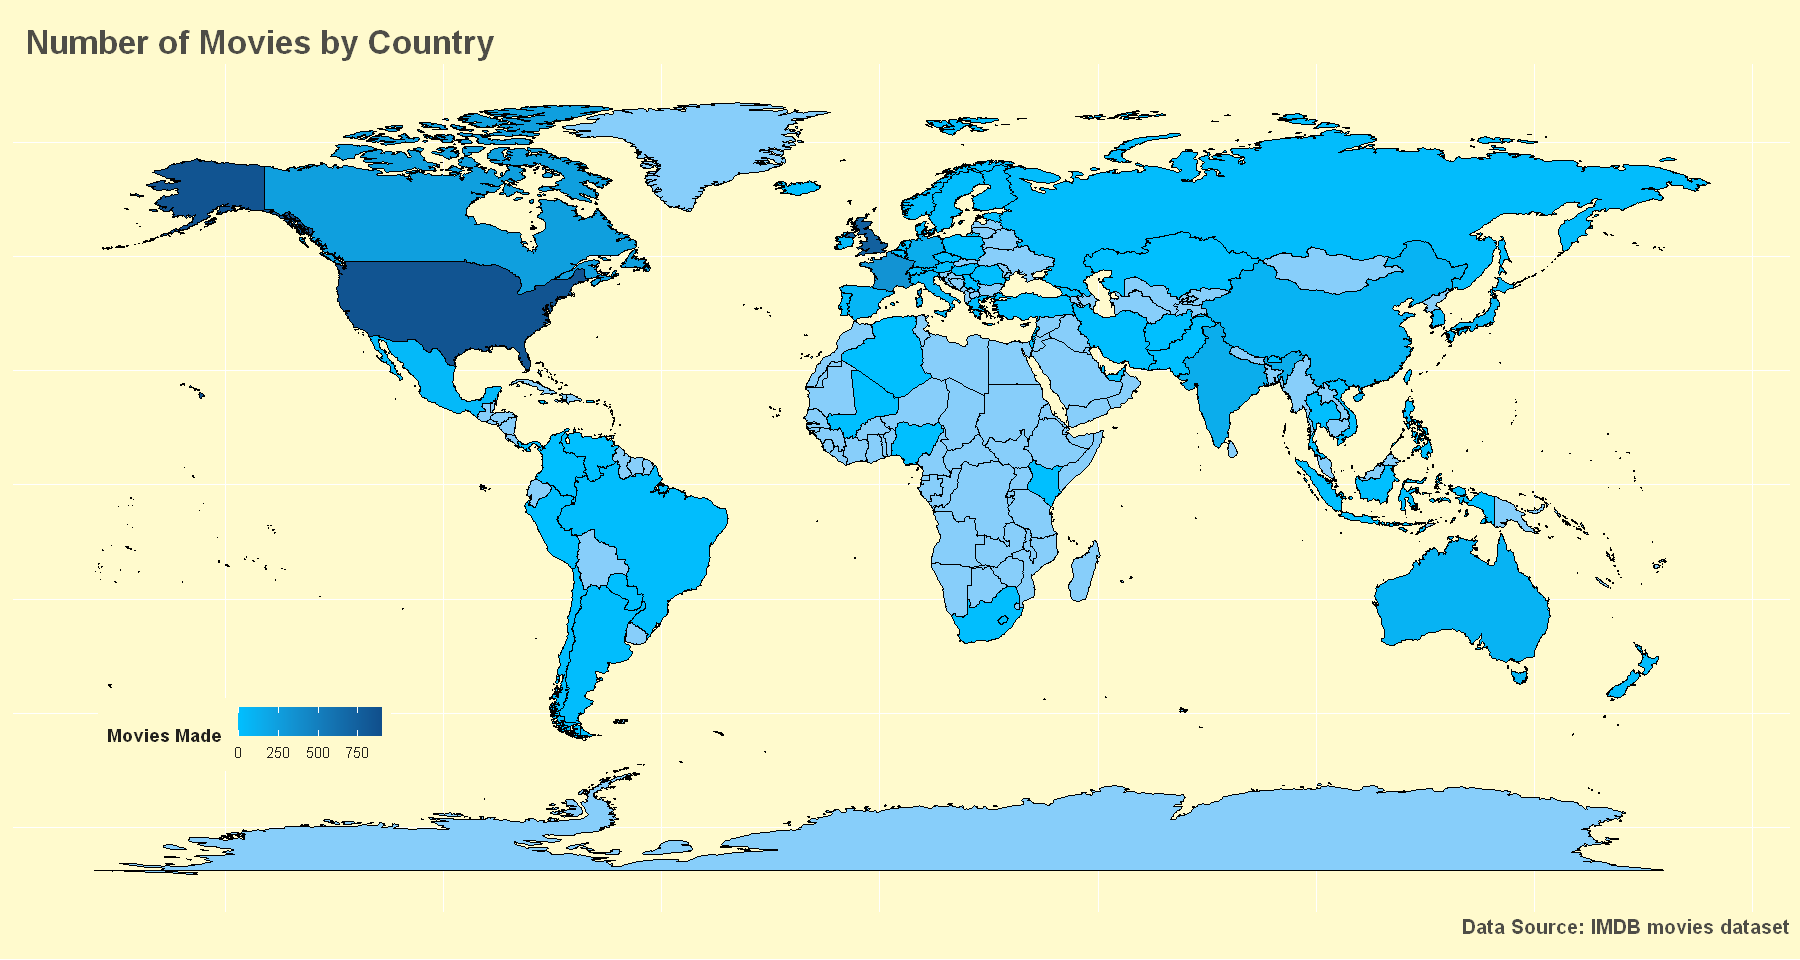

In [91]:
#mapdata1 <- mapdata #%>% filter (!is.na(mapdata$count))

map1 <- ggplot (mapdata, aes( x = long, y = lat, group = group), col=cols) +
    geom_polygon (aes(fill = count), color = 'black') + 
    labs(title='Number of Movies by Country',
         caption ='Data Source: IMDB movies dataset') +
    scale_fill_gradient(name = "Movies Made",low= 'deepskyblue',high='dodgerblue4', na.value = "lightskyblue",limits=c(0,900))+
  theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        rect = element_blank())
map1 +
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
    legend.direction = 'horizontal'
  )

+ As we can see from the above graph, the majority of the movies were made in USA. The UK, France, Canada, India and Germany also make significant numbers of movies.
+ Because of this, we normalized our income numbers to US Dollars in our analysis (see Analysis section).

In [92]:
movie.rating1 <- movie.rating
head(movie.rating1)

imdb_title_id title                               genre                   
166  tt0010323     Il gabinetto del dottor Caligari    Fantasy, Horror, Mystery
246  tt0012190     I quattro cavalieri dell'Apocalisse Drama, Romance, War     
507  tt0017136     Metropolis                          Drama, Sci-Fi           
1049 tt0021749     Luci della cittÃ                    Comedy, Drama, Romance  
2455 tt0027977     Tempi moderni                       Comedy, Drama, Family   
2796 tt0029453     Il bandito della Casbah             Crime, Drama, Romance   
     country language       director       
166  Germany German         Robert Wiene   
246  USA     None           Rex Ingram     
507  Germany German         Fritz Lang     
1049 USA     English        Charles Chaplin
2455 USA     English        Charles Chaplin
2796 France  French, Arabic Julien Duvivier
     writer                               production_company          currency
166  Carl Mayer, Hans Janowitz            Decla-Bioscop AG            $       
246  Vicente Blasco IbÃ¡Ã±ez, June Mathis Metro Pictures Corporation  $       
507  Thea von Harbou, Thea von Harbou     Universum Film (UFA)        DEM     
1049 Charles Chaplin                      Charles Chaplin Productions $       
2455 Charles Chaplin                      Charles Chaplin Productions $       
2796 Henri La Barthe, Henri La Barthe     Paris Film                  $       
     year ... allgenders_30age_votes allgenders_30age_avg_vote
166  1920 ... 23386                  8.1                      
246  1921 ...  1008                  7.1                      
507  1927 ... 63342                  8.2                      
1049 1931 ... 60504                  8.5                      
2455 1936 ... 77889                  8.5                      
2796 1937 ...  2346                  7.7                      
     allgenders_45age_votes allgenders_45age_avg_vote Weighted.18age
166   8271                  8.0                       8.1           
246   1418                  7.3                       6.7           
507  25666                  8.3                       8.3           
1049 22135                  8.5                       8.6           
2455 26596                  8.5                       8.6           
2796  2080                  7.8                       7.6           
     Weighted.30age Weighted.45age Weighted.female Weighted.male income  
166  8.1            8.0            8.1             8.1              17622
246  7.1            7.3            7.2             7.1           18367346
507  8.2            8.3            8.3             8.3            2585877
1049 8.5            8.5            8.5             8.5              65189
2455 8.5            8.5            8.5             8.5             621265
2796 7.7            7.8            7.6             7.7             311790

### Number of Movies per year
We find that the numbers of movies in the IMDb has gone down over the last few years.

Group.1 x  
76 2010    263
77 2011    287
78 2012    266
79 2013    299
80 2014    269
81 2015    252
82 2016    267
83 2017    228
84 2018    216
85 2019    157

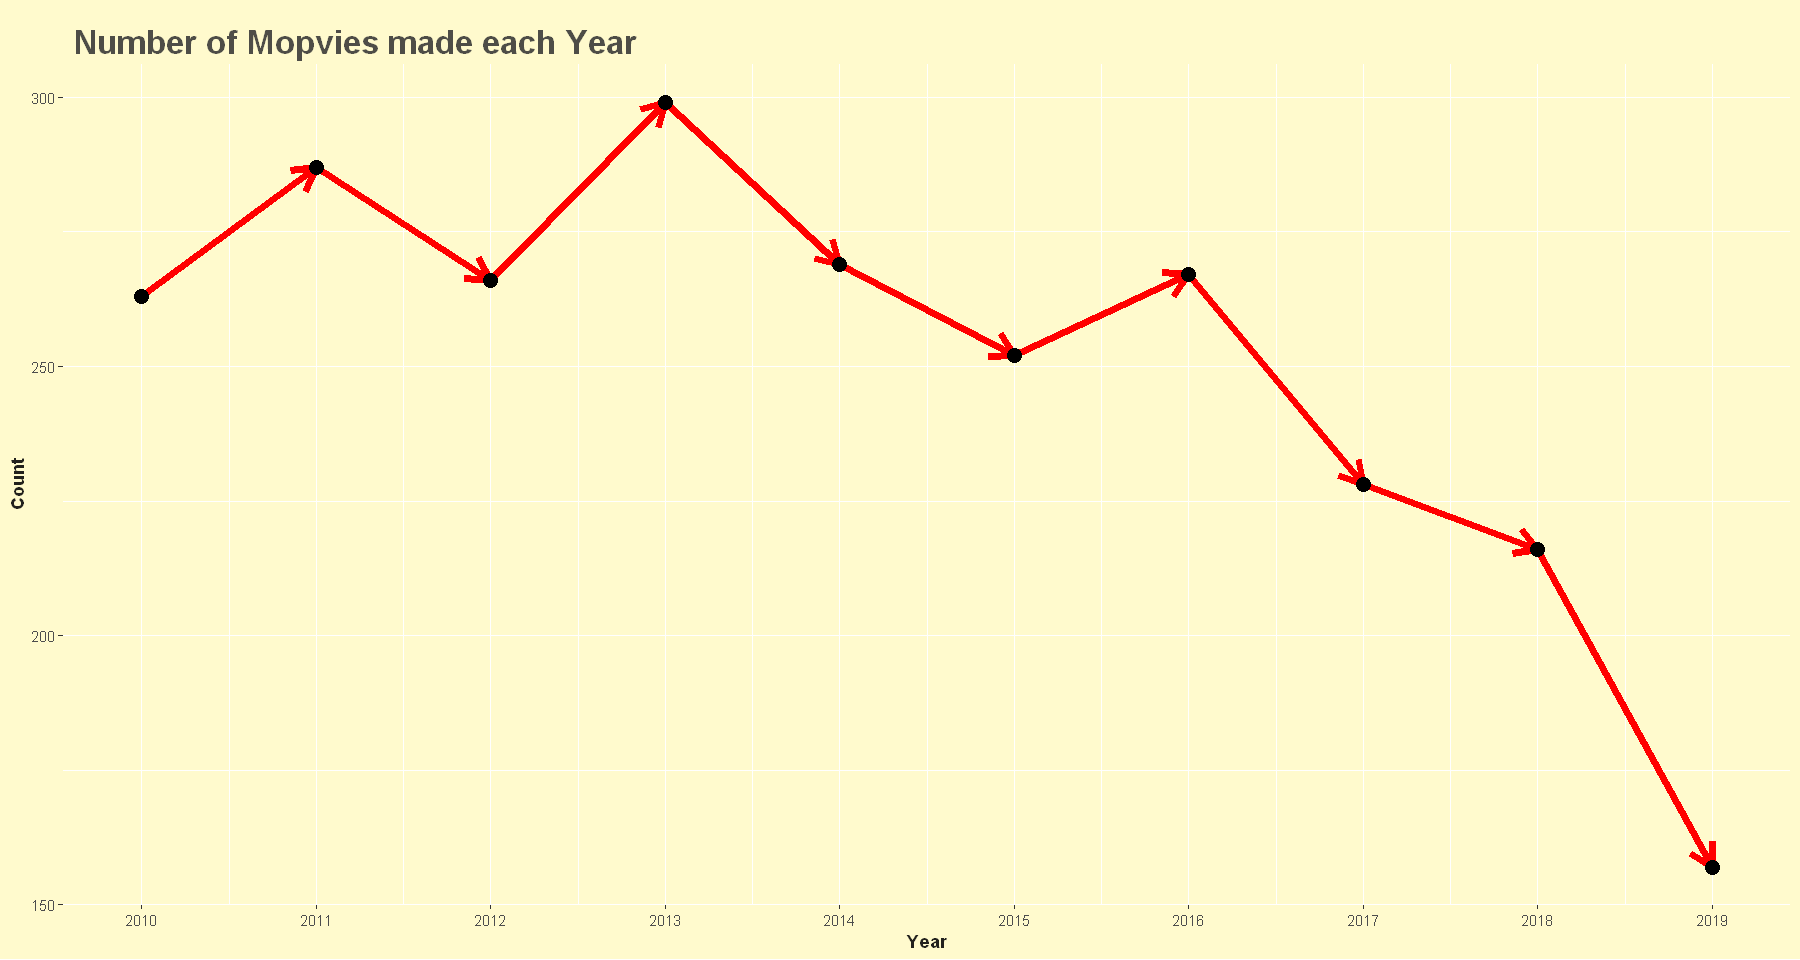

In [93]:
movie.rating1$count <- 1


group1 <- aggregate(x = movie.rating1$count,                # count number of movies made each year
          by = list(movie.rating1$year),              
          FUN = sum) 
group1 <- group1[order(group1$Group.1,decreasing =T), ]
group1 <- head(group1,11)
group1<- group1[-c(1),]                        #Removed 2020 because partial data of 2020 was available
group1 <- group1[order(group1$Group.1,decreasing =F), ]              #Change back the sorting order
group1


p1<-ggplot(group1, aes(x=Group.1, y=x)) + 
  geom_segment(aes(xend = c(tail(Group.1, n = -1), NA), 
                   yend = c(tail(x, n = -1), NA)),
               arrow = arrow(length = unit(0.55, "cm")),
               color = 2,size=2) +
  geom_point(size=4) +
  ggtitle("Number of Mopvies made each Year")
p1+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
    legend.direction = 'horizontal'
  ) +
labs(x = 'Year', y='Count')+ scale_x_continuous(breaks = seq(2010, 2020, by = 1))

### Number of Movies in Genre
Movies in more niche genres will have fewer datapoints associated with them. For any genre-level analyses we will want to only focus on the most represented genres.

genre     count
1 Comedy    2232 
2 Action    1793 
3 Drama     1705 
4 Crime      575 
5 Biography  471 
6 Adventure  428

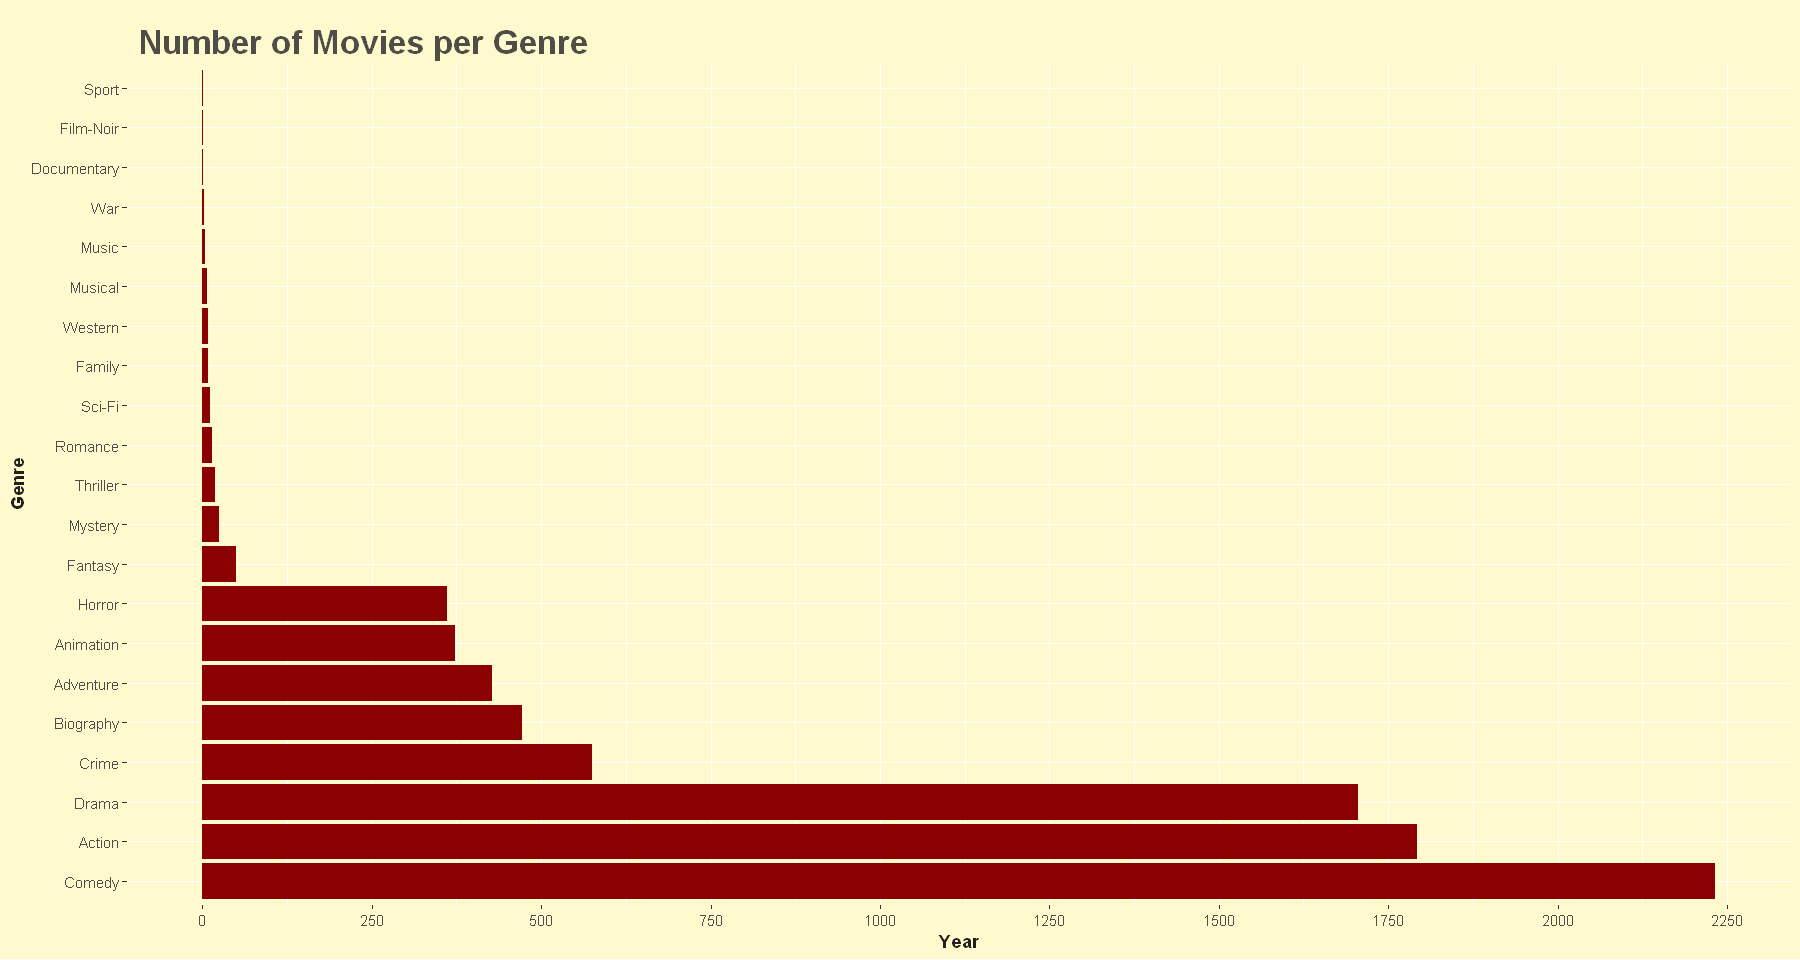

In [94]:
genre <- gsub(",.*$", "", movie.rating$genre)

genre <- as.data.frame(genre)
genre$count <- 1


x <- genre %>% 
  group_by(genre) %>% 
  summarise(count = sum(count))


genre <- x[order(x$count, decreasing = T),] 

head(genre)

p<-ggplot(data=genre, aes(reorder(genre,-count,), count),) +
  geom_bar(stat="identity",fill="darkred", ) 
  
p + coord_flip() +  # Horizontal bar plot\
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
    legend.direction = 'horizontal'
  ) +
  ggtitle("Number of Movies per Genre")+
labs(x = 'Genre', y='Year')+ 
scale_y_continuous(breaks = seq(0, 2500, by = 250))

### Average rating per Genre

[1] 8090

genre1      avg     
1 Documentary 7.700000
2 Film-Noir   7.600000
3 Music       7.400000
4 War         7.400000
5 Biography   7.139278
6 Musical     7.085714

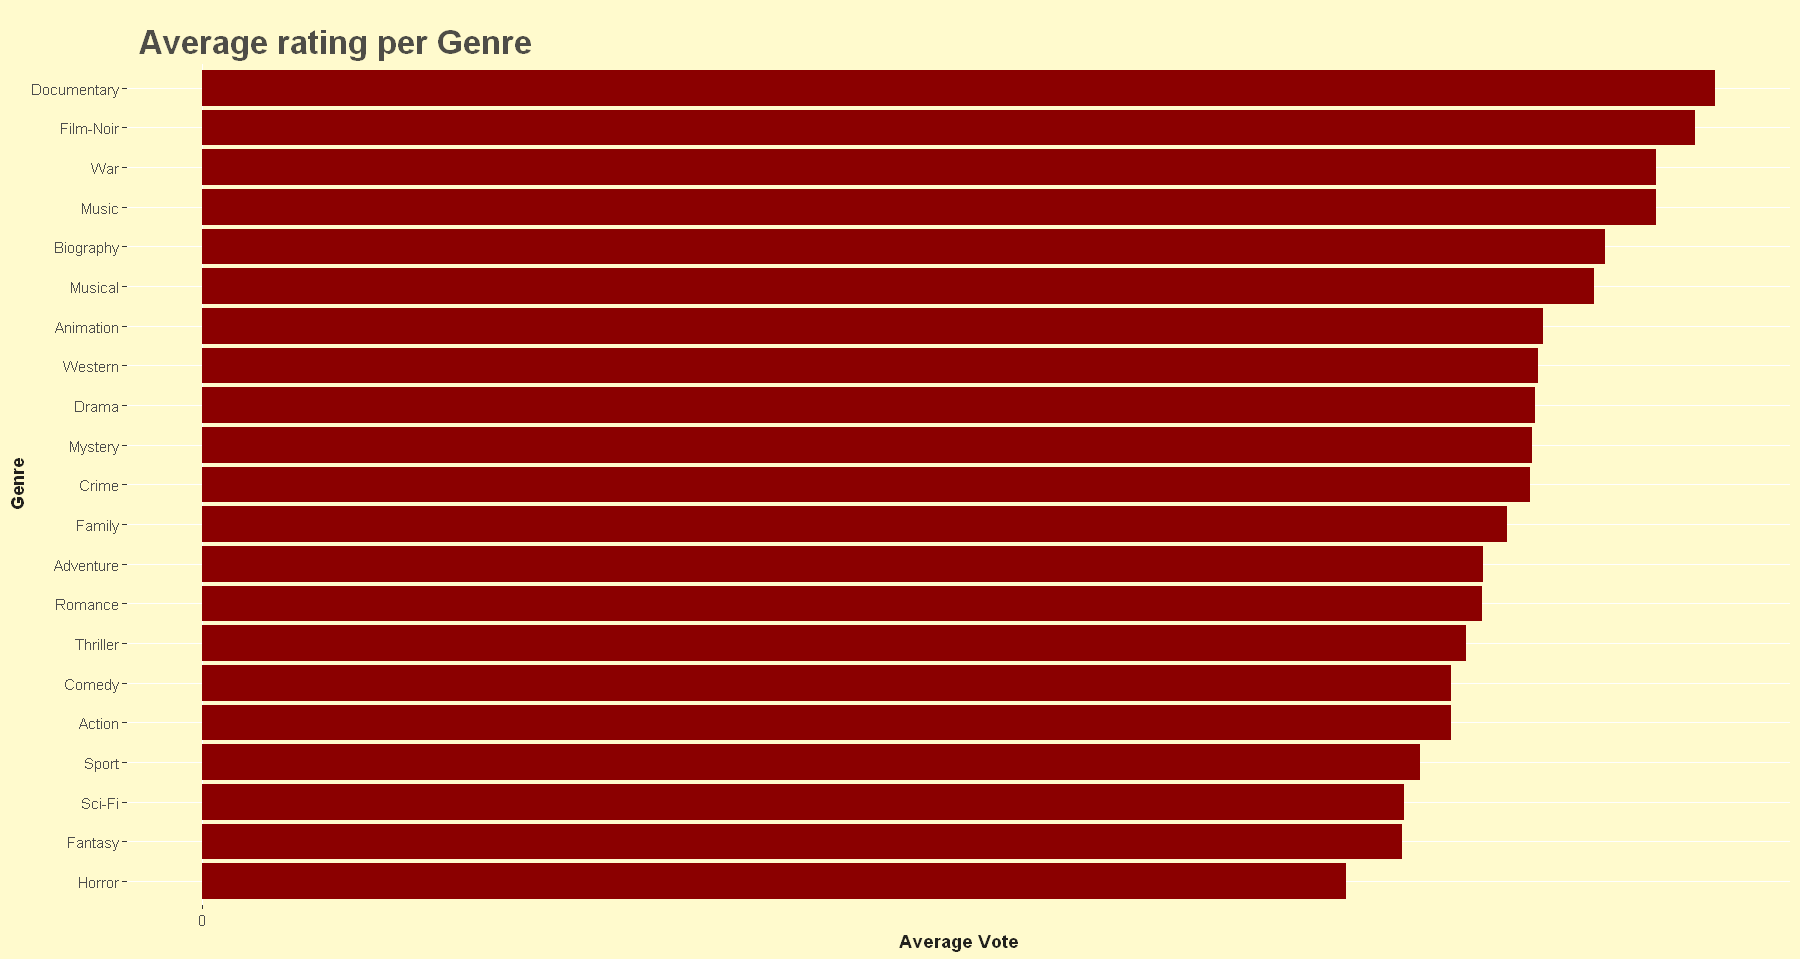

In [95]:

genre1 <- gsub(",.*$", "", movie.rating$genre)

genre1 <- as.data.frame(genre1)
nrow(genre1)
genre1 <- cbind(movie.rating, genre1)


x <- genre1 %>% 
  group_by(genre1) %>% 
  summarise(avg = mean(mean_vote))


genre1 <- x[order(x$avg, decreasing = T),] 

head(genre1)

p<-ggplot(data=genre1, aes(reorder(genre1,avg,), avg),) +
  geom_bar(stat="identity",fill="darkred", ) 
  
p + coord_flip() +  # Horizontal bar plot\
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
    legend.direction = 'horizontal'
  ) +
  ggtitle("Average rating per Genre")+
labs(x = 'Genre', y='Average Vote')+ 
scale_y_continuous(breaks = seq(0, 2500, by = 250))

### Number of Movies made by a director
Since this data has been examined in a previous analysis (see Report section for details), we will not analyze it further.  It is interesting to note that some directors are much more prolific than others.

[1] 3576

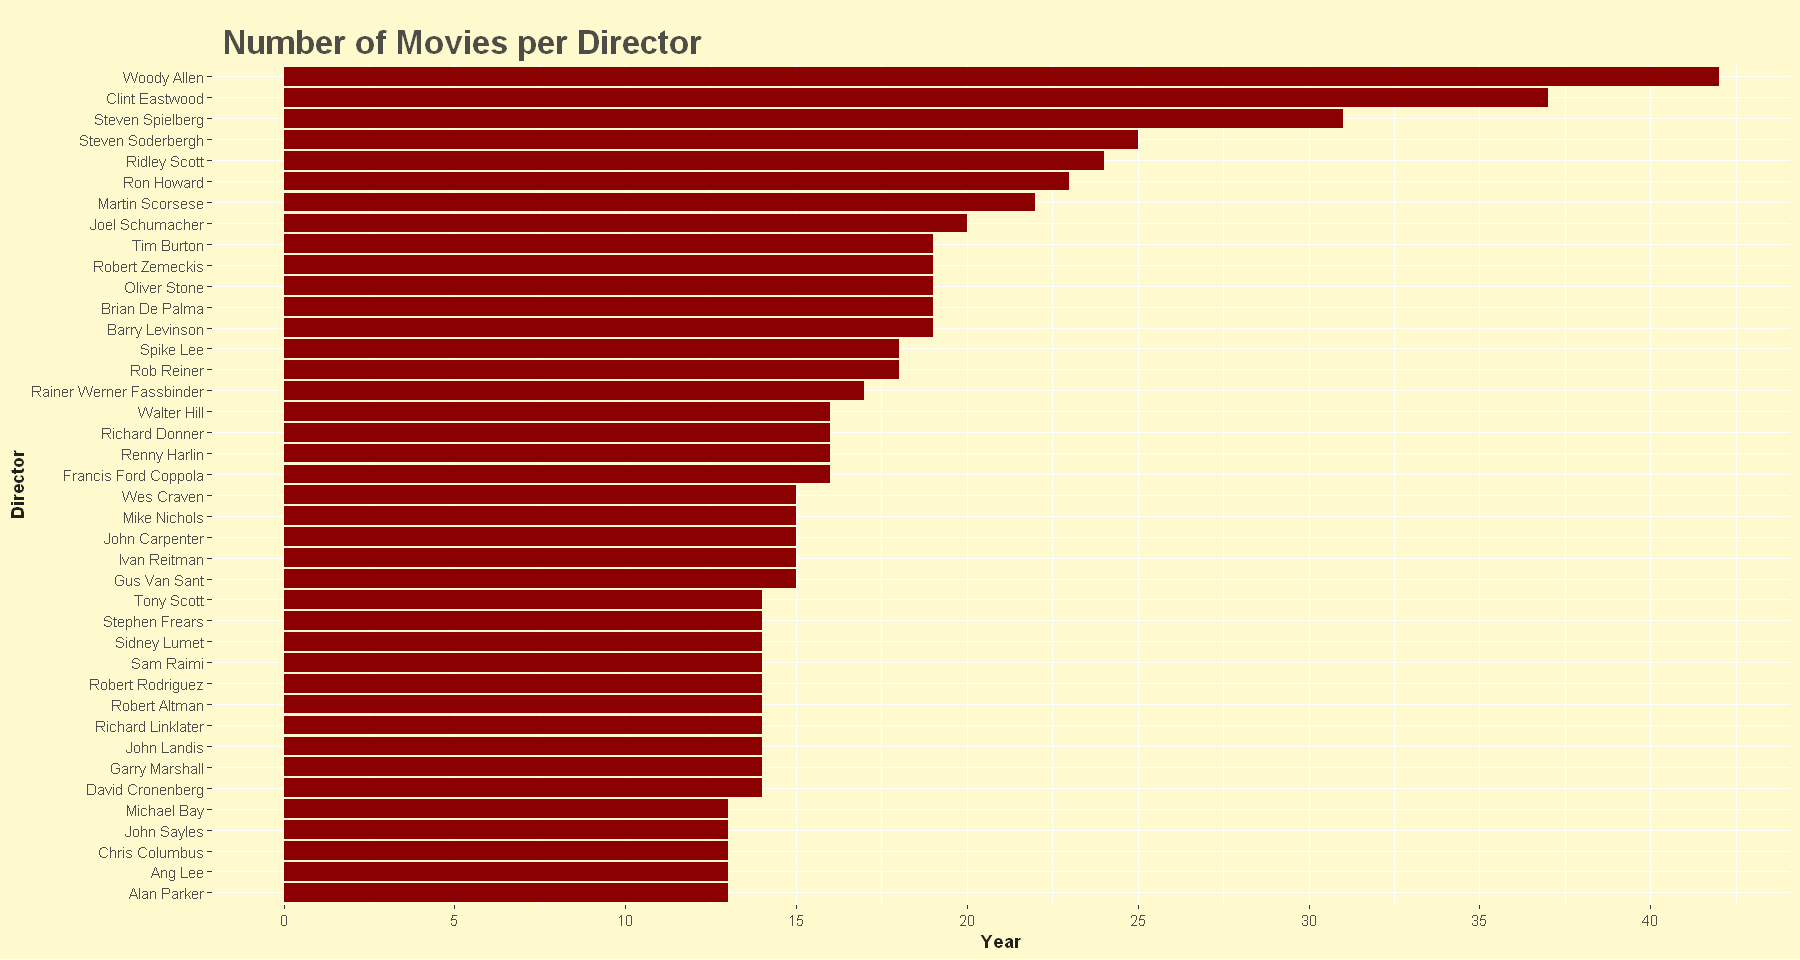

In [96]:
director <- gsub(",.*$", "", movie.rating$director)

director <- as.data.frame(director)
director$count <- 1


x <- director %>% 
  group_by(director) %>% 
  summarise(count = sum(count))
director <- x[order(x$count, decreasing = T),] 
nrow(director)
director <- head(director,40)
#director


p<-ggplot(data=director, aes(reorder(director,count,), count),) +
  geom_bar(stat="identity",fill="darkred", ) 
  
p + coord_flip()+  # Horizontal bar plot+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
    legend.direction = 'horizontal'
  ) +ggtitle("Number of Movies per Director")+
labs(x = 'Director', y='Year')+ scale_y_continuous(breaks = seq(0, 50, by = 5))

## Response Variable
(See Analysis section below for code that generated the ROI variable)
<br><br>
The response variables we focused on in this study were return on investment (ROI, called netratio in our dataset) and average vote.

ROI is a unitless variable we calculated ourselves that expresses income normalized by budget. Our original dataset had 2 types of income data for most films - gross income in the US and gross income worldwide (all countries except the US). This data was not corrected for inflation. The dataset also had budget data for some films. This budget data was expressed in multiple currencies. To get all of the data into the most prevalent currency (USD) we used a table of exchange rates for each currency for each year in our dataset (e.g, Indian Rupees to USD conversion rate in 1995). After conversion, we now had a budgetinUSD column that showed budget in a single currency, not corrected for inflation.
We assumed that the budget and income for each movie were recorded in similar time periods (same year or adjacent years). Therefore we calculated ROI as domestic+worldwide income divided by budget. This gave us a unitless number that did not need to be corrected for inflation. (edited)
Average vote (avg_vote) was a metric that came with our dataset that simply combines all user data to give a single number of "popularity" for each film. We use this as a popularity measure, assuming that films with higher popularity have higher viewership and desirability, and thus more valuable to streaming services.

##Analysis

## Explore Correlations and additional Descriptive Visualization
**includes first two linear regressions**<br>
We first found that our dataset did not correct for inflation (using linear regression and a plot with abline visualization).  We already knew that it contained budget numbers in multiple currencies.  To address this, we:


1.   Created a new column normalizing income to annual ticket price data from IMDb
2.   Used an annual exchange-rate table to get all numbers into US Dollars (by year, since exchance-rates can vary). 
3.  Created the ROI column to express income in terms of budget for each film.

We then checked that ROI was not sensitive to year using a linear regression as well as a plot with an abline



R-squared for income depending on year is: 0.3971422 this strongly suggests the dataset has not been corrected for inflation

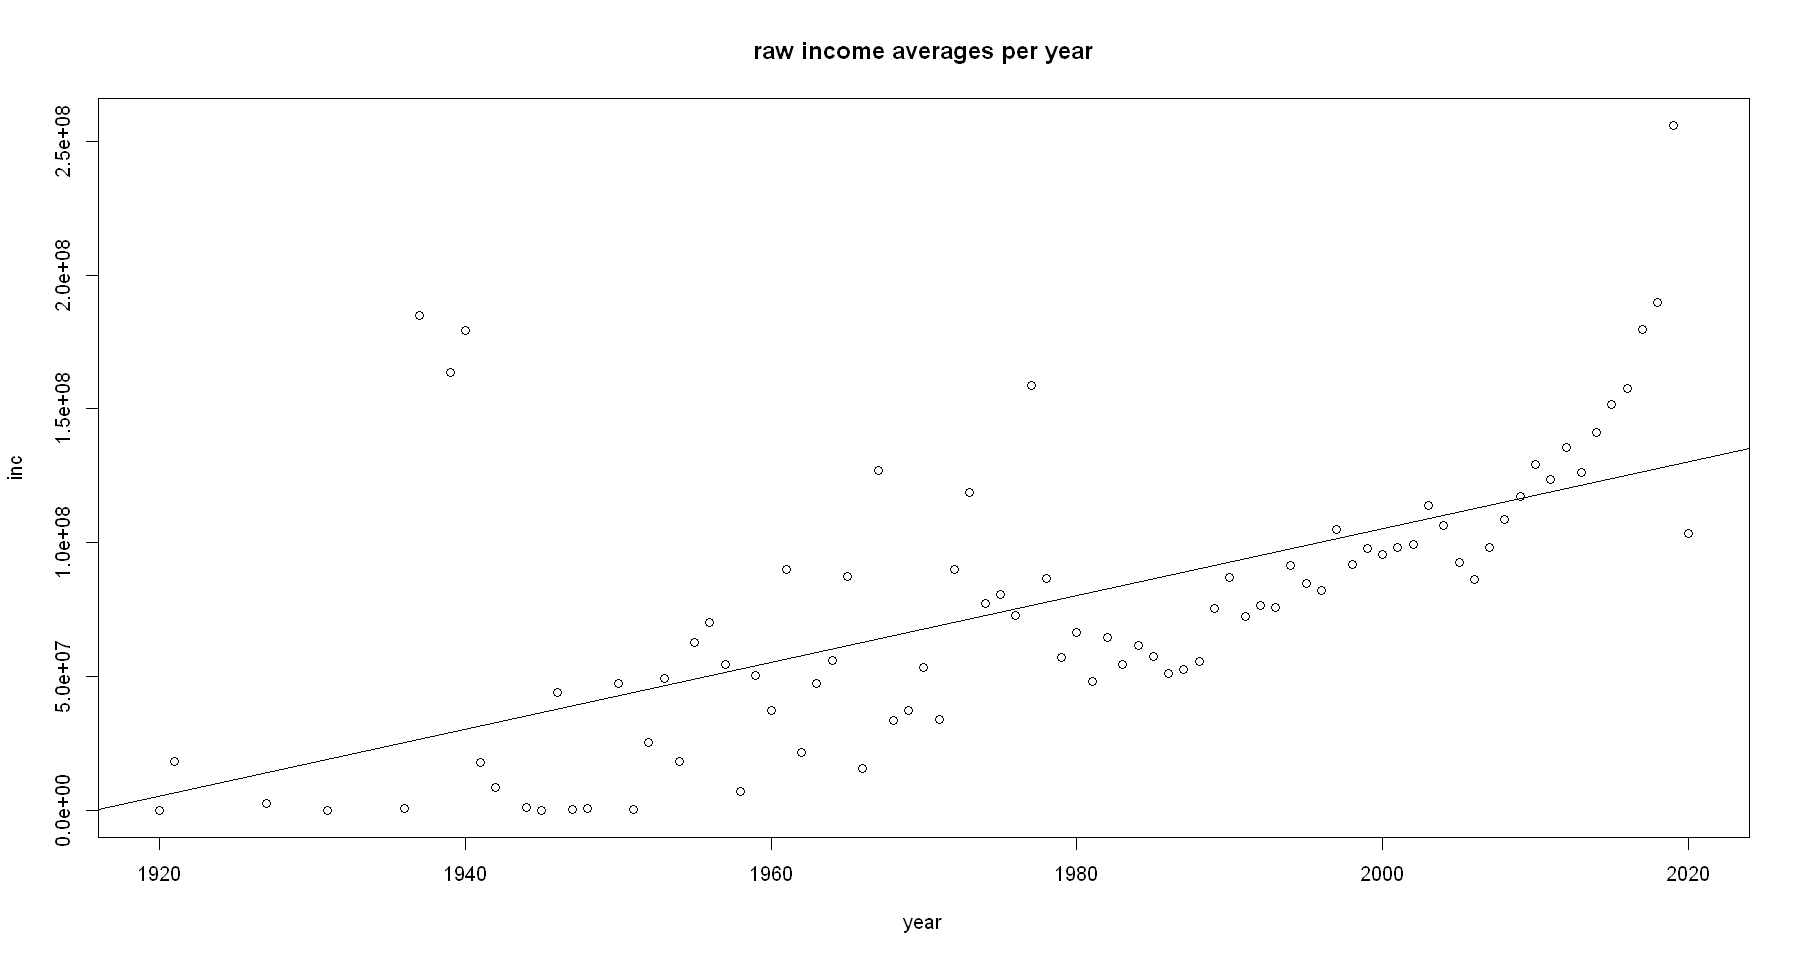

In [97]:
#to make sure that the income numbers are adjusted for inflation (mysterious in original dataset):
incomein <- filter(movie.rating, income > 0)
income <- lm(income ~ year, data = incomein)
incomein <- group_by(incomein, year)
inflation.check <- summarize(incomein, inc = mean(income))
plot(summarize(incomein, inc = mean(income)), main = "raw income averages per year")
abline(lm(inc~year, data = inflation.check))
cat('R-squared for income depending on year is:', summary(lm(inc~year, data = inflation.check))$r.squared, 'this strongly suggests the dataset has not been corrected for inflation')
#there is a significant correlation bewteen income and year, suggesting that income is not adjusted for inflation in this dataset. 
#https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP?ref_=mojo_ftr_help#
#ticketinf column adjusts for ticket price, but our ROI is a unitless measure of income/budget ratio

In [98]:
tick.inflation$year <- tick.inflation$Year
movie.rating.inf <-merge(movie.rating, tick.inflation, by = "year", all.x = T)
movie.rating.inf <- filter(movie.rating.inf, income != 'NA')
movie.rating.inf$inf.income <- (movie.rating.inf$inf.factor * movie.rating.inf$income)

infincome <- lm(inf.income ~ year, data = movie.rating.inf)
adjincome <- group_by(movie.rating.inf, year)
movie.rating.inf <- filter(movie.rating.inf, inf.income < 3700000000)

This creates a column for income (already in USD) normalized for annual ticket price (from IMDb). We removed outliers by filtering for movies with income under the gross income record of $3.7 billion adjusted for inflation ( [Reference](https://selfi.com/the-top-20-box-office-earners-ever-adjusted-for-inflation/))

In [99]:
#this sorts into different currencies to reconcile budget numbers, then sorts by top currencies
# use the hashed lines to check that all the currency info was written correctly
movie.rating.inf$raw.budget <- as.numeric(movie.rating.inf$raw.budget)
movie.rating.inf <- group_by(movie.rating.inf, currency)


#exchange rates from https://www.bis.org/statistics/xrusd.htm
#sum(is.na(movie.rating$income))

+ Sorting the dataset and binding the data to the copy of our main to perform analysis on this new dataset

In [100]:
#make rates dataframe the same shape as the movie dataframe
rates <- rates %>% pivot_longer(cols = starts_with('X'), names_to = 'year', values_to = "exchangerate", values_drop_na = TRUE)
#make the years column mergable
rates$year <- gsub('X', '', rates$year)
movie.rating.inf <- ungroup(movie.rating.inf)
rates <- rename(rates, currency = CURRENCY)
movie.rating.inf <- merge(movie.rating.inf, rates, by = c('currency', 'year'), all.x=T)
movie.rating.inf <- unique(movie.rating.inf)
#movie.rating.inf <- movie.rating.inf %>% filter(movie.rating.inf$currency !='NA') %>% filter(movie.rating.inf$currency != '') #only use this step if you want to drop any movies without a currency (no budget)

#fill in the budget in USD column with USD or budget*USD exchange rate
movie.rating.inf$budgetin.USD <- movie.rating.inf$raw.budget / movie.rating.inf$exchangerate
for (i in 1:length(movie.rating.inf$currency)){
   if (movie.rating.inf$currency[i] == '$'){
     movie.rating.inf$budgetin.USD[i] <- movie.rating.inf$raw.budget[i]
   } else if (movie.rating.inf$currency[i] == " " ){
     movie.rating.inf$budgetin.USD[i] <- movie.rating.inf$raw.budget[i]
   }}
#add in the netratio column that is a return on investment %
movie.rating.inf$netratio <- movie.rating.inf$income/movie.rating.inf$budgetin.USD

+ removed the "X" from our columns in order to merge the exchange rates dataframe with our dataset
+ merged our new data set with a copy of our old data with year and currency
+ writing a for loop to replace all currency not in USD with the appropriate exchange rate conversion to dollars and leaving the dollar values as is
+ created an ROI metric (netratio) of ((profit or loss)/(budget))

R-squared for ROI depending on year is: 0.04402959 this strongly suggests the dataset is now not biased by inflation

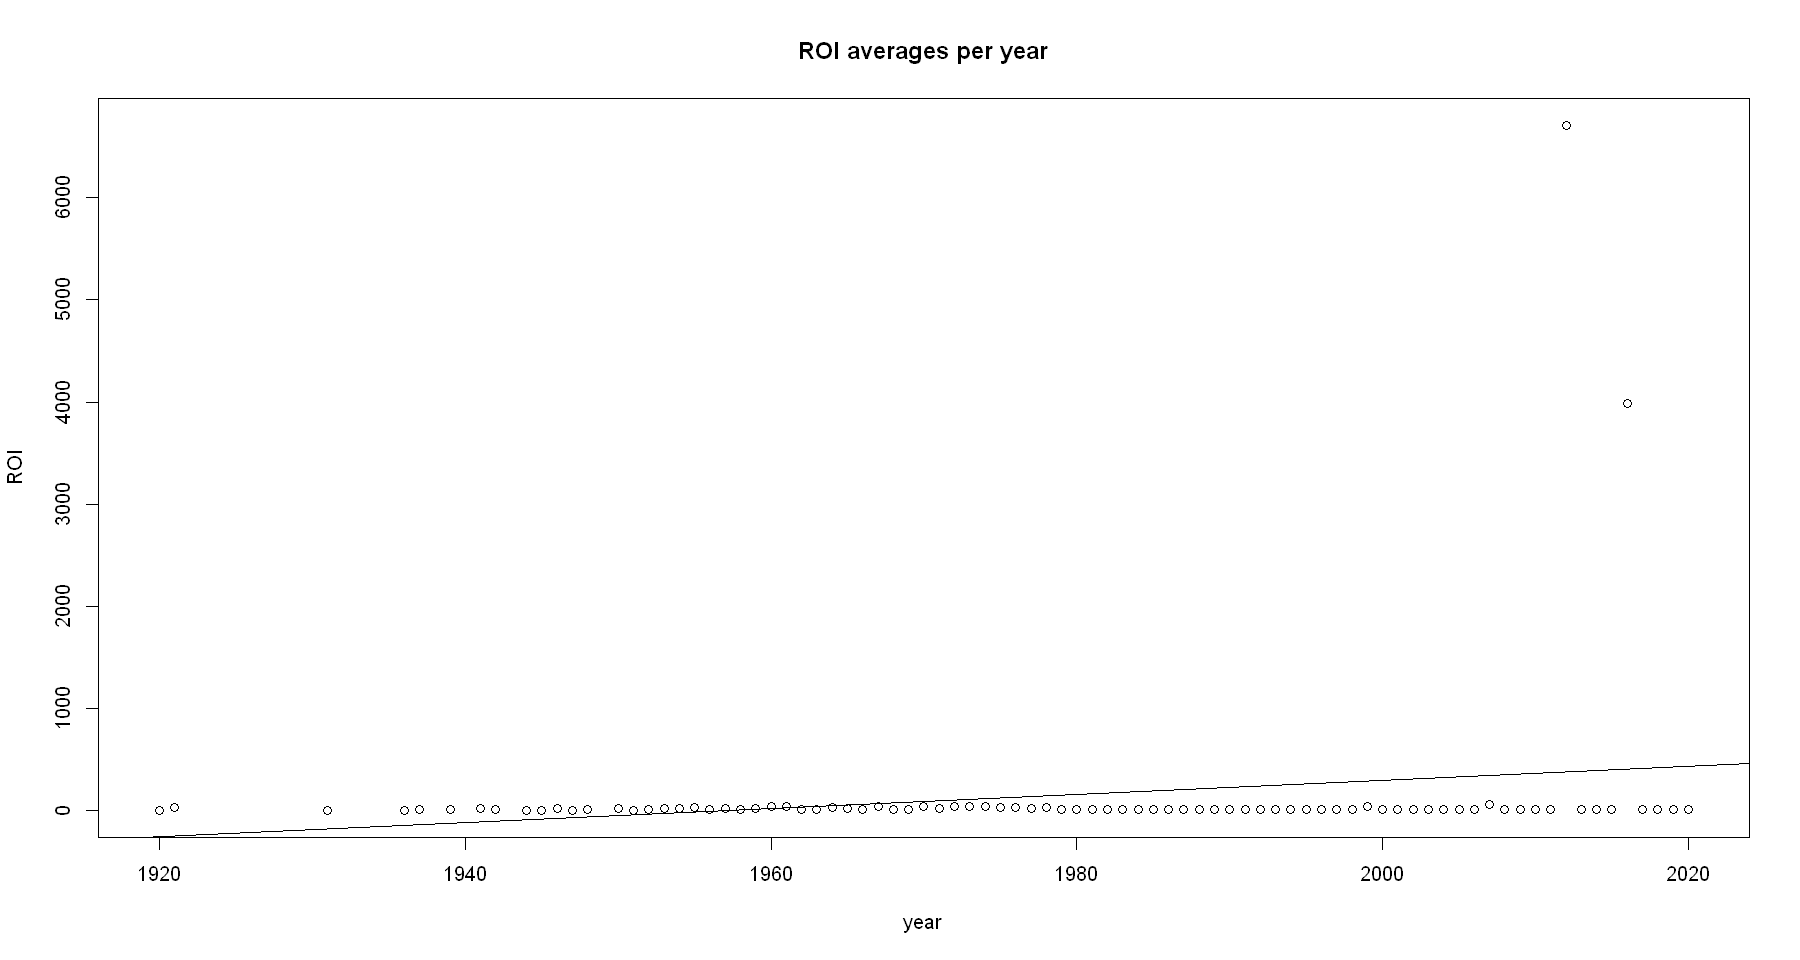

In [101]:
incomeinROI <- movie.rating.inf %>% filter(netratio !='') %>% filter(income > 0) %>% filter(netratio < 10000000000) #removes any divide by zero errors and incomplete data
incomeinROI <- incomeinROI[!is.na(incomeinROI$netratio),]
incomeROI <- lm(netratio ~ year, data = incomeinROI)
incomeinROI <- group_by(incomeinROI, year)
inflation.checkROI <- summarize(incomeinROI, ROI = mean(netratio))
plot(summarize(incomeinROI, ROI = mean(netratio)), main = "ROI averages per year")
abline(lm(ROI~year, data = inflation.checkROI))
cat('R-squared for ROI depending on year is:', summary(lm(ROI~year, data = inflation.checkROI))$r.squared, 'this strongly suggests the dataset is now not biased by inflation')


Created the unitless ROI measure

### Correlation exploration:


1.   Make set of only numerical columns
2.   Heat map of correlations between all numerical columns
3. Heat map of selected set of numerical columns



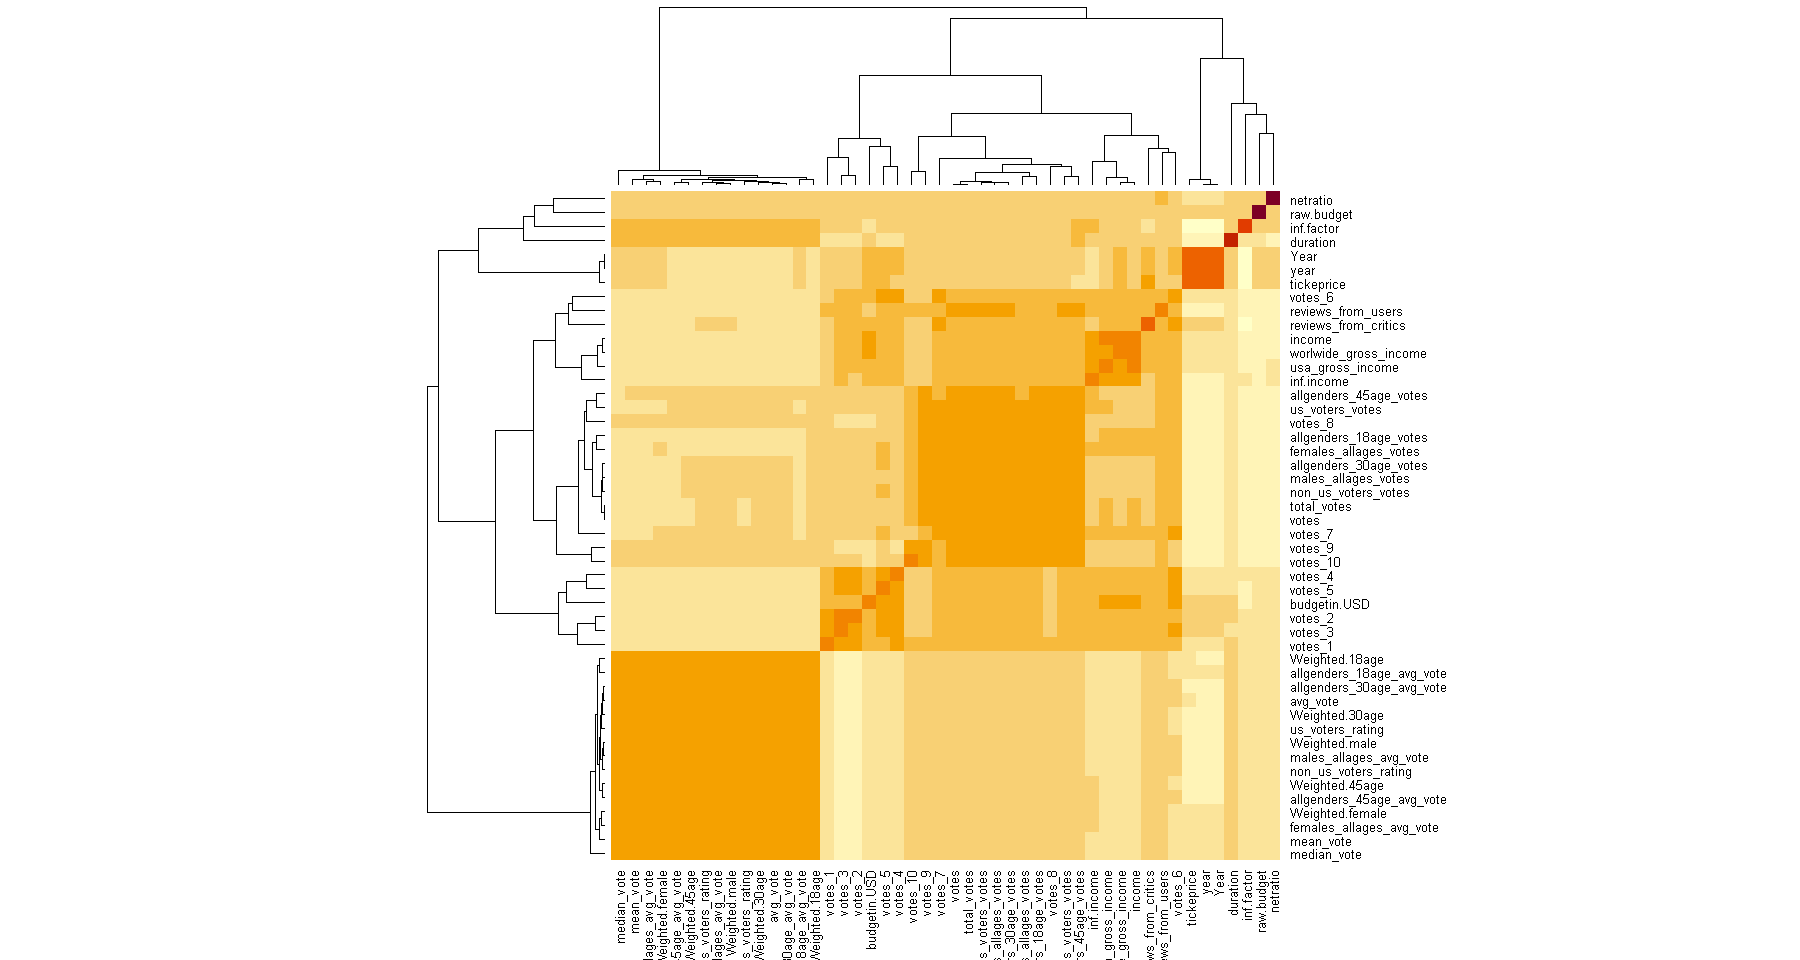

In [102]:
#to make a heatmap for all numerical columns
movies.MLR <- select(movie.rating.inf, -exchangerate)
#filters out a few outliers
movies.MLR <- filter(movies.MLR, netratio < 10000) #remove if we move this into movies.inf
movies.MLR <- filter(movies.MLR, budgetin.USD < 400000000) #remove if we move this into movies.inf
#colnames(movie.rating.inf)
data_num <- movies.MLR
num_cols <- unlist(lapply(data_num, is.numeric)) 
data_num <- data_num[ , num_cols]

data_num <- na.omit(data_num)
#cbind(lapply(lapply(data_num, is.na),sum))
#head(data_num)
correlation <- cor(data_num, use="pairwise.complete.obs",  method="pearson")
#head(correlation)
heatmap(correlation,Rowv = FALSE, Colv=FALSE)

#Interesting because: some obvious clustering and a lot of noise. We will focus in on ROI by looking at netratio column, which is the ratio of budget to income

**Selecting columns for further analysis**

1.   Use weighted ratings and delete raw ratings
2.   Delete columns of numbers of ratings
3.  Delete columns not corrected for inflation


+ In this heatmap of correlations we see a cluster of all of the different demographics of community reviewers, this suggests we may be able to predict a movie's overall rating from a small subset of reviewers. This would decrease the cost of focus group testing.

+ We also see a cluster of correlation between earnings corrected for ticket-price inflation, different gross income measures (not corrected for inflation) and budget (not corrected for inflation. 

+ Interestingly, our unit-less measure of ROI (netratio) does not fall into any cluster and has weak correlation with all the metrics. 

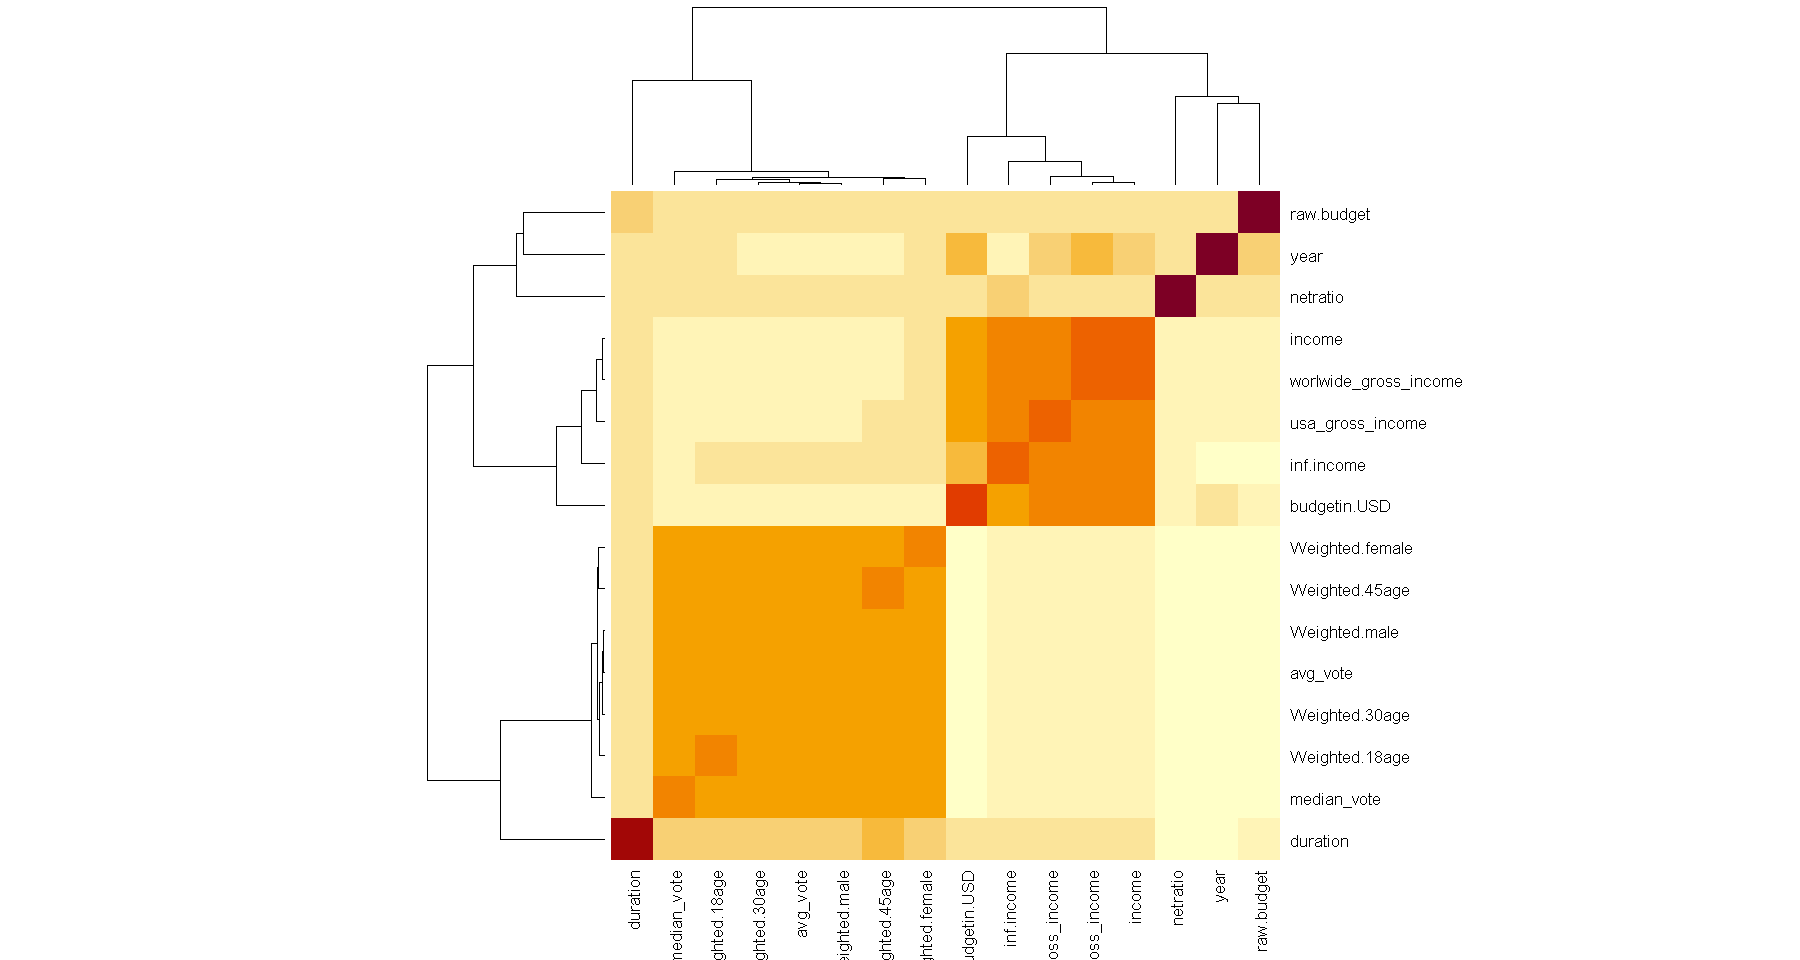

In [103]:
#heatmap from selected numerical columns (remove metrics like number of reviews and review distribution)
data_numsel <- select(data_num, c(year, duration, avg_vote, raw.budget, usa_gross_income, worlwide_gross_income, median_vote, Weighted.18age,Weighted.30age,Weighted.45age,Weighted.female,Weighted.male,income, inf.income, budgetin.USD, netratio))
correlation <- cor(data_numsel, use="pairwise.complete.obs",  method="pearson")
#head(correlation)
heatmap(correlation,Rowv = FALSE, Colv=FALSE)

**Further analysis of the columns in the heatmap above** <br>
*Pairwise correlations by clusters in the heatmap*

Income cluster:
* strong correlation between US and worldwide gross income (not inflation corrected)
* decent correlation between both gross income measures and budget (not inflation correction) = more expensive movies make more money! 
* decent correlation between both gross income measures and ticket sales corrected for ticket price inflation (which is based on both incomes added together so this is not suprising and a good sanity check on our dataset).
* ROI and year are not correlated with the other measures in this dataset
* Duration is only weakly correlated with other measures.
<br> <br>
votes cluster:
* All votes metrics were correlated with each other
* ROI was not correlated with any votes metric

**ROI is not normally distributed, but the other measures are all pretty normal**
<br><br>

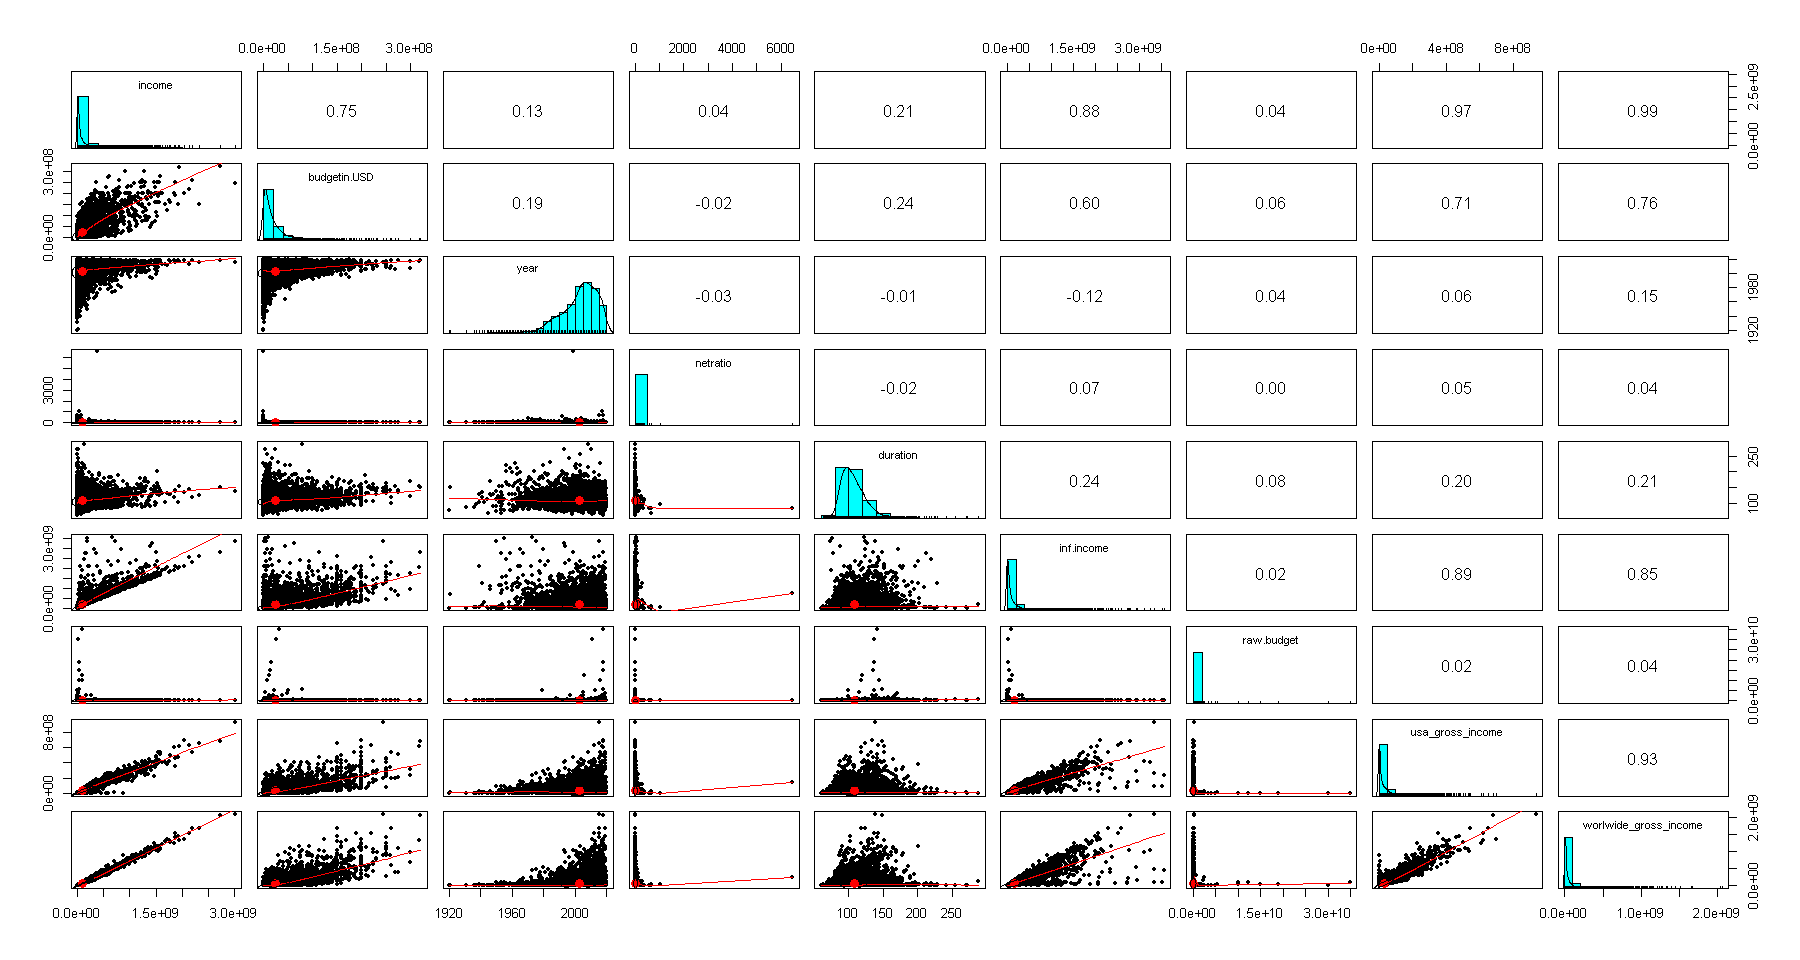

In [104]:
data_numsel1 <- select(data_num, c(income, budgetin.USD, year, netratio, duration, inf.income, raw.budget, usa_gross_income, worlwide_gross_income))
pairs.panels(data_numsel1)

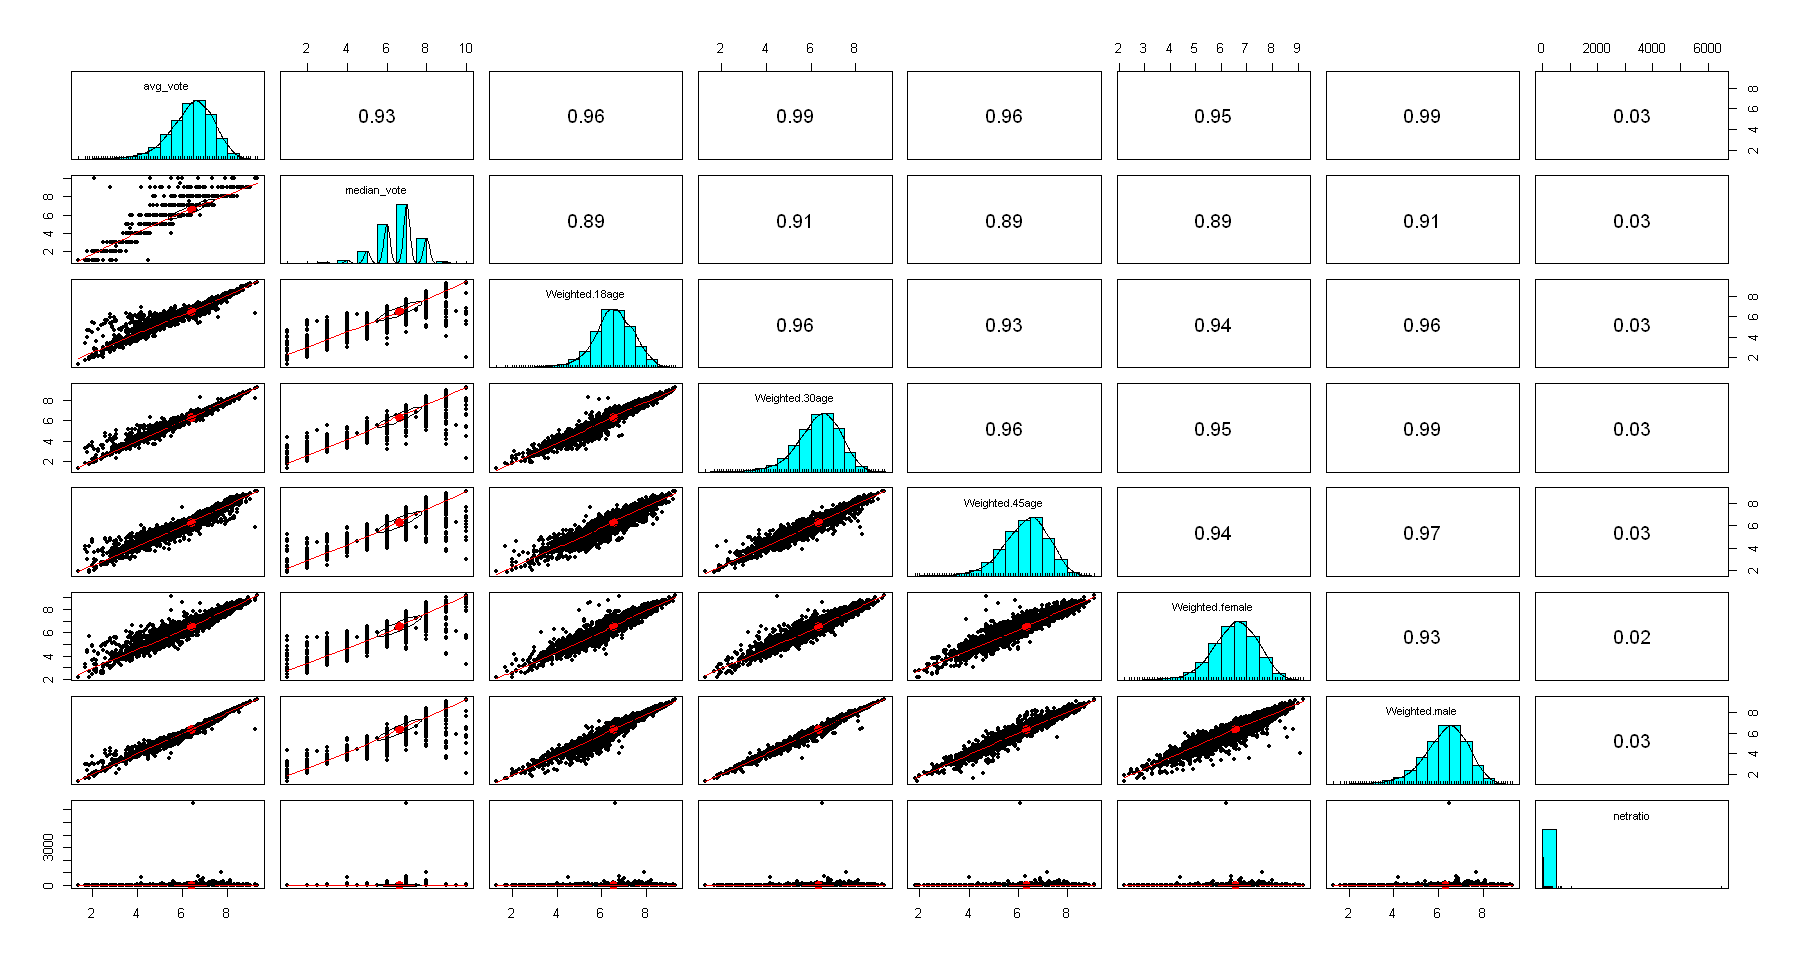

In [105]:
data_numsel2 <- select(data_numsel, c(-income, -budgetin.USD, -year, -duration, -inf.income, -raw.budget, -usa_gross_income, -worlwide_gross_income))
pairs.panels(data_numsel2)

## Multiple Linear Regressions

* Even multiple linear regression cannot explain ROI, this may be because ROI is not normally distributed, as most movies make close to their budget. 
* 93% of our movies make less than 20X their budget. Looking at the movies that make over 20X their budget, the $R^2$ is near zero (0.003287).  We tried treating these as outlier. 
*By looking at the majority of the movies (under 20X ROI), we see an $R^2$ of 0.43 in a multiple linear regression with income and vote data.  
* This suggests that we can at least somewhat use our dataset to predict ROI, even though it is an incomplete picture. 


### 1st MLR Model

**MLR model #1:** examines the effect of year, duration, average rating, raw budget (not inflation or currency adjsted), us income, worldwide income, median vote, weighted ratings for 5 demographic categories, income, income adjusted for ticket price, and adjusted budget (in USD, not adjusted for inflation). 
This model is *not predictive* with an $R^2$ of close to 0 (0.01). It does find a significant negative correlation between ROI and budget, and a signficant positive correlation between ROI and two income measures - USA gross income (not inflation corrected) and income corrected for ticket prices (inflation marker). <br> There is also a signficant negative correlation between movie duration and ROI.

In [106]:
#multiple linear regression on selected data columns
summary(lm(netratio ~ ., data= data_numsel))


Call:
lm(formula = netratio ~ ., data = data_numsel)

Residuals:
   Min     1Q Median     3Q    Max 
 -64.2   -5.6   -2.7    0.5 6449.1 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.327e+01  1.529e+02  -0.152 0.879054    
year                   2.120e-02  7.613e-02   0.278 0.780709    
duration              -1.246e-01  4.477e-02  -2.782 0.005413 ** 
avg_vote               2.705e+00  6.716e+00   0.403 0.687119    
raw.budget             2.078e-10  1.270e-09   0.164 0.870023    
usa_gross_income       7.731e-08  4.199e-08   1.841 0.065641 .  
worlwide_gross_income -1.308e-08  1.690e-08  -0.774 0.438965    
median_vote            1.736e+00  1.843e+00   0.942 0.346382    
Weighted.18age         1.012e+00  3.728e+00   0.272 0.785956    
Weighted.30age        -2.289e+00  7.265e+00  -0.315 0.752714    
Weighted.45age        -1.974e+00  3.758e+00  -0.525 0.599477    
Weighted.female       -5.7

### 2nd MLR Model

**MLR model #2:** looks at the same metrics as above but filters for movies with ROI less than 20 (makes less than 20X the initial budget). This captures over 97% of films with budget and income data and leaves out a small number of films mostly with incredibly small budgets but high reported incomes (see plot below) 
Without these outliers, we get an $R^2$ of 45%. 

[1] 0.9609734

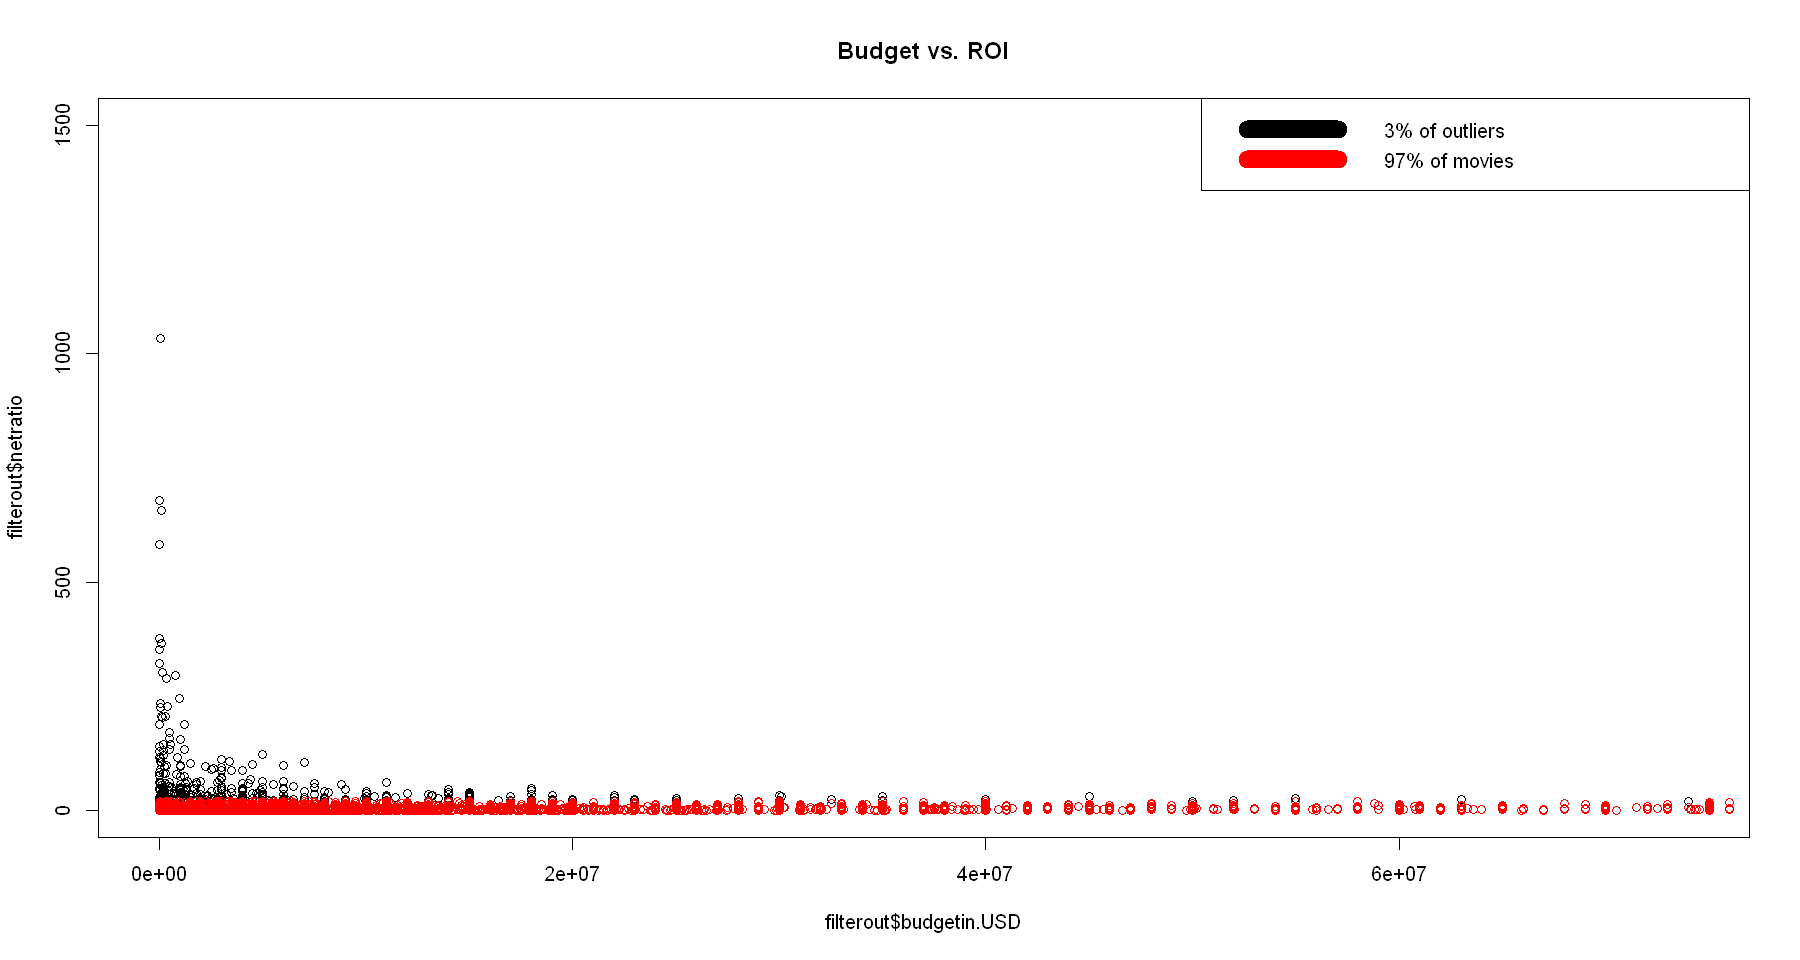

In [107]:
data_numselfilter <- filter(data_numsel, netratio<20)
filterout <- filter(data_numsel, netratio >= 20)
plot(filterout$budgetin.USD, filterout$netratio, main = 'Budget vs. ROI', ylim = c(0,1500))
legend('topright', legend = c('3% of outliers', '97% of movies'), col=c("black","red"), lwd = 15)
points(data_numselfilter$budgetin.USD, data_numselfilter$netratio, col = 'red')
length(data_numselfilter$netratio)/length(data_numsel$netratio)

In [108]:
#multiple linear regression on selected data columns with only ROI less than 10X

summary(lm(netratio ~ ., data= data_numselfilter))


Call:
lm(formula = netratio ~ ., data = data_numselfilter)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.8608  -1.7562  -0.6481   0.7713  16.5674 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -8.772e+00  6.577e+00  -1.334  0.18227    
year                   4.915e-03  3.276e-03   1.500  0.13356    
duration              -1.029e-02  1.878e-03  -5.481 4.36e-08 ***
avg_vote               1.881e+00  2.780e-01   6.768 1.40e-11 ***
raw.budget             4.883e-11  5.195e-11   0.940  0.34729    
usa_gross_income       2.588e-08  1.901e-09  13.610  < 2e-16 ***
worlwide_gross_income -3.887e-09  7.838e-10  -4.959 7.22e-07 ***
median_vote           -4.727e-01  7.696e-02  -6.142 8.51e-10 ***
Weighted.18age        -4.571e-01  1.543e-01  -2.961  0.00307 ** 
Weighted.30age        -1.618e+00  3.026e-01  -5.348 9.11e-08 ***
Weighted.45age         1.059e-01  1.565e-01   0.677  0.49857    


### 3rd MLR model
**Realistically we don't know how much a movie will make before we distribute it** <br>
Here we make a model based only on data we can get prior to release: voting data from focus groups/screenings, budget data, and duration of movie. <br>

Now we get a low $R^2$ value of only about 12%. This indicates that while our priors do influence ROI, they are not good predictive measures. 


In [109]:
data_numselpriors <- filter(data_numsel, netratio<20)
data_numselpriors <- select(data_numselpriors, c(-year, -usa_gross_income, -worlwide_gross_income, -inf.income, -income))
summary(lm(netratio ~ ., data= data_numselpriors))


Call:
lm(formula = netratio ~ ., data = data_numselpriors)

Residuals:
   Min     1Q Median     3Q    Max 
-5.936 -2.344 -1.155  1.053 18.306 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.678e+00  3.400e-01  -7.878 3.74e-15 ***
duration        -8.633e-03  2.283e-03  -3.781 0.000157 ***
avg_vote         2.307e+00  3.416e-01   6.753 1.54e-11 ***
raw.budget      -4.556e-11  6.395e-11  -0.712 0.476220    
median_vote     -7.208e-01  9.396e-02  -7.671 1.89e-14 ***
Weighted.18age  -1.265e-01  1.900e-01  -0.666 0.505568    
Weighted.30age  -1.749e+00  3.706e-01  -4.719 2.41e-06 ***
Weighted.45age   3.762e-01  1.927e-01   1.952 0.050960 .  
Weighted.female  9.760e-01  1.978e-01   4.935 8.15e-07 ***
Weighted.male   -3.443e-02  4.788e-01  -0.072 0.942687    
budgetin.USD     8.067e-09  1.130e-09   7.139 1.02e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.615 on 8558 degrees of freedom
Multipl

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


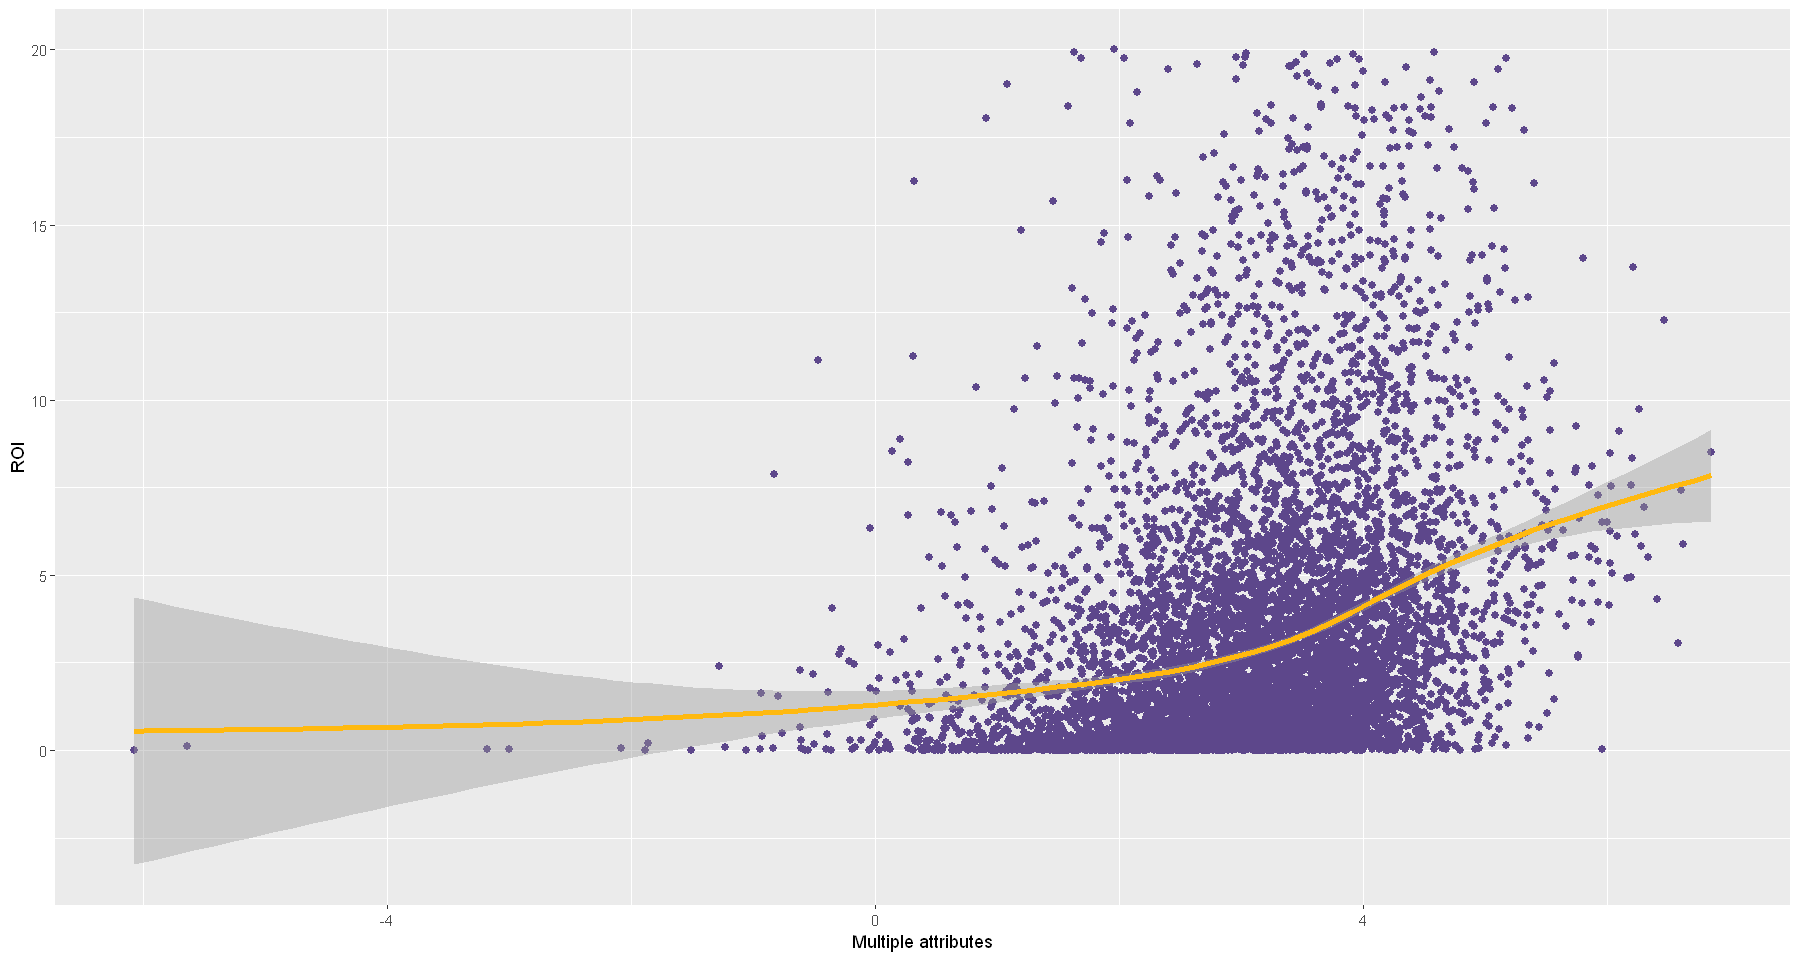

In [110]:
#multiple regression plot for ROI (only under 20X budget and measures we can get prior to movie release)

MLR <- lm(netratio ~ ., data= data_numselpriors)
df <- data_numselpriors
df$MLR <- stats::predict(MLR, newdata=df)
err <- stats::predict(MLR, newdata=df, se = TRUE)
df$ucl <- err$fit + 1.96 * err$se.fit
df$lcl <- err$fit - 1.96 * err$se.fit

g <- ggplot(df)
g <- g + geom_point(aes(x=MLR, y = netratio), size = 2, colour = "mediumpurple4")
g <- g + geom_smooth(data=df, aes(x=MLR, y=netratio, ymin=lcl, ymax=ucl), size = 1.5, 
            colour = "darkgoldenrod1", se = TRUE, stat = "smooth") 
g + labs(main = 'Multiple linear regression with error', y = 'ROI', x = 'Multiple attributes')

#code from https://stackoverflow.com/questions/14146005/multivariable-regression-with-ggplot2

This is a MLR with ROI as the response variable.
+ The code block above this one shows all of the fitted variables
+ created a prediction from the MLR model
+ Calculated standard error and created Upper and lower bounds
+ Used the above variables to plot the model with confidence intervals

### Prediction of movie popularity: streaming services metric

We cannot reliably predict ROI based on a historical dataset.  However, the ROI of films nowadays is much more complex than that of films in the past.  In particular, whether a film is picked up by a streaming service can make or break it.  
In this analysis, we assume that movies that are the most popular in focus groups/screenings will be more likely to be picked up by streaming services.  
<br>
In a multiple linear regression, we find that several vote measures are significantly explanatory for average vote ($R^2$ = 98%). Budget in USD, duration, and year do not explain average vote (p>0.01) <br>
By performing single linear regressions, we find that individual demogrphic groups perform as well or nearly as well as the multiple linear regression ($R^2$ of 89-98%). See below for group-by-group analysis.

 <br> **Big question: whose vote matters?**
 We tackled this question overall (any demographic group is reliable) as well as for specific genres (different demographic groups perform better for some genres).

In [111]:
summary(lm(avg_vote ~ year + duration + raw.budget + Weighted.18age + Weighted.30age
           + Weighted.45age + Weighted.female + Weighted.male + budgetin.USD, data= data_numselfilter))


Call:
lm(formula = avg_vote ~ year + duration + raw.budget + Weighted.18age + 
    Weighted.30age + Weighted.45age + Weighted.female + Weighted.male + 
    budgetin.USD, data = data_numselfilter)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71444 -0.04282 -0.00214  0.04137  1.97537 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -7.349e-01  2.380e-01  -3.088  0.00202 ** 
year             3.085e-04  1.184e-04   2.605  0.00920 ** 
duration         2.045e-04  7.555e-05   2.706  0.00682 ** 
raw.budget       2.718e-13  2.119e-12   0.128  0.89794    
Weighted.18age  -1.297e-01  6.133e-03 -21.147  < 2e-16 ***
Weighted.30age   8.235e-02  1.230e-02   6.695  2.3e-11 ***
Weighted.45age  -7.490e-02  6.322e-03 -11.848  < 2e-16 ***
Weighted.female  2.524e-01  5.930e-03  42.574  < 2e-16 ***
Weighted.male    8.874e-01  1.262e-02  70.327  < 2e-16 ***
budgetin.USD    -1.153e-11  3.790e-11  -0.304  0.76096    
---
Signif. codes:  0 '***' 0.001 '

### Single Linear Regression Analyses (3 to 8)
Here we look to see which demographic groups on their own are best at predicting the average vote for a film

18+ vs average vote has R-squared of:
 0.9150552
 30+ vs average vote has R-squared of:
 0.9755946
 45+ vs average vote has R-squared of:
 0.9270324
 Female vote vs average vote has R-squared of:
 0.8962799
 Male vote vs average vote has R-squared of:
 0.9813487
 Budget vs average vote has R-squared of:
 0.001602096 


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


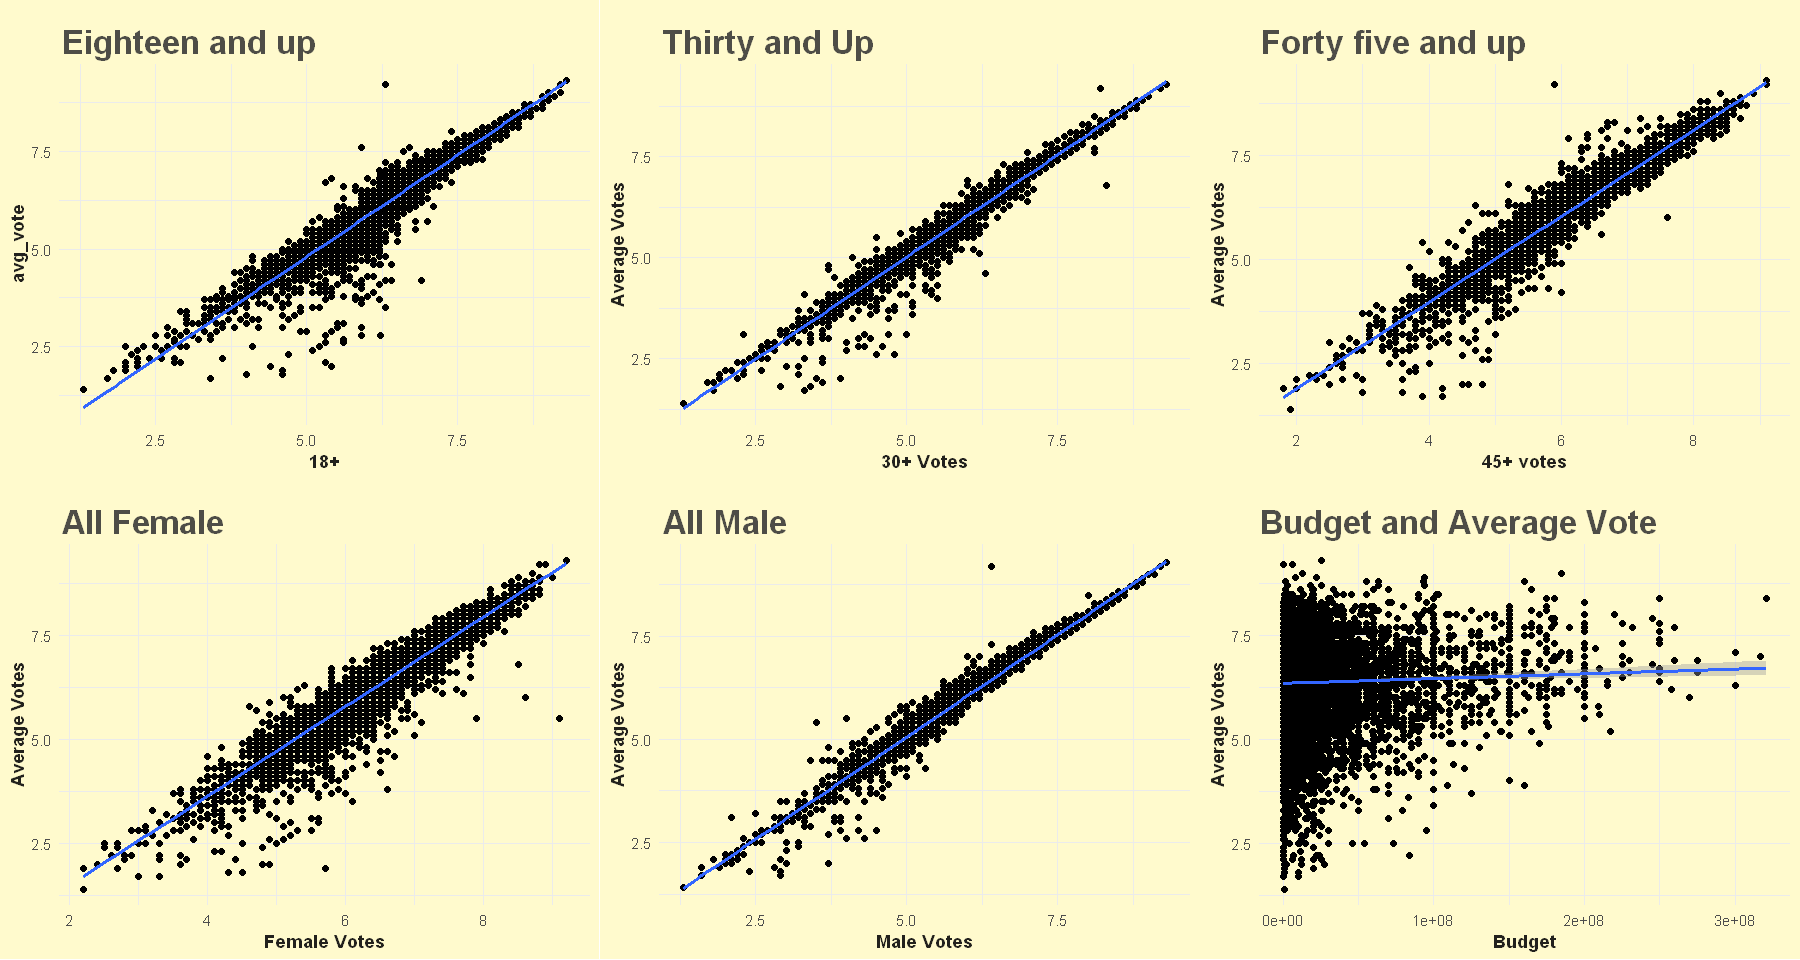

In [112]:
data_numselvotes <- select(data_numsel, c(avg_vote, Weighted.18age,Weighted.30age,Weighted.45age,Weighted.female,Weighted.male, budgetin.USD))
P1 <- ggplot(data=data_numselvotes,aes(x=Weighted.18age, y=avg_vote)) +
  theme_minimal() +
  geom_point() +
  geom_smooth(method='lm', se= T) +
  labs(title = "Eighteen and up", x= "18+", y = "avg_vote")+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
  ) 
  cat('18+ vs average vote has R-squared of:\n', summary(lm(avg_vote ~ Weighted.18age, data = data_numselvotes))$r.squared) 

P2 <- ggplot(data=data_numselvotes,aes(x=Weighted.30age, y=avg_vote)) +
  theme_minimal() +
  geom_point() +
  geom_smooth(method='lm', se= T) +
labs(title = "Thirty and Up",x = '30+ Votes', y='Average Votes')+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
  ) 
  cat('\n 30+ vs average vote has R-squared of:\n', summary(lm(avg_vote ~ Weighted.30age, data = data_numselvotes))$r.squared)

P3 <- ggplot(data=data_numselvotes,aes(x=Weighted.45age, y=avg_vote)) +
  theme_minimal() +
  geom_point() +
  geom_smooth(method='lm', se= T) +
labs(title = "Forty five and up",x = '45+ votes', y='Average Votes')+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
  ) 
  cat('\n 45+ vs average vote has R-squared of:\n', summary(lm(avg_vote ~ Weighted.45age, data = data_numselvotes))$r.squared)

P4 <- ggplot(data=data_numselvotes,aes(x=Weighted.female, y=avg_vote)) +
  theme_minimal() +
  geom_point() +
  geom_smooth(method='lm', se= T) +
labs(title = "All Female",x = 'Female Votes', y='Average Votes')+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
  ) 
  cat('\n Female vote vs average vote has R-squared of:\n', summary(lm(avg_vote ~ Weighted.female, data = data_numselvotes))$r.squared)

P5 <- ggplot(data=data_numselvotes,aes(x=Weighted.male, y=avg_vote)) +
  theme_minimal() +
  geom_point() +
  geom_smooth(method='lm', se= T)+
labs(title = "All Male",x = 'Male Votes', y='Average Votes')+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
  ) 
  cat('\n Male vote vs average vote has R-squared of:\n', summary(lm(avg_vote ~ Weighted.male, data = data_numselvotes))$r.squared) 

P6 <- ggplot(data=data_numselvotes,aes(x=budgetin.USD, y=avg_vote)) +
  theme_minimal() +
  geom_point() +
  geom_smooth(method='lm', se= T)+
labs(title = "Budget and Average Vote",x = 'Budget', y='Average Votes')+
   theme(
    text = element_text(color = "#22211d"),
    plot.background = element_rect(fill = "lemonchiffon", color = NA),
    panel.background = element_rect(fill = "lemonchiffon", color = NA),
    legend.background = element_rect(fill = "lemonchiffon", color = NA),

    plot.title = element_text(size= 20, hjust=0.01, color = "#4e4d47", margin = margin(b = 0.1, t = 0.4, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    title=element_text(face='bold'),
    legend.position = c(0.13, 0.21),
  ) 
  cat('\n Budget vs average vote has R-squared of:\n', summary(lm(avg_vote ~ budgetin.USD, data = data_numselvotes))$r.squared,'\n') 

grid.arrange(P1, P2,P3,P4,P5,P6, ncol=3)

#par(mfrow = c(3, 2))
#P1
#P2
#P3
#P4
#P5
#P6


Weighted votes for all demographic groups were significantly explanatory for the average vote.  This tell us that we do not need to seek specific demographic groups to find movies that will be loved! 
This greatly simplifies pre-screen data collection.

### 3D plot for Male femal and average votes

In [113]:

mesh_size <- .05

X <- data_numselvotes[c(data_numselvotes$Weighted.male , data_numselvotes$Weighted.female),]
y <- data_numselvotes[c(data_numselvotes$avg_vote),]


model <- svm_rbf(cost = 0.5) %>% 
  set_engine("kernlab") %>% 
  set_mode("regression") %>% 
  fit(avg_vote ~  Weighted.male + Weighted.female, data = data_numselvotes)

minx <- min(X$Weighted.male) 
maxx <- max(X$Weighted.male) 
miny <- min(X$Weighted.female) 
maxy <- max(X$Weighted.female) 
xrange <- seq(minx, maxx, mesh_size)
yrange <- seq(miny, maxy, mesh_size)

xy <- meshgrid(x = xrange, y = yrange)
xx <- xy$X
yy <- xy$Y

dim_val <- dim(xx)
xx1 <- matrix(xx, length(xx), 1)
yy1 <- matrix(yy, length(yy), 1)
final <- cbind(xx1, yy1)

pred <- model %>% predict(final)

pred <- pred$.pred
pred <- matrix(pred, dim_val[1], dim_val[2])

fig <- plot_ly(data_numselvotes, x = ~Weighted.male, y = ~Weighted.female, z = ~avg_vote ) %>% 
  add_markers(size = 5) %>% 
  add_surface(x=xrange, y=yrange, z=pred, alpha = 0.65, type = 'plane', name = 'pred_surface')
fig

HTML widgets cannot be represented in plain text (need html)

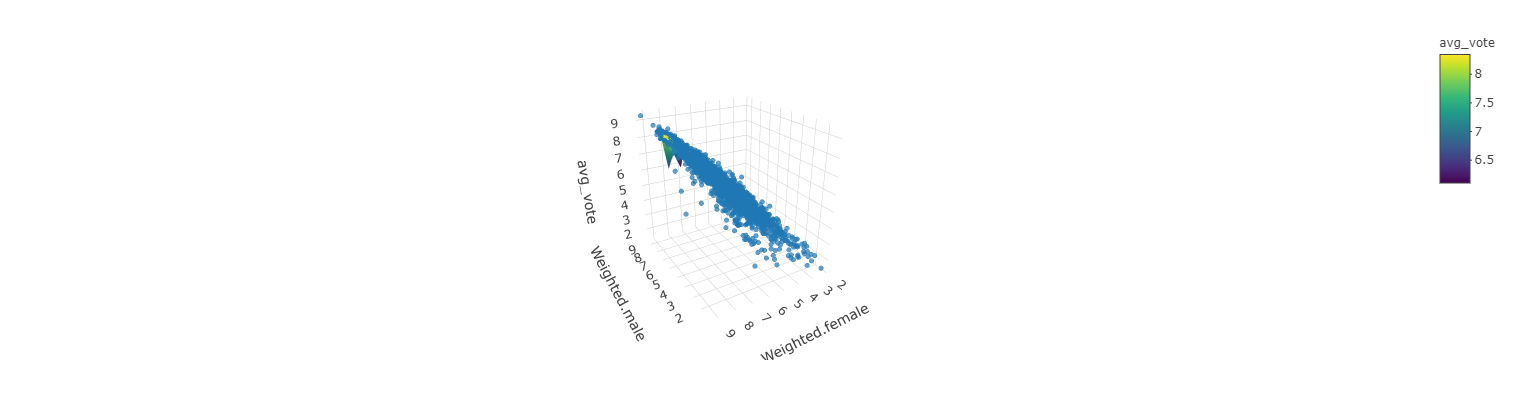

## What kind of movie should we make and what production house should we collaborate with?

+ First, look at 5 top genres
+ Then at 5 most prolific production houses. 
+ We find that different demographic groups are better at predicting the average vote of different genres. 
+ We find that even though Comedy movies have the second lowest average votes (after Action films), they still have the highest ROI. 
<br>
+ Biographies have the second highest ROI and the highest average vote.  They would be a good choice for decent theater sales and pickup by streaming services.


This compares between genre


In [114]:
genres <- movie.rating.inf %>% separate( col = genre, into = c("Actual.Genre", "genre2", "genre3"), sep = "\\,")

my_func <- function(df, group){
  df %>%
    group_by_(group) %>%
    summarise(my_count = n()) %>%
    arrange(desc(my_count))
}
genre.sort <- my_func(genres, "Actual.Genre")
top.five.genre<- head(genre.sort, n=5)

genres <- genres %>% ungroup() %>% filter(Actual.Genre %in% top.five.genre$Actual.Genre) %>% filter(netratio < 20 & budgetin.USD < 400000000) %>% 
select(c(Actual.Genre,  year, duration, avg_vote,  us_voters_rating, non_us_voters_rating, Weighted.18age, Weighted.30age, Weighted.45age, Weighted.female, Weighted.male, budgetin.USD, netratio))

This produces heat maps for correlations in each genre looking only at data that can be collected prior to movie release and ROI

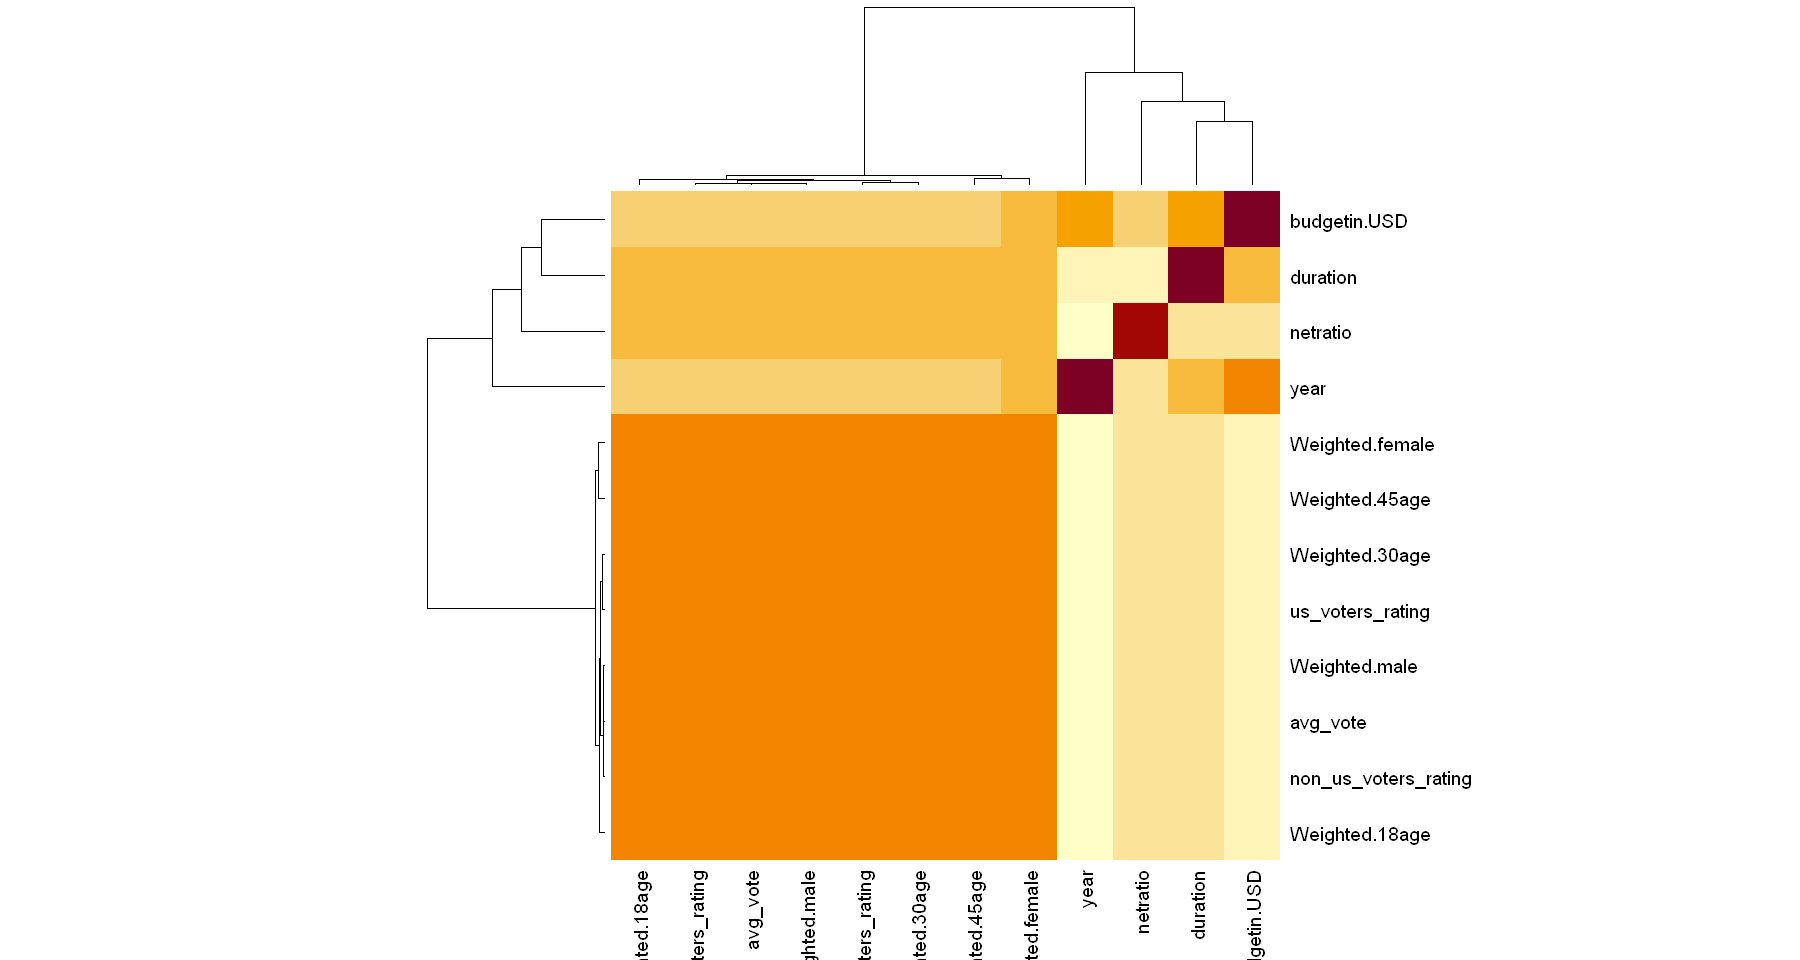

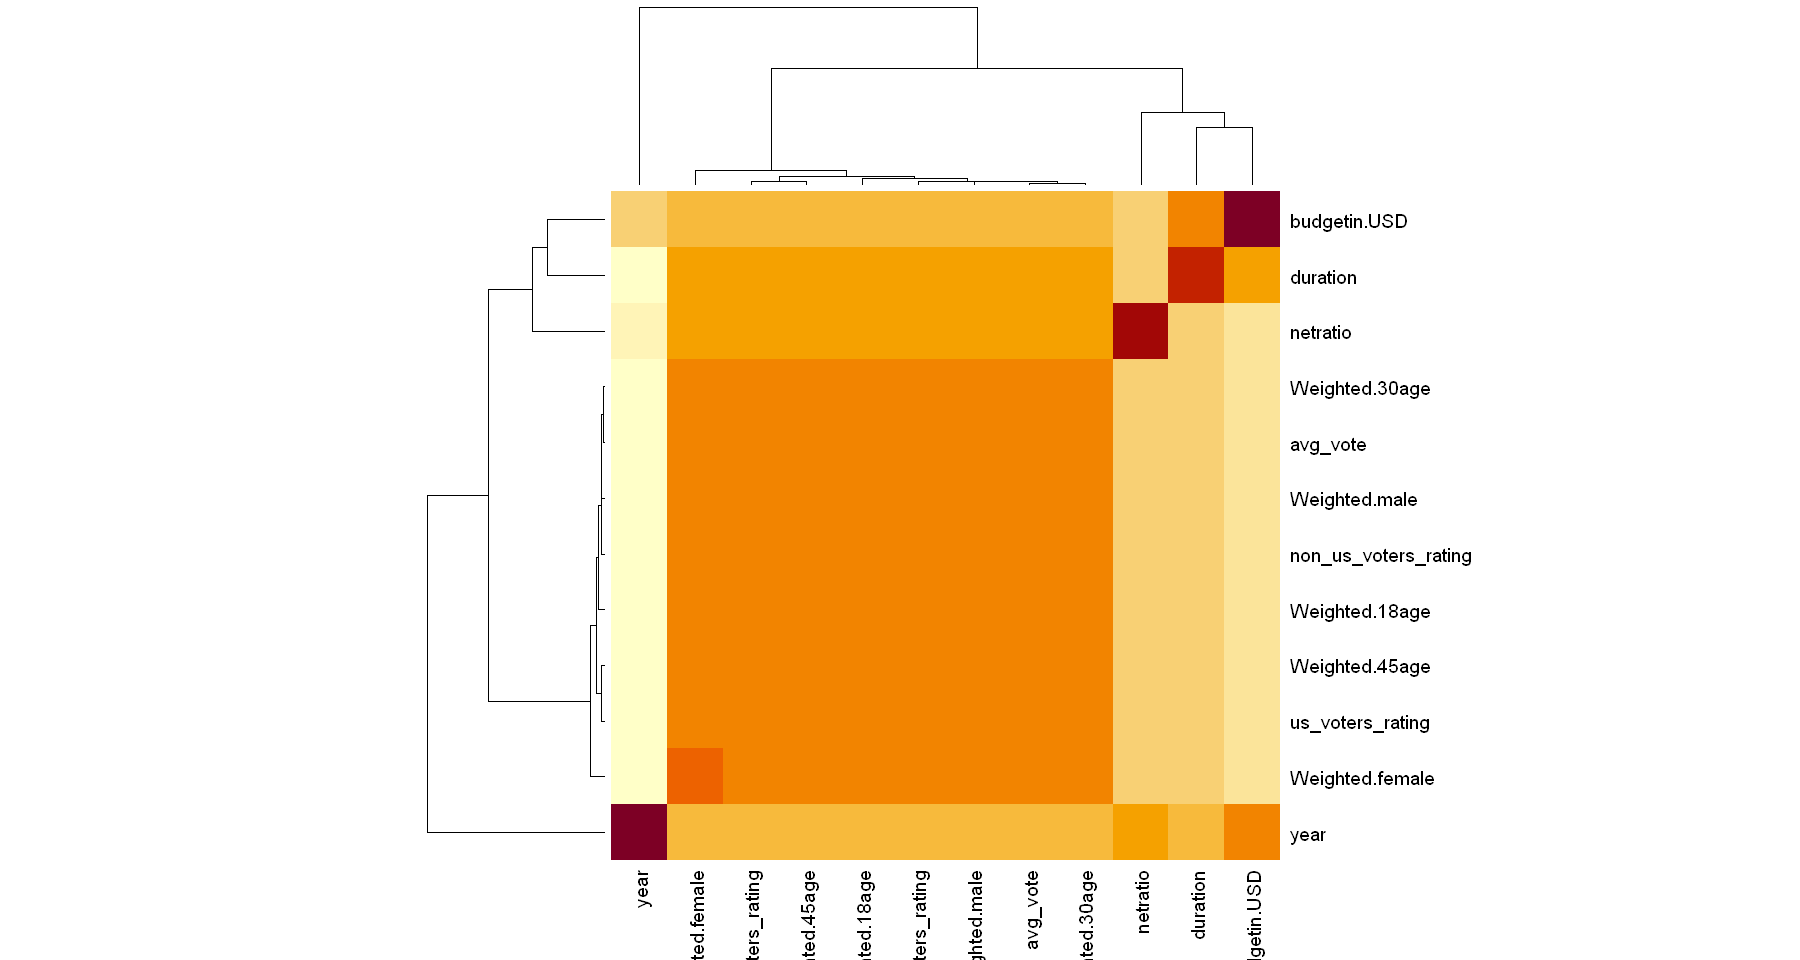

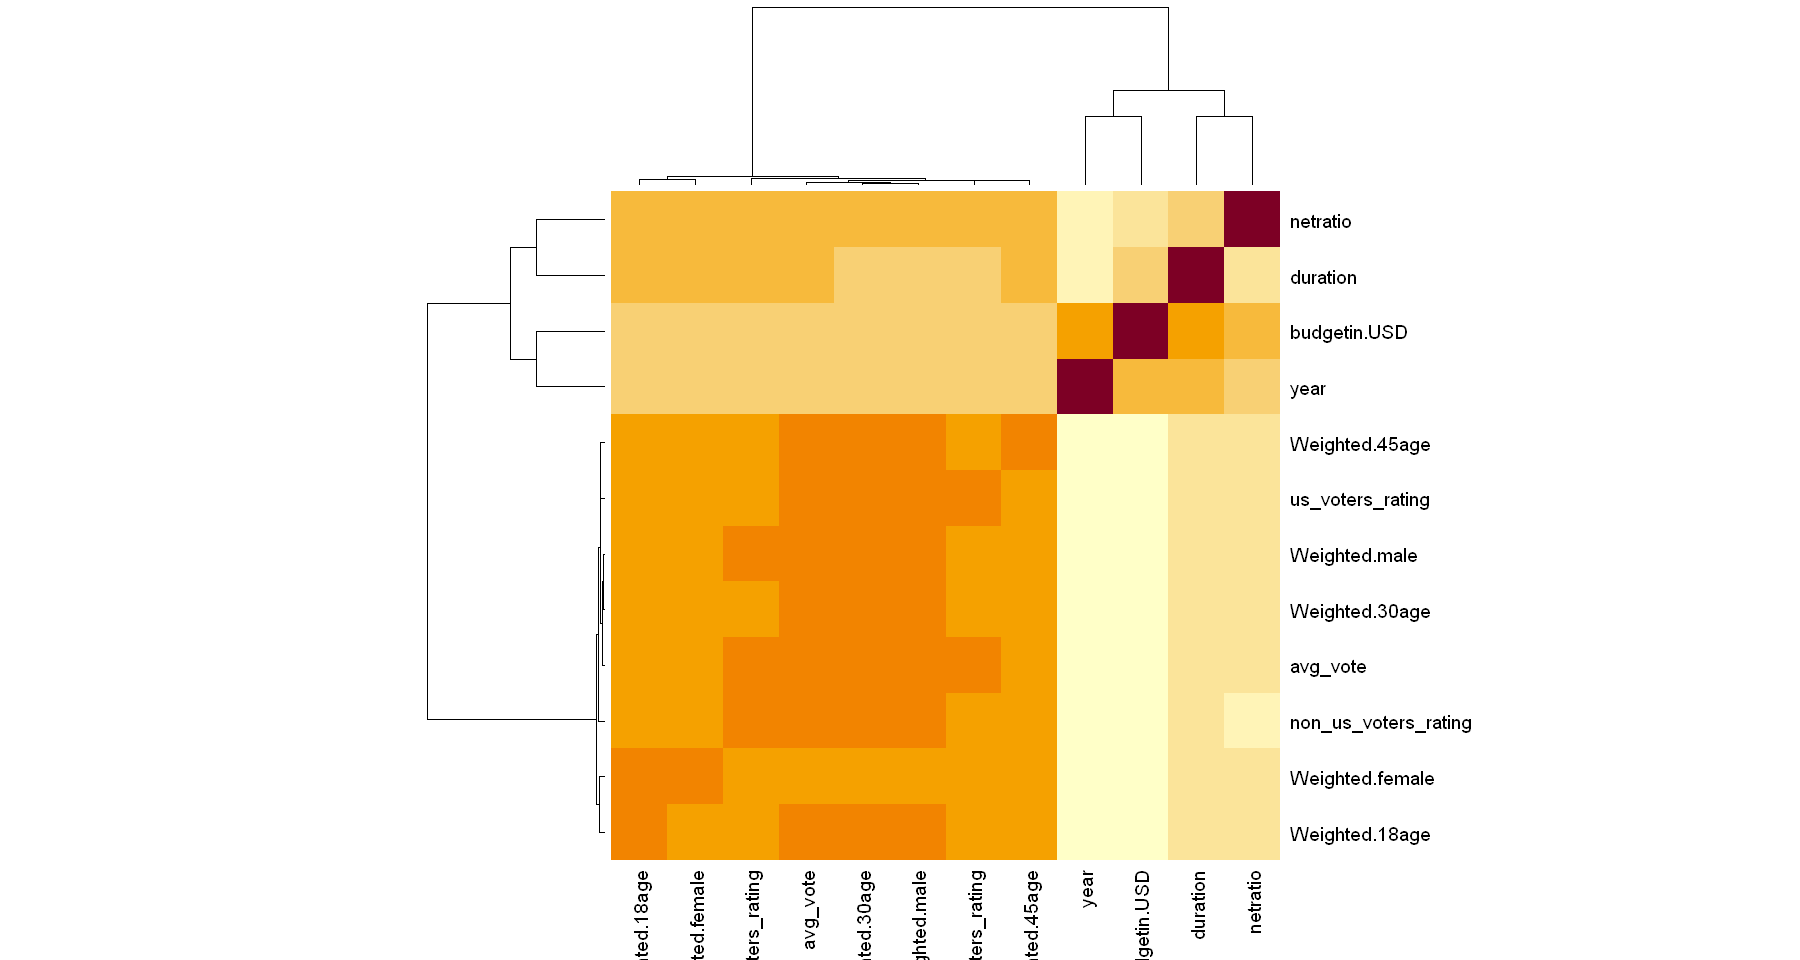

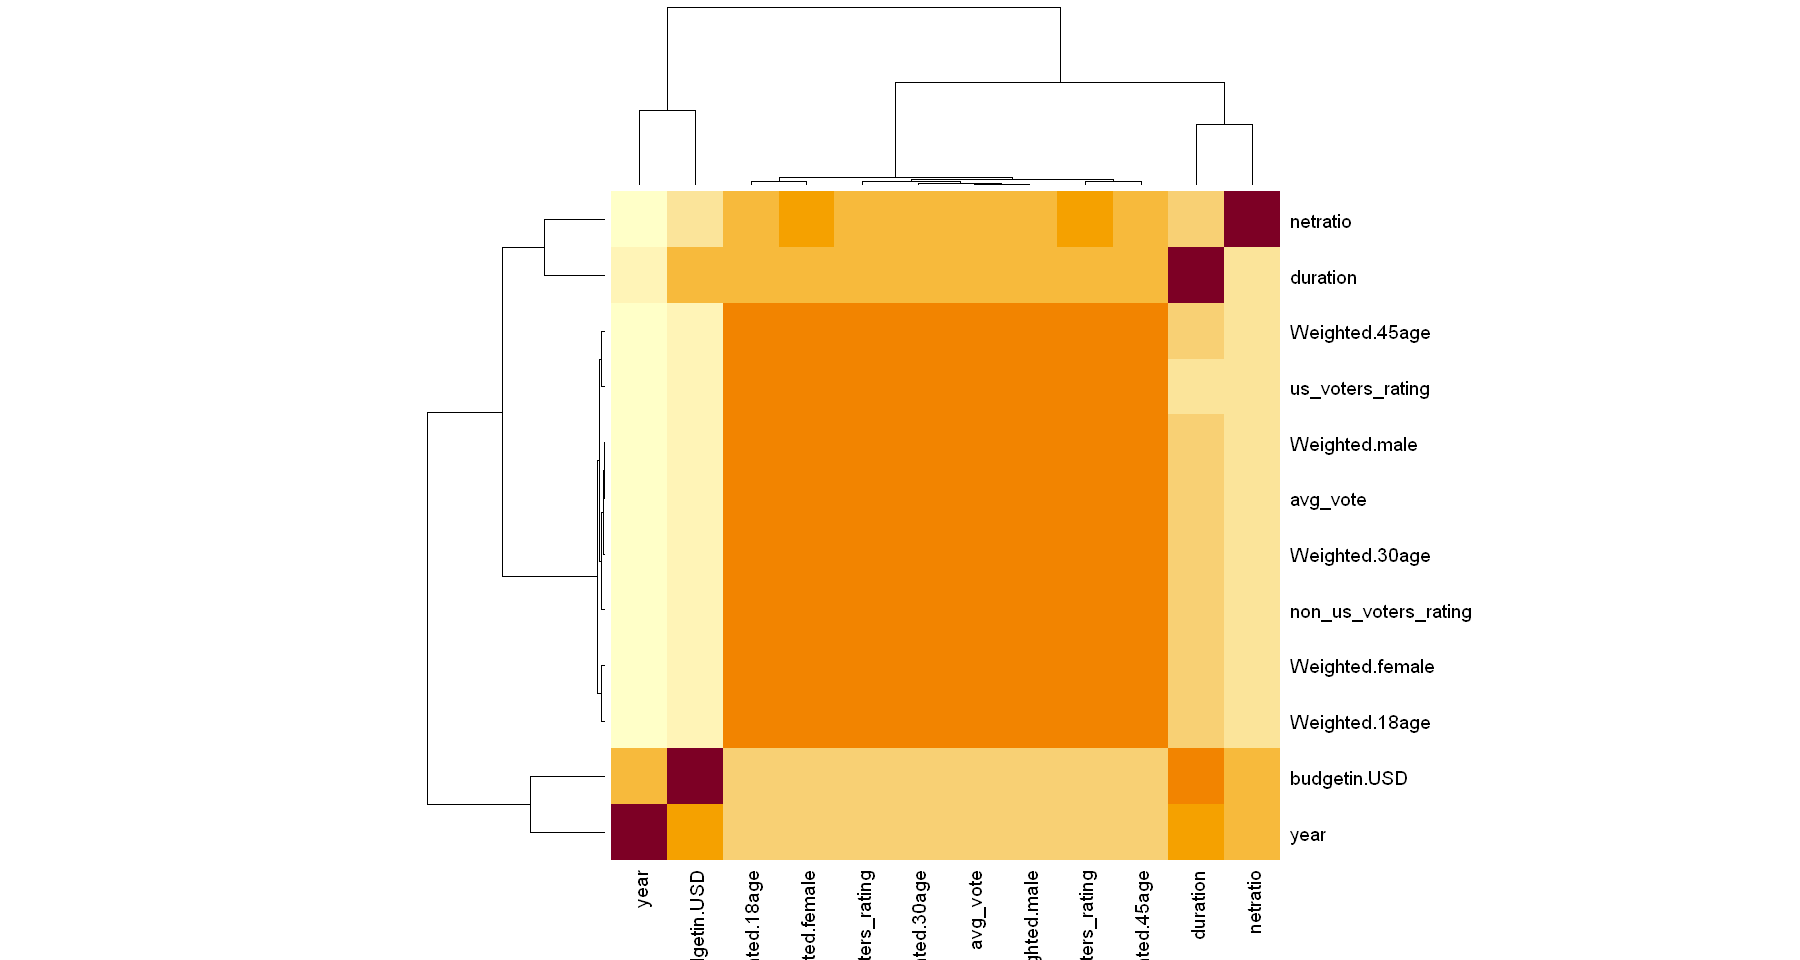

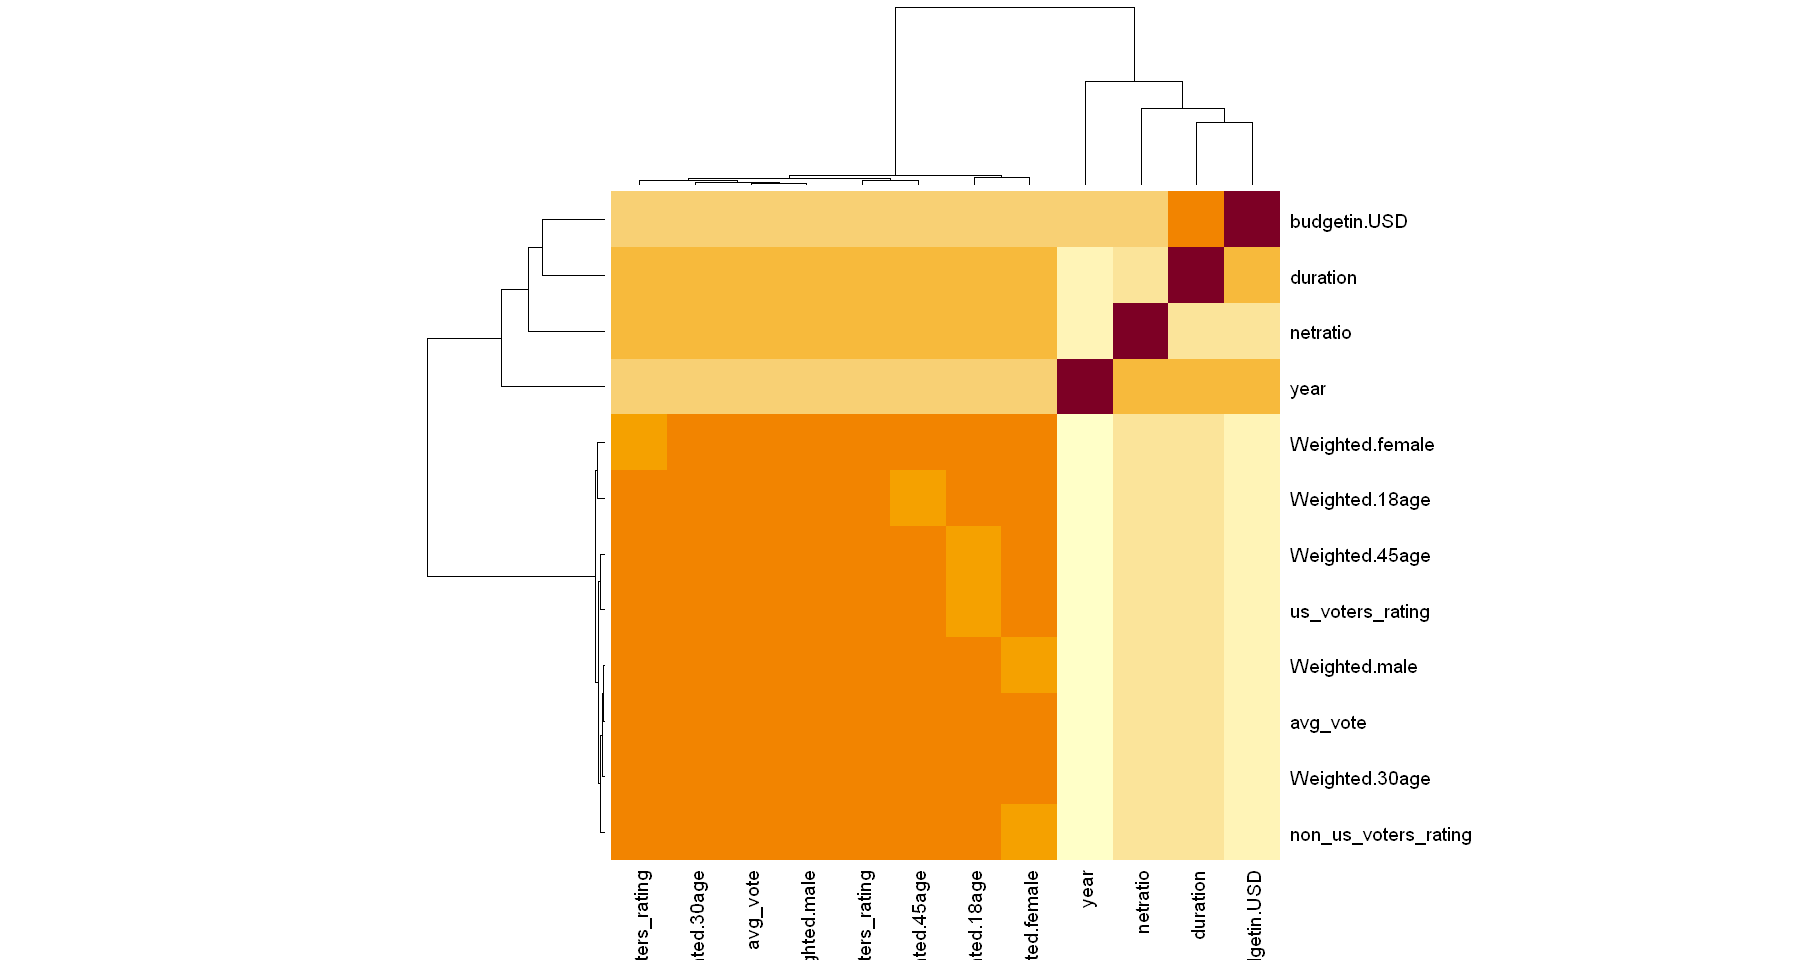

In [115]:
X<-split(genres, genres$Actual.Genre)


Action <- X[[1]]
Biography <- X[[2]]
Comedy <- X[[3]]
Crime <- X[[4]]
Drama <- X[[5]]

Action <- Action %>% ungroup %>% select(-Actual.Genre)
Biography <- Biography %>% ungroup() %>% select( c(-Actual.Genre))
Comedy <- Comedy %>% ungroup() %>% select( -Actual.Genre)
Crime <- Crime %>% ungroup() %>% select(-Actual.Genre)
Drama <- Drama %>% ungroup() %>% select(-Actual.Genre)


correlationA <- cor(Action, use="pairwise.complete.obs",  method="pearson")

heatmap(correlationA,Rowv = FALSE, Colv=FALSE)

correlationB <- cor(Biography, use="pairwise.complete.obs",  method="pearson")

heatmap(correlationB,Rowv = FALSE, Colv=FALSE)

correlationC <- cor(Comedy, use="pairwise.complete.obs",  method="pearson")

heatmap(correlationC,Rowv = FALSE, Colv=FALSE)

correlationD <- cor(Crime, use="pairwise.complete.obs",  method="pearson")

heatmap(correlationD,Rowv = FALSE, Colv=FALSE)

correlationE <- cor(Drama, use="pairwise.complete.obs",  method="pearson")

heatmap(correlationE,Rowv = FALSE, Colv=FALSE)

#all voting metrics show very strong clustering, suggesting that for any genre, any demographics vote should be able to predict the average vote.

### Multiple Linear Regression by Genre
<br>
We find that ROI is not highly predictable, even only looking at a single genre. However, it is much more predictable than looking at movies overall. Furthermore, some genres are more predictable than others. 
<br> For example, using our set of priors, we get an $R^2$ of 59% for Biographical films.  Making them a "safer bet" for investment. 

Overall findings of which groups perform best at predicting ratings:

+ Across the board grouped men and grouped women can both predict the average vote extremelly well.
+ For action, 30-45 group also does very well
+ For Comedy, 18-30 group also does well
+ For crime, 30-45 group also does very well
+ For drama, 18-30 and 30-45 groups also do well


In [116]:
#descriptive variable = average vote:
cat('R-squared for avg_vote, order  = 18-30, 30-45, 45+, Female, Male ')
cat('\n R-squared for Action', summary(lm(avg_vote ~ Weighted.18age + Weighted.30age + Weighted.45age + Weighted.female + Weighted.male, data = Action))$coefficients[,4])

cat('\n R-squared for Biography', summary(lm(avg_vote ~ Weighted.18age + Weighted.30age + Weighted.45age + Weighted.female + Weighted.male, data = Biography))$coefficients[,4])

cat('\n R-squared for Comedy', summary(lm(avg_vote ~ Weighted.18age + Weighted.30age + Weighted.45age + Weighted.female + Weighted.male, data = Comedy))$coefficients[,4])

cat('\n R-squared for Crime', summary(lm(avg_vote ~ Weighted.18age + Weighted.30age + Weighted.45age + Weighted.female + Weighted.male, data = Crime))$coefficients[,4])

cat('\n R-squared for Drama', summary(lm(avg_vote ~ Weighted.18age + Weighted.30age + Weighted.45age + Weighted.female + Weighted.male, data = Drama))$coefficients[,4])

#correlation for ROI against each metric should be made into a table
cat('\n \n ROI as descriptive variable\n')
cat('\n R-squared for Action', summary(lm(netratio ~ ., data = Action))$r.squared)
cat('\n R-squared for Biography', summary(lm(netratio ~ ., data = Biography))$r.squared)
cat('\n R-squared for Comedy', summary(lm(netratio ~ ., data = Crime))$r.squared)
cat('\n R-squared for Crime', summary(lm(netratio ~ ., data = Crime))$r.squared)
cat('\n R-squared for Drama', summary(lm(netratio ~ ., data = Crime))$r.squared)

#no strong R-squareds for different ROI in different Genres, similar to whole dataset

#correlation for avg_votes against non-income metrics
cat('\n \n avg_vote as descriptive variable:\n')
cat('R-squared for Action', summary(lm(avg_vote ~ ., data = Action))$r.squared)
cat('\n R-squared for Biography', summary(lm(avg_vote ~ ., data = Biography))$r.squared)
cat('\n R-squared for Comedy', summary(lm(avg_vote ~ ., data = Crime))$r.squared)
cat('\n R-squared for Crime', summary(lm(avg_vote ~ ., data = Crime))$r.squared)
cat('\n R-squared for Drama', summary(lm(avg_vote ~ ., data = Crime))$r.squared)

#Could possibly add in one plot for each category with each regression line on it

R-squared for avg_vote, order  = 18-30, 30-45, 45+, Female, Male 
 R-squared for Action 0.003676365 2.192997e-24 6.03545e-06 3.799812e-14 5.733791e-79 0
 R-squared for Biography 0.9041321 9.694376e-06 1.401504e-12 0.6149721 4.168205e-34 6.044795e-43
 R-squared for Comedy 1.018048e-06 1.248753e-08 2.164214e-07 0.9708371 1.681456e-77 2.998412e-168
 R-squared for Crime 0.2951852 2.313897e-24 0.3977821 6.777011e-06 9.062761e-27 5.272196e-102
 R-squared for Drama 3.714886e-10 1.049001e-23 0.1200822 4.281165e-08 3.835602e-90 3.361502e-210
 
 ROI as descriptive variable

 R-squared for Action 0.1751941
 R-squared for Biography 0.1668596
 R-squared for Comedy 0.1461224
 R-squared for Crime 0.1461224
 R-squared for Drama 0.1461224
 
 avg_vote as descriptive variable:
R-squared for Action 0.9963737
 R-squared for Biography 0.9922933
 R-squared for Comedy 0.9955716
 R-squared for Crime 0.9955716
 R-squared for Drama 0.9955716

### Some basic comparisons between the genres
While Biography is a "safe" genre in that it's priors are somewhat predictive of it's ROI, we need more information to make an informed decision.

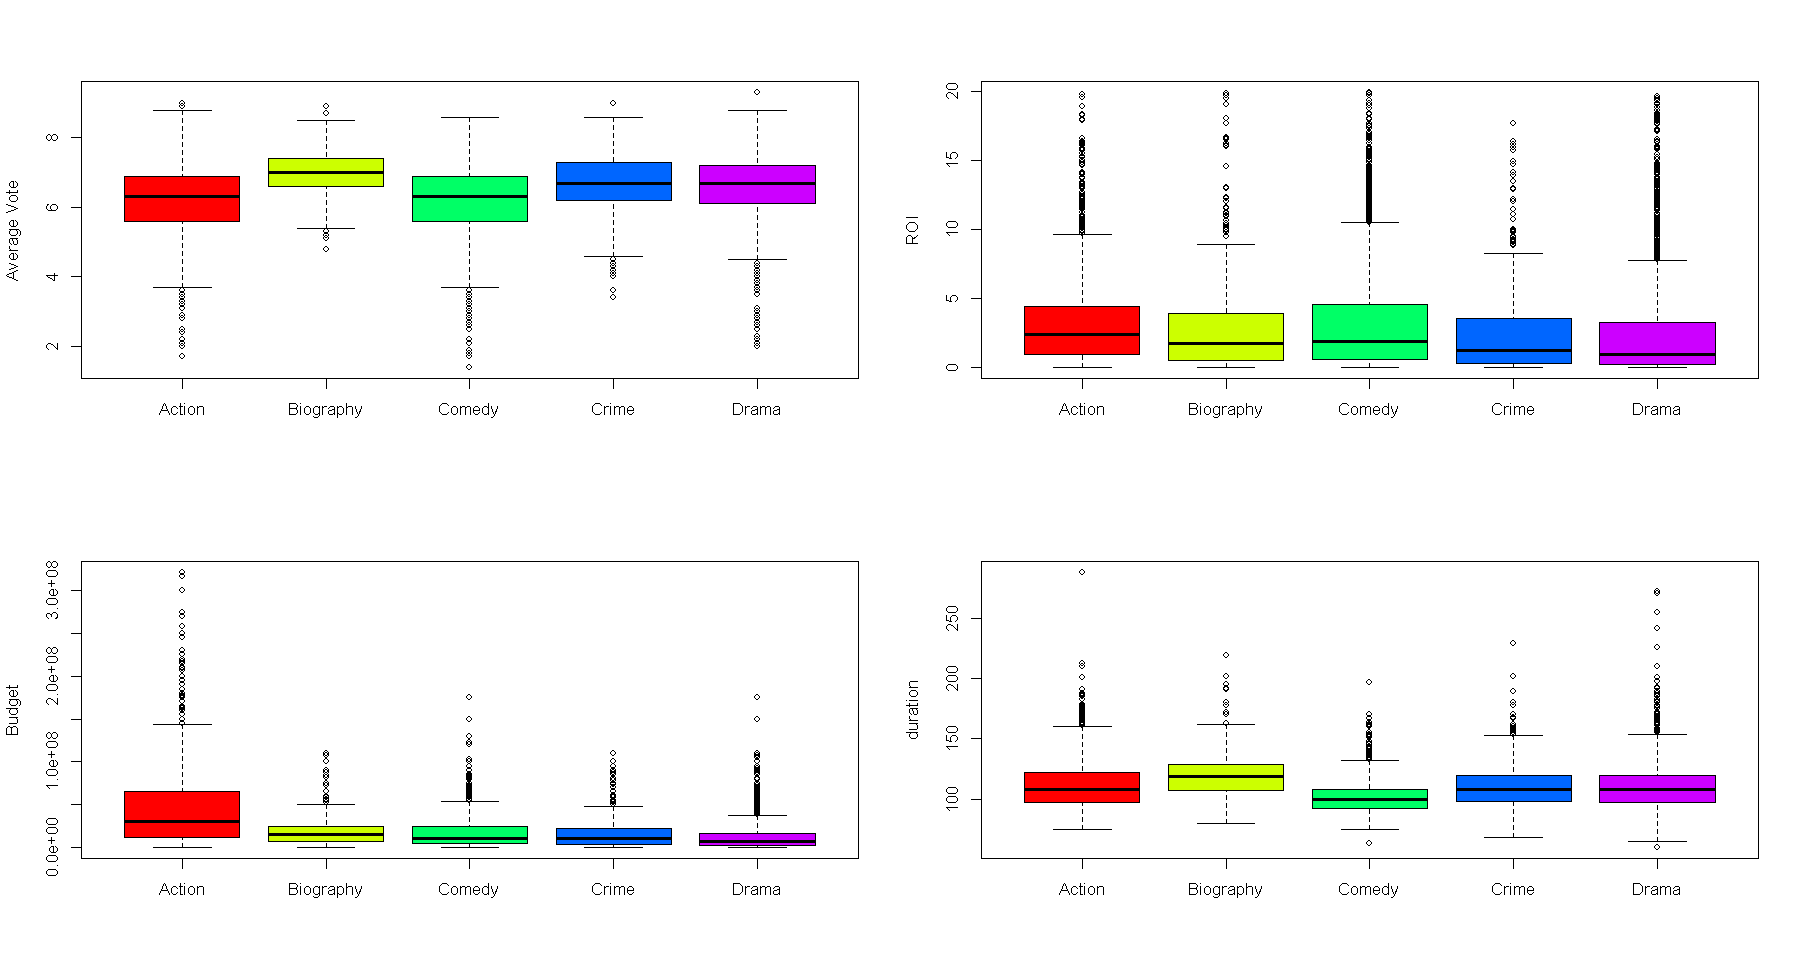

In [117]:
genres <- group_by(genres, Actual.Genre)
par(mfrow = c(2,2))
boxplot(genres$avg_vote ~ genres$Actual.Genre, col = rainbow(5), xlab = "", ylab = "Average Vote")

boxplot(genres$netratio ~ genres$Actual.Genre, col = rainbow(5), xlab = "", ylab = "ROI")

boxplot(genres$budgetin.USD ~ genres$Actual.Genre, col = rainbow(5), , xlab = "", ylab = "Budget")

boxplot(genres$duration ~ genres$Actual.Genre, col = rainbow(5), xlab = "", ylab = "duration")

We find that Biographies and Comedies have the best ROI and Biographies have, by far, the best average ratings

In [118]:
summarize(genres, averageROI = mean(netratio), averagerating = mean(avg_vote))


Actual.Genre averageROI averagerating
1 Action       3.284336   6.185022     
2 Biography    3.083215   6.980577     
3 Comedy       3.347429   6.170985     
4 Crime        2.426580   6.664399     
5 Drama        2.551996   6.574857

*Which* production company? 
We find that Universal has the second highest ROI and the second highest average ratings. Making it a good all-around pick for ticket sales and streaming services.


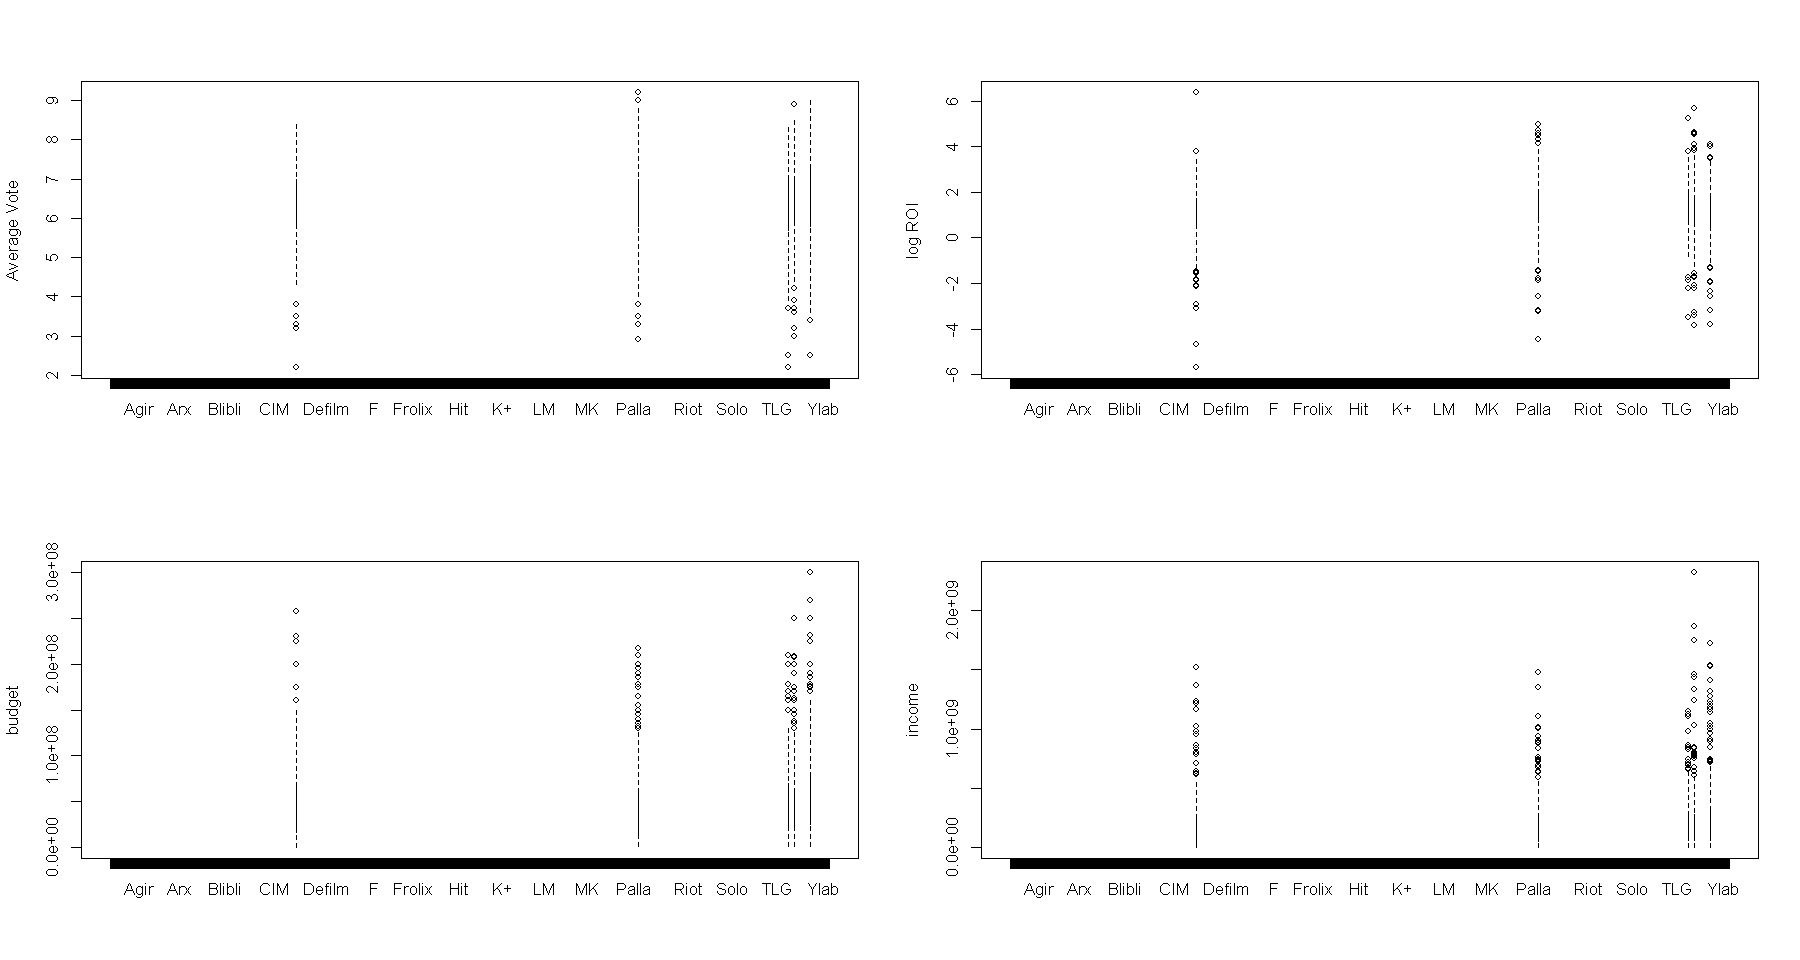

In [119]:
df.prodcomp <- (filter(movie.rating.inf,  budgetin.USD >0 & netratio <20000))
df.prodcompsum <- movie.rating.inf %>% filter(budgetin.USD >0, income >0, netratio < 20000) %>% group_by(production_company) %>% summarize(num.movies = n(), averageROI = mean(netratio), averagerating = mean(avg_vote))
df.prodcompsum <- df.prodcompsum[order(-df.prodcompsum$num.movies),]
top.five.prod<- head(df.prodcompsum, n=5)

df.prodcomp <- df.prodcomp %>% ungroup() %>% filter(df.prodcomp$production_company %in% top.five.prod$production_company) 

df.prodcomp <- group_by(df.prodcomp, production_company)
par(mfrow = c(2,2))

boxplot(df.prodcomp$avg_vote ~ df.prodcomp$production_company, col = rainbow(5), xlab = "", ylab = "Average Vote")

boxplot(log(df.prodcomp$netratio) ~ df.prodcomp$production_company, col = rainbow(5), xlab = "", ylab = "log ROI")

boxplot(df.prodcomp$budgetin.USD ~ df.prodcomp$production_company, col = rainbow(5), xlab = "", ylab = "budget")

boxplot(df.prodcomp$income ~ df.prodcomp$production_company, col = rainbow(5), xlab = "", ylab = "income")



In [120]:
summarize(df.prodcomp, averageROI = mean(netratio), averagerating = mean(avg_vote)) #average ROI for each of the biggest 5 prod companies

production_company    averageROI averagerating
1 Columbia Pictures     6.614066   6.364955     
2 Paramount Pictures    8.474943   6.386971     
3 Twentieth Century Fox 6.182082   6.250222     
4 Universal Pictures    7.184577   6.383965     
5 Warner Bros.          5.028884   6.525155

## Final Report

The objective of the analysis is to find metrics that will streamline the decision making process for the distributor, Big Time Hollywood Company. We started with the gathering of data. For this purpose we used IMDB, exchange rate data, ticket prices over time, and custom surveys.

Because our dataset includes many older films with directors and actors who are no longer in the business, we decided to focus on the numerical data that would be steady (or we could normalize) year to year. The dataset was also incomplete, with many NA values scattered throughout. We cleaned the data by removing unnecessary rows and columns, NA values and created new columns for our analysis. Some columns with numeric values had characters in them (like $ and ,) so we changed those to the suitable data types. 

We created new columns of weighted votes by demographic groups to see the effect of the opinions of different groups on our response variables. We also added new columns called income and netratio (an ROI measure). ROI is our primary response variable because we want to see what factors affect the return on investment the most. We created the ROI variable by first converting all data into USD, using exchange rates for each currency in each year. Then we divided total income Our original data set had income and budget of the movies and we created a unitless column ROI by dividing the Income by the Budget in USD.

This ROI measure is unitless and self-corrected for inflation, since income and budget should be near in time.  We know that inflation is an issue in our dataset because we checked for a relationship between the year and income columns with our first linear regression model. We clearly see that income goes up as year goes up, suggesting that the dataset is not corrected for inflation. We also addressed this with a ticketinf column that only looks at income normalized for ticket prices during that time period. 


**Major findings:**

1. In our quest to uncover the trends and insights we found that the US is the country with the highest number of movies in the database followed by the UK, France, India and Germany  

2. But we found something surprising in that the number of movies over the last few years have been decreasing. We did not address this finding in our analysis.

3. For the top-five most represented movie genres, Comedy leads the list followed by Action, Drama and Crime. Before continuing with the analysis we want to confirm something very important. 

4. We find strong correlations between the rating patterns of all of our demographic groups, suggesting we can save money in focus groups testing.

6. Strong performance in the US is correlated with strong performance worldwide. Therefore capturing the KPI’s in the US might work for all over release as well.

7. A correlation is present between income measures and budget of the movie. I.e. Having a high production budget often means a higher income for the movie, however budget was not correlated with ROI.

8. Duration does not have significant correlation with any of the measures we are trying to study.

9. Surprisingly, ROI does not have a strong correlation with any votes metric.

10. Votes and income measures of the movie has a only 43% effect on the ROI.  

11. We increased the efficiency of our model by removing the outliers in our data, specifically movies with low budget and very high income. Removing these outliers takes our linear regression model from $R^2$ = .012 to $R^2$ =.45.

12. Top three production houses in terms of numbers of movies made are MGM, Warner bros and Universal Studios

13. The best performing genres in terms of ROI are Comedy, Drama and Action

14. Comedy movies have the highest ROI because of their low budget and high income.




Historical data doesn’t give us significant insights for our ROI and how we can precisely predict it. In recent years the movie business has been very widely affected by the introduction of the streaming services.  We have tried to incorporate the effect caused by the rise of digital media. Streaming services are more likely to pick the movies with the most positive ratings. We have voting data from multiple demographic groups in our data set and we want to see what age group votings reflect the most voting trends in general. This can help in reducing the focus group expenses and thus the results can be used by the streaming services to pick up the movies. 

**Findings on voting trends based on different age groups**<br>

1. We find that all male and all female voting groups perform extremelly well on predicting the average vote. 

2. For specific genres, some age-groups perform very well on predicting the average vote.  For example 18-30 year olds are excellent at predicting the average vote for Comedy and Drama films 

3. Importantly, we find that the Biography genre has excellent average ratings as well as a decent average ROI. Making it a good genre choice for our distributor. 

Answers to our initial questions:

**1. How does this data relate to the business and how does it justify our objective?**<br> 

This data has many columns like votes, budget, income, demography etc that can be used to understand the mechanics of successful movies. <br> 

**2.What factors affect the revenues made by previous films?**<br> 

So far based on our analysis we have found that budget, good reviews and genre affects the revenue the most. However, revenue is very hard to predict. <br> 

**3.Does the budget of the movie affect the success of the movie?**<br> 

Yes it does have a significant correlation with the revenue generated by movie but there are other factors that affect the success as well.<br> 

**4.What factors lead to the not so good ratings and good ratings?**<br> 

Genre and Production quality (Budget) are the factors that affect the ratings.<br> 

**5.If a movie does well in one market is it likely to do well in others?**<br> 

We have seen in our analysis that the US produces the most movies and surprisingly if the movie does well in the US it is more likely to do so worldwide as well. <br> 




**Additional data collection:**

This data is pre-pandemic and we believe that people today are even more likely to use streaming services (where voter rating is king)  than ever. We did our own survey to find out about people's movie watching habits right now.

**To get this information we created the survey with the following questions with all the collected responses:**

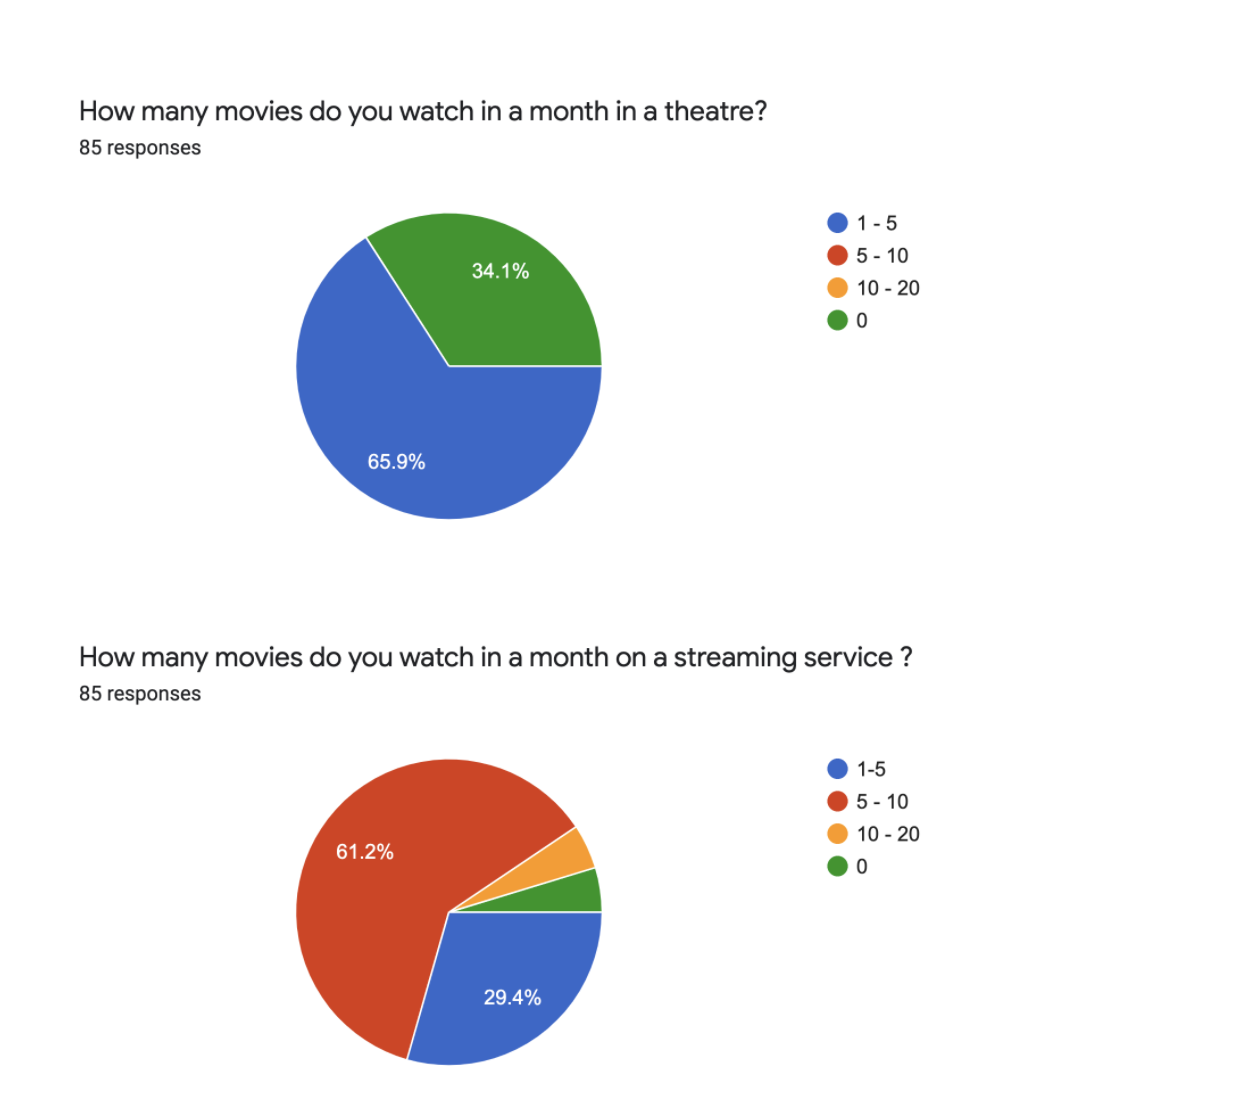

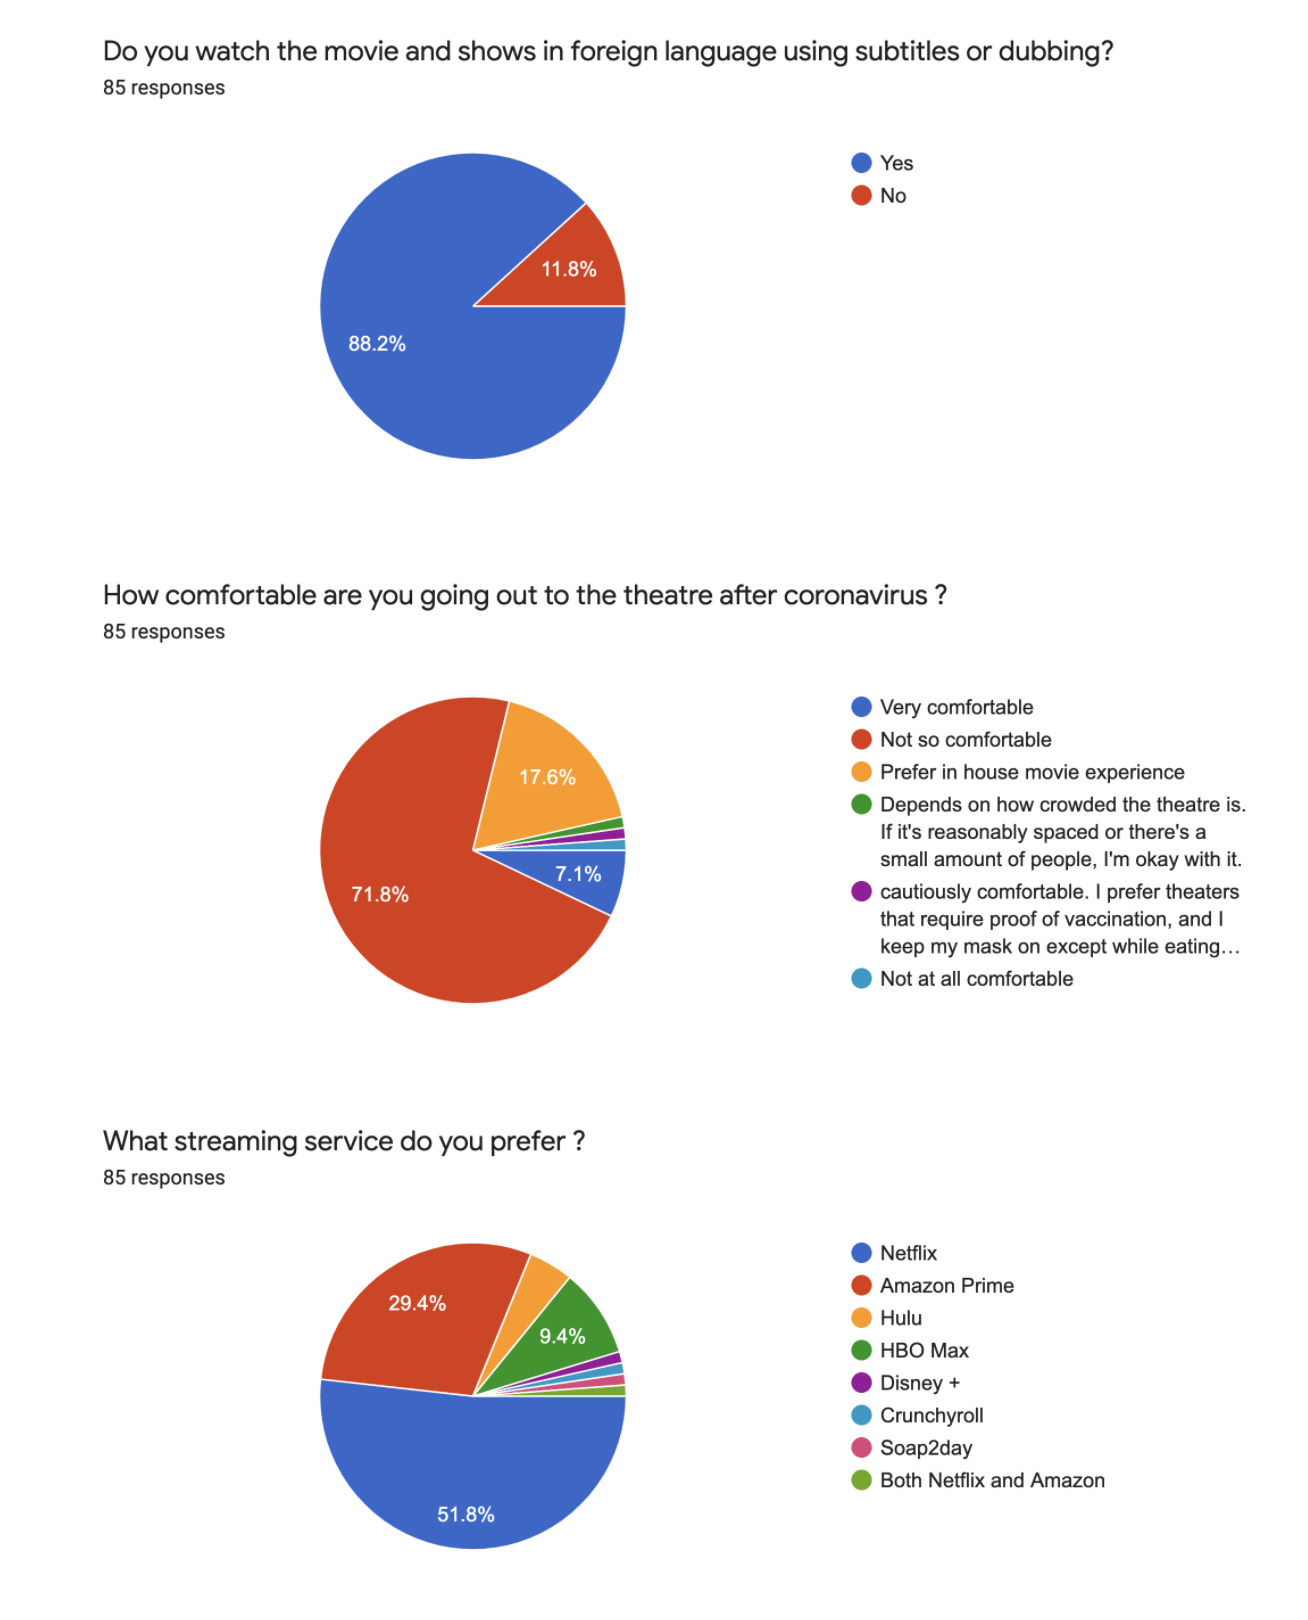

Based on the responses above we can clearly see the post-pandemic audience's preference for movies to be seen via streaming services rather than theatres. Only 7% of the sample population said they're comfortable in theaters. 

We also get some additional insights from the survey as listed below:

1. People like to watch movies in foreign language as long as we have captions or are dubbed in the regional language.

2. The most loved streaming services are Netlix, Amazon Prime and HBO Max.

Now that we have established the importance of the streaming services we need to get some more information on how the streaming services are performing in general. What are the predicted growth rates in future and how can we incorporate them in the future business model of **BIG TIME HOLLYWOOD PRODUCTION COMPANY**

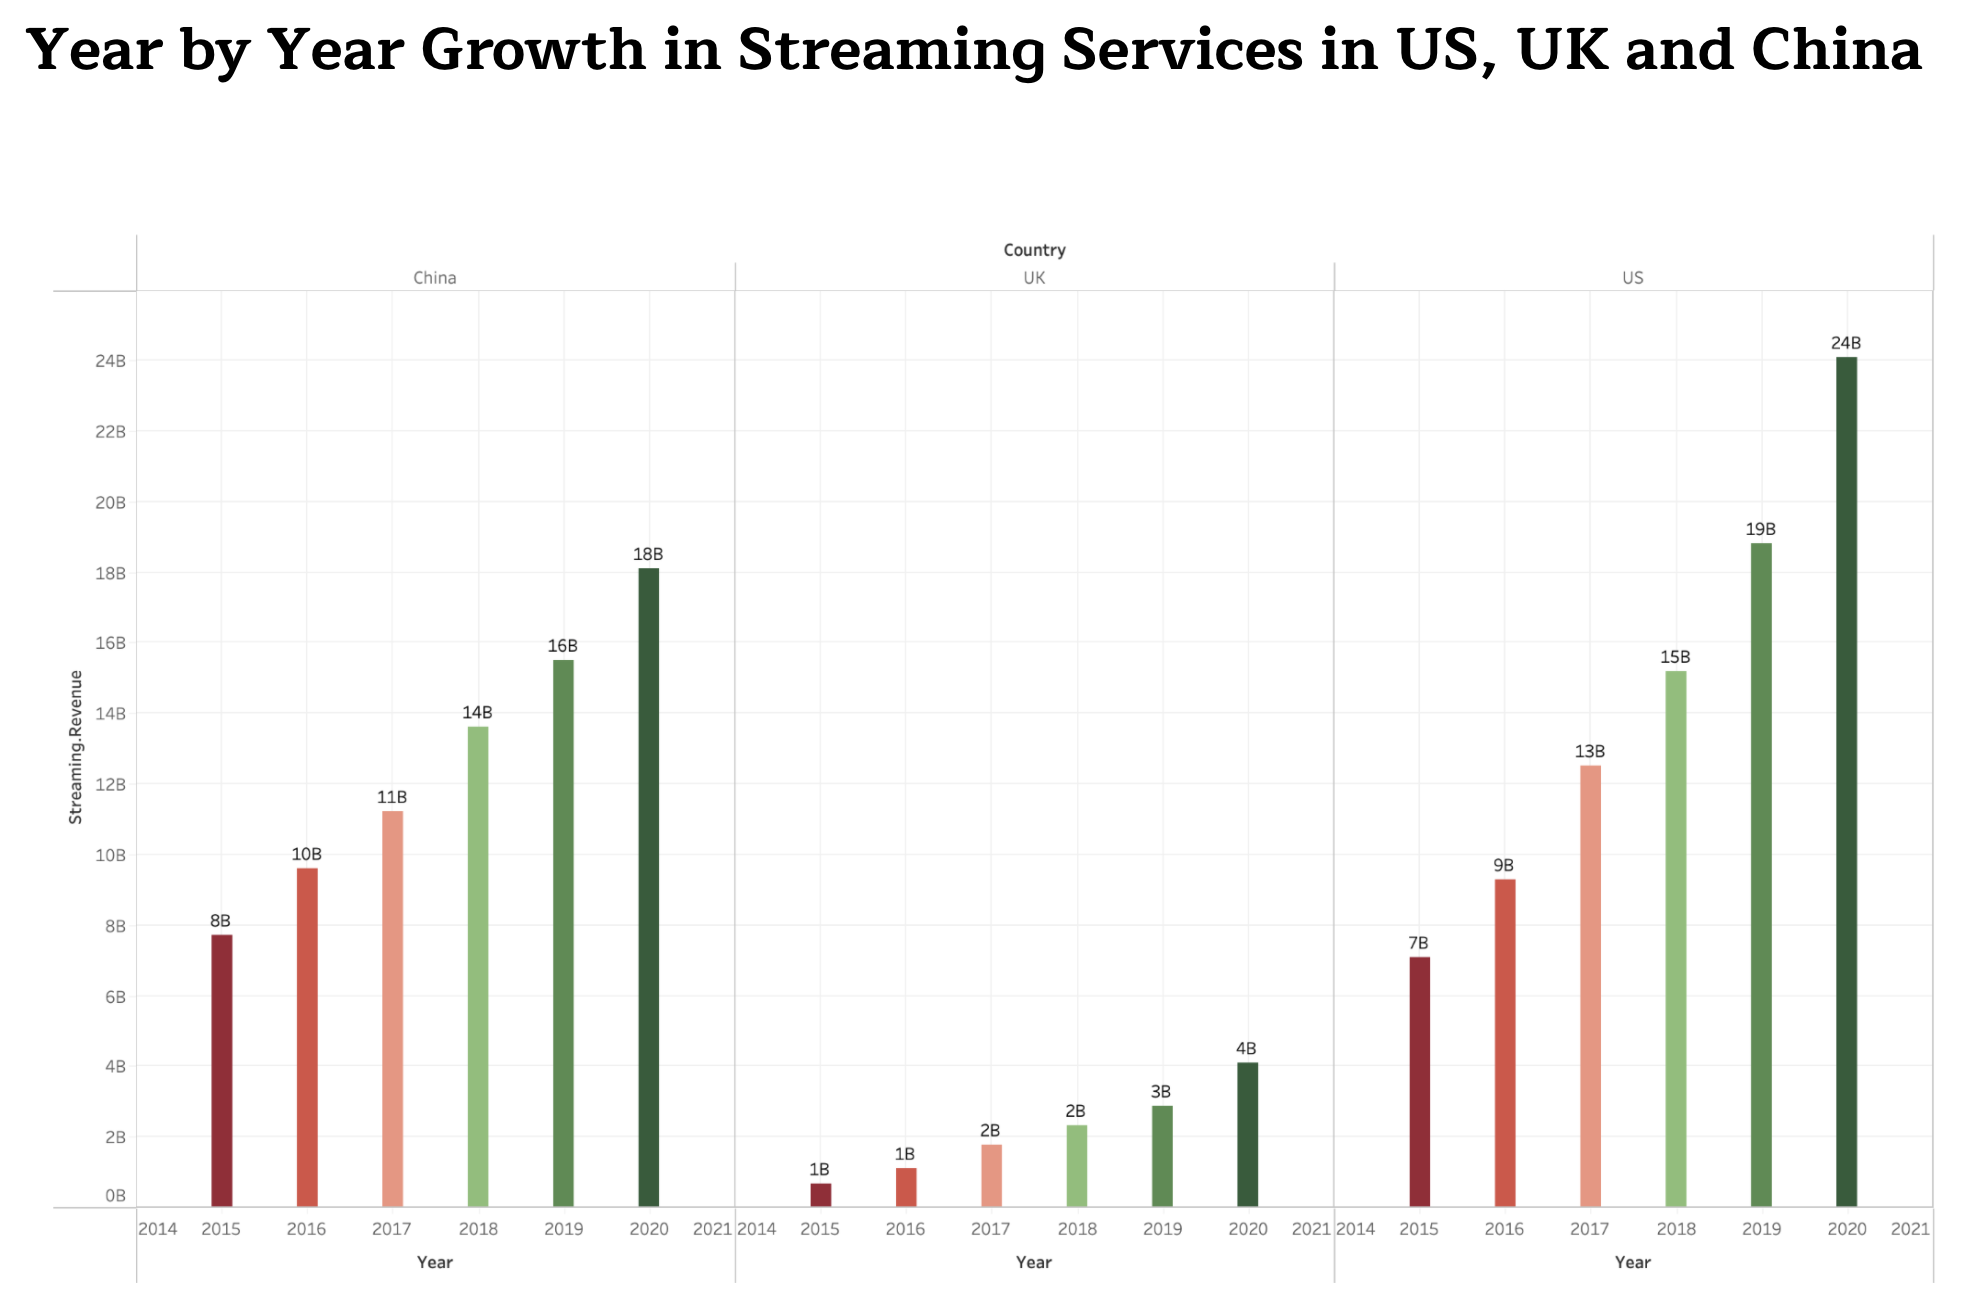

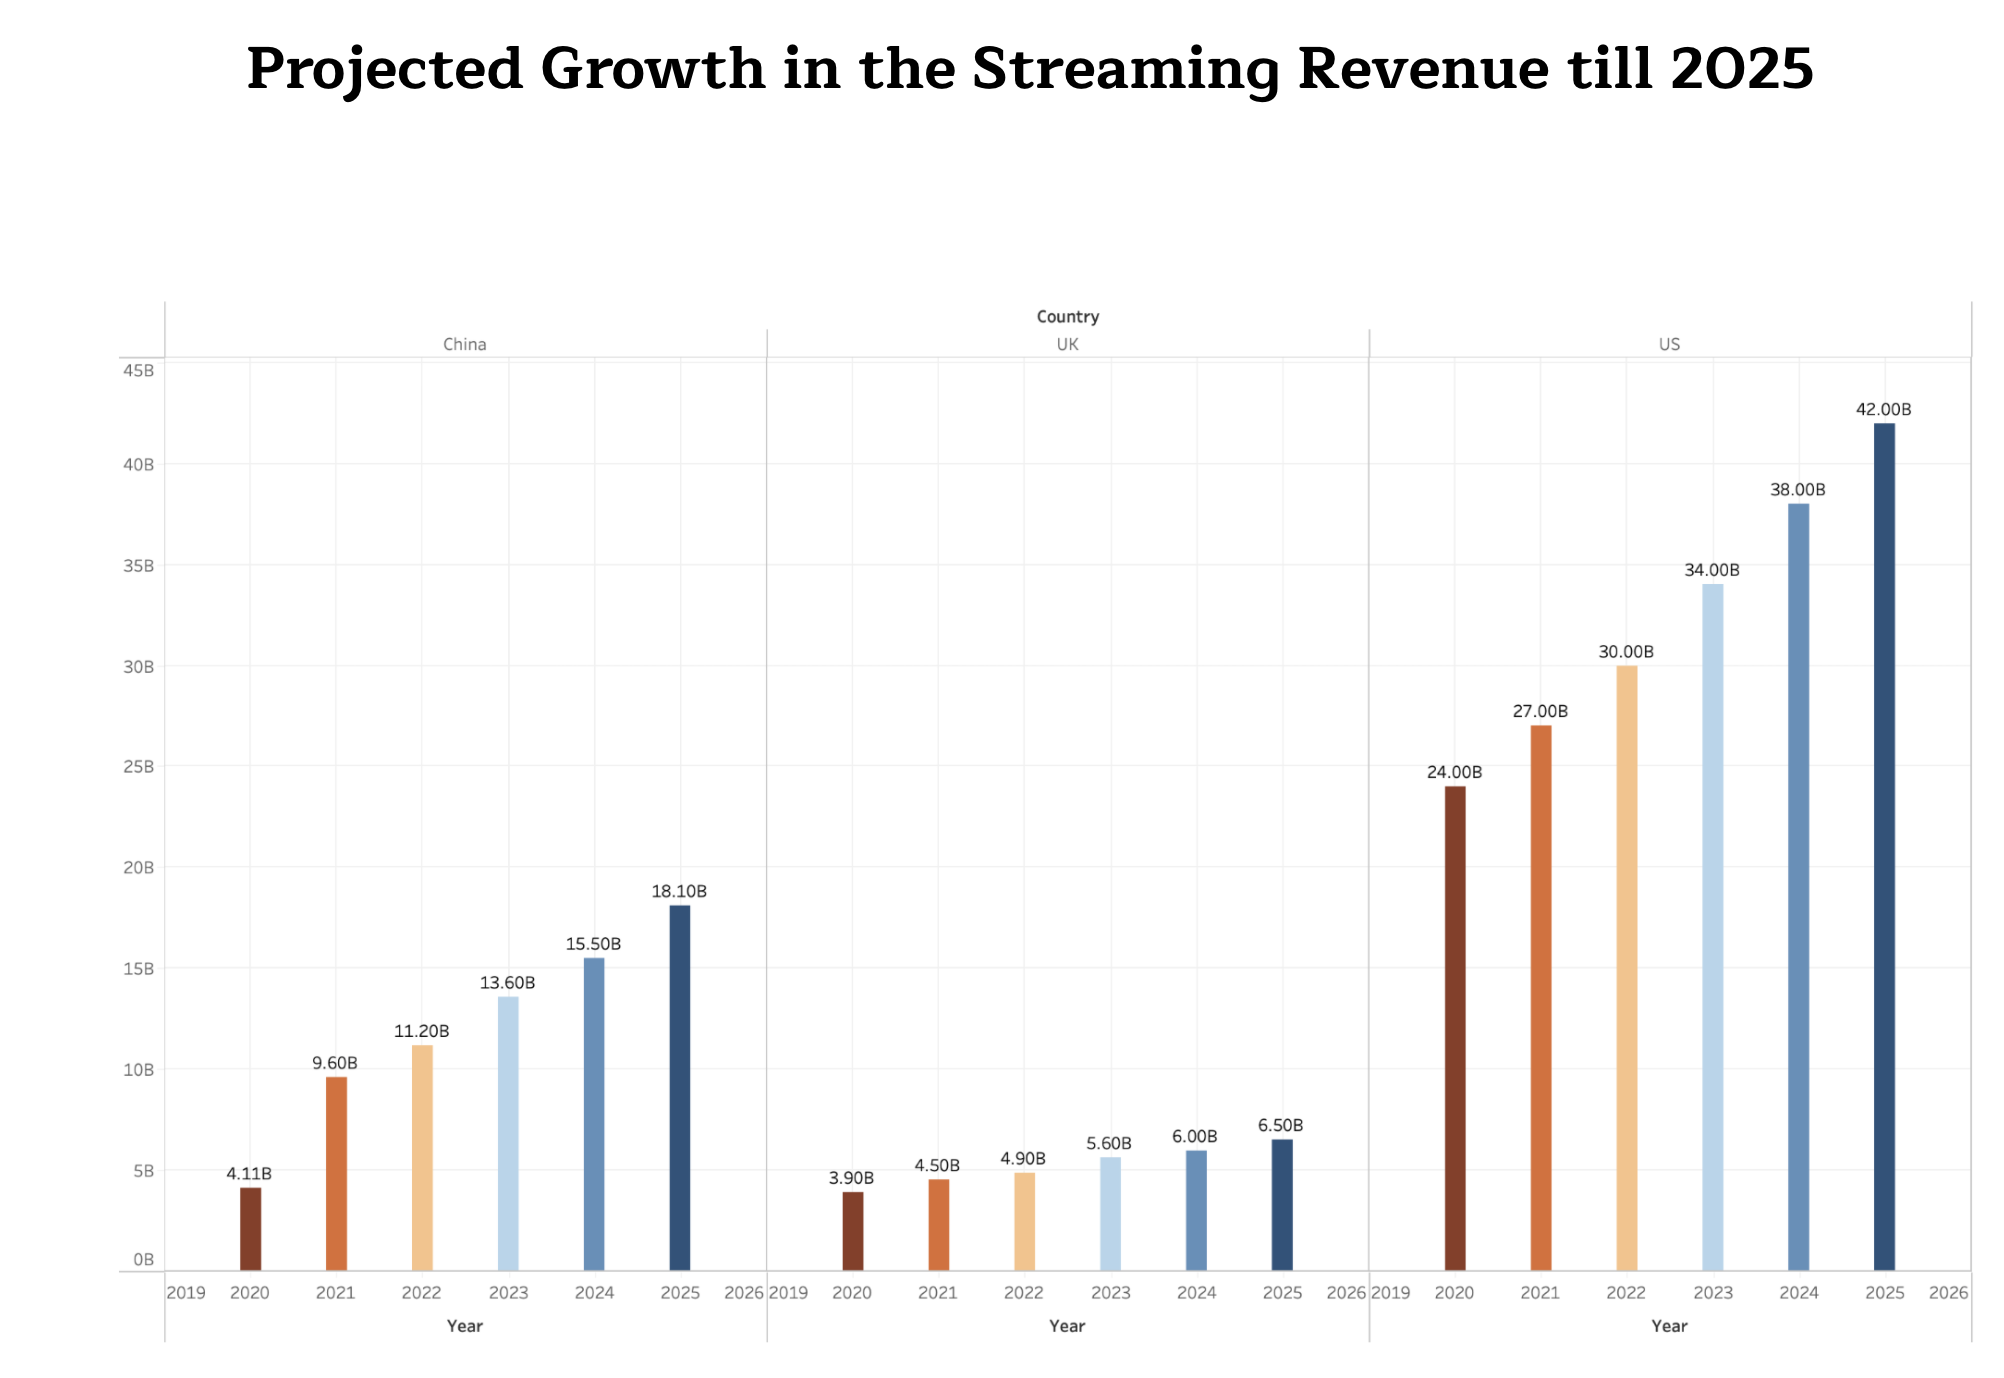

We can clearly see the upward trend in the streaming services revenue, more revenue means more customers, more customers means more devices and in a click the number of devices the movies will reach is in millions, which far higher than the foot fall that can be expected from movie theatres. 
**Below is a chart showing the number of subscribers for each streaming service**

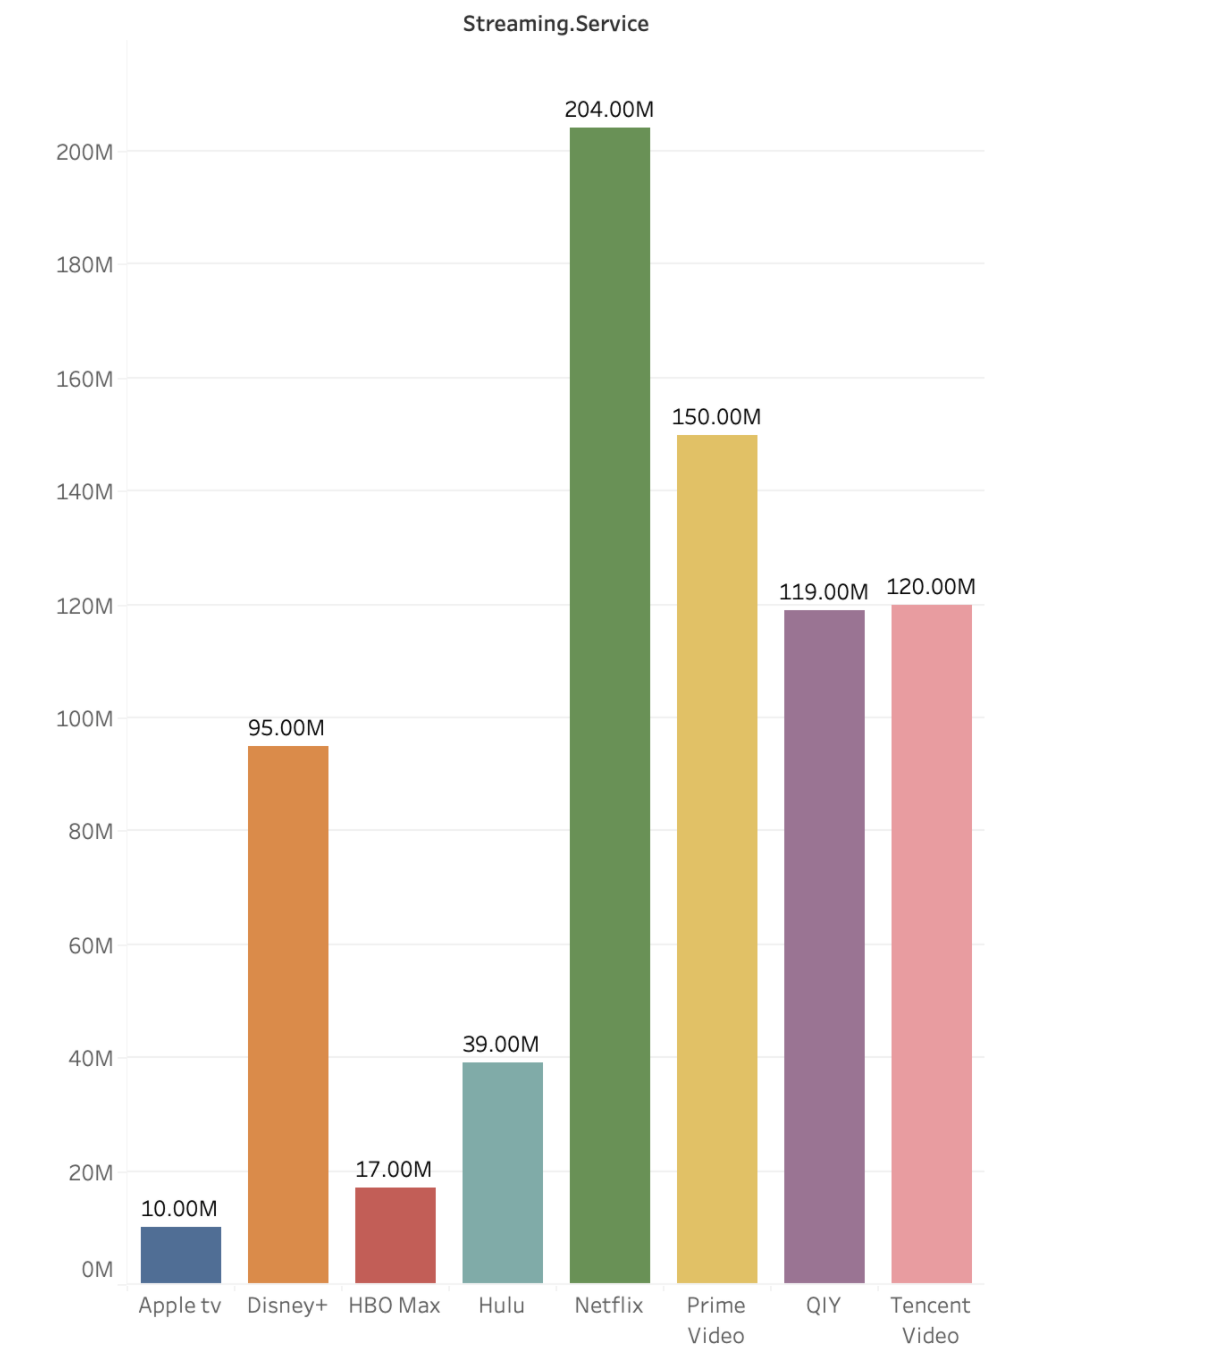

## Final Recommendations

**Based on all the analysis above and considering all the possible outcomes we would recommend to the business owner that a movie in  genre Comedy will reduce budget thus increase ROI, while a movie in the genre Biography will increase voter ratings, while keeping ROI still fairly high. Our distributor should partner with production houses Universal studios or MGM, having a screening enriched for the age group 30-45 released simultaneously in theatres and streaming services.**

###Originality
Previous analyses of this dataset primarily focus on the existing columns, without adding in ROI, inflation, etc. However, [one analysis](http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html) we found does examine ROI (but not looking at multiple currencies).  This analysis focuses on ROI by director and actor popularity.  It examined metrics like facebook likes and fame of the actors pictured in the posters. It is a very different tactic than the one we took, which is more heavily based on pre-release data than pre-production data.
Our data is time-neutral in that does not consider active directors and actors, but rather looks at measures where we can directly compare historical data to recent data. This increases the number of observations, making us less prone to error. 